# ELEC 598 : Deep Learning Applications 
# Project 1 - Predicting Housing Prices 
### By: Matthew Stein and Ethan Tsao 
### February 10, 2020 

In [2]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


## Data Preprocessing 

Data is imported via pandas, and processed via numpy. Working with Keras, all data is processed as arrays in numpy. To simplify model learning, feature-wise normalization is performed. Note that feature-wise normalization is calc'ed using the mean and std of the training set. 

The test set was chosen to be 15% of the overall data set. 

Hey 

      SquareFootageStructure  LotSquareFootage  YearBuilt  Bedrooms  \
6                     1164.0            6611.0     1961.0       3.0   
12                    2766.0            7331.0     1986.0       4.0   
14                    3339.0           20473.0     2001.0       4.0   
16                    1400.0            7728.0     1910.0       4.0   
20                    1438.0            8276.0     1984.0       3.0   
...                      ...               ...        ...       ...   
9986                  1007.0           10200.0     1959.0       3.0   
9989                  2300.0            6547.0     1924.0       4.0   
9990                  1545.0            2178.0     1967.0       2.0   
9991                  1404.0            7841.0     1964.0       2.0   
9999                  2865.0            7841.0     2005.0       4.0   

      BathsTotal  field_StoriesTotal  field_PostalCode  ListPrice  
6            2.0                 1.0           91732.0   499999.0  
12         

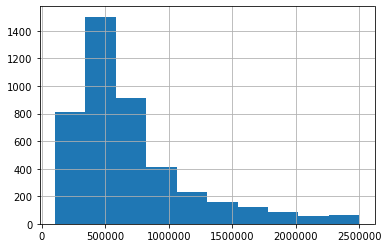

In [3]:
data = pd.read_excel('data/resd_data.xlsx')
length = data.shape[0]

# Remove all rows with null points in dataset 
updated_data = data.dropna(how='any',axis=0) 


# Remove all rows with "0" for the Postal Code, "0" for Year Built, "0" for Lot Square Footage, and "0" for List Price
updated_data = updated_data[updated_data.field_PostalCode != 0 ]
updated_data = updated_data[updated_data.YearBuilt != 0]
updated_data = updated_data[updated_data.LotSquareFootage != 0]
updated_data = updated_data[updated_data.ListPrice != 0]
updated_data = updated_data[updated_data.Bedrooms != 0]
updated_data = updated_data[updated_data.BathsTotal != 0]
updated_data = updated_data[updated_data.field_StoriesTotal != 0]
updated_data = updated_data[updated_data.SquareFootageStructure != 0]


#include only southern california postal codes 
updated_data = updated_data[(updated_data.field_PostalCode >= 90000)]
updated_data = updated_data[(updated_data.field_PostalCode < 93599)]

updated_data = updated_data[(updated_data.ListPrice < 2500000)]
updated_data = updated_data[(updated_data.ListPrice > 100000)]


updated_data.ListPrice.hist()
#updated_data.StructureSquareFootage.hist()
# updated_data['ListPrice'] = updated_data['ListPrice']/1000 

# Update Index column 

print(updated_data)



In [4]:
train_data = updated_data.loc[:(len(updated_data)*.85),:'field_StoriesTotal'].values.tolist()
train_data = np.asarray(train_data) 
train_targets = updated_data.loc[:(len(updated_data)*.85),'ListPrice'].values.tolist()
train_targets = np.asarray(train_targets) 

test_data = updated_data.loc[(len(updated_data)*.85 +1 ):,:'field_StoriesTotal'].values.tolist()
test_data = np.asarray(test_data) 
test_targets = updated_data.loc[(len(updated_data)*.85 + 1):,'ListPrice'].values.tolist()
test_targets = np.asarray(test_targets)

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Model Selection 

As is standard for neural networks - and regression models, in particular - a Sequential model was chosen. The model has 3 hidden layers, with 64 

In [21]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Training and Validation 

processing fold # 0
(0, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 144us/step - loss: 739906271972.1335 - mae: 708801.8125 - val_loss: 724337818310.5306 - val_mae: 713200.6250
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 711694485738.8214 - mae: 690191.6250 - val_loss: 666806194426.7755 - val_mae: 676961.2500
Epoch 3/100
1378/1378 [==============================] - 0s 75us/step - loss: 627686152183.0826 - mae: 632483.9375 - val_loss: 547823217099.7551 - val_mae: 592080.5000
Epoch 4/100
1378/1378 [==============================] - 0s 75us/step - loss: 479709415421.0275 - mae: 513036.9062 - val_loss: 365624237912.8163 - val_mae: 441286.9375
Epoch 5/100
1378/1378 [==============================] - 0s 76us/step - loss: 316297882250.9608 - mae: 380936.8125 - val_loss: 221435614103.5102 - val_mae: 320514.4375
Epoch 6/100
1378/1378 [==============================] - 0s 75us/step - loss: 2498333

1378/1378 [==============================] - 0s 75us/step - loss: 158581142177.2540 - mae: 265954.0938 - val_loss: 112352571893.5510 - val_mae: 237183.4531
Epoch 50/100
1378/1378 [==============================] - 0s 73us/step - loss: 158930888724.8070 - mae: 267576.8125 - val_loss: 112037680441.4694 - val_mae: 236576.8906
Epoch 51/100
1378/1378 [==============================] - 0s 73us/step - loss: 159290730231.4543 - mae: 267368.0625 - val_loss: 112068275346.2857 - val_mae: 237084.7344
Epoch 52/100
1378/1378 [==============================] - 0s 71us/step - loss: 159603237482.2642 - mae: 267899.8750 - val_loss: 111712667815.1837 - val_mae: 237243.9219
Epoch 53/100
1378/1378 [==============================] - 0s 74us/step - loss: 158619934256.3019 - mae: 267664.1250 - val_loss: 110815072005.2245 - val_mae: 235252.5312
Epoch 54/100
1378/1378 [==============================] - 0s 80us/step - loss: 159893616738.0900 - mae: 268728.9062 - val_loss: 115848728199.8367 - val_mae: 234711.2656

1378/1378 [==============================] - 0s 75us/step - loss: 159703814488.8011 - mae: 267924.2812 - val_loss: 111804476186.1225 - val_mae: 234079.3281
Epoch 98/100
1378/1378 [==============================] - 0s 73us/step - loss: 159098213701.4804 - mae: 264847.8125 - val_loss: 111154727831.5102 - val_mae: 236195.9531
Epoch 99/100
1378/1378 [==============================] - 0s 73us/step - loss: 158519304423.8491 - mae: 265382.0938 - val_loss: 110708787617.9592 - val_mae: 236614.3125
Epoch 100/100
196/196 [==============================] - 0s 41us/step


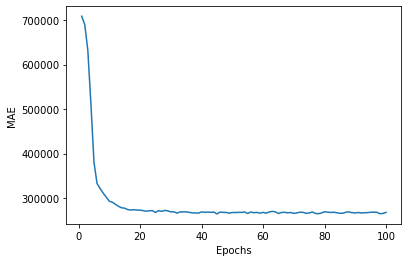

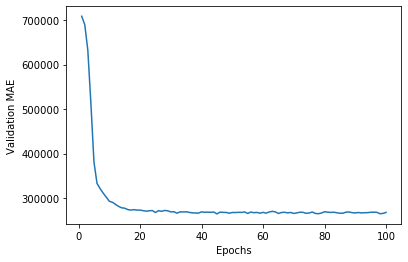

processing fold # 1
(196, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 141us/step - loss: 723314800161.4398 - mae: 705532.4375 - val_loss: 840680403027.5918 - val_mae: 736908.8125
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 696260563698.9956 - mae: 687872.2500 - val_loss: 783238743687.8368 - val_mae: 702568.8750
Epoch 3/100
1378/1378 [==============================] - 0s 71us/step - loss: 612323986879.3499 - mae: 630875.3750 - val_loss: 646909917894.5306 - val_mae: 614252.1875
Epoch 4/100
1378/1378 [==============================] - 0s 71us/step - loss: 457361706526.4673 - mae: 510406.8125 - val_loss: 443465949351.1837 - val_mae: 461040.5312
Epoch 5/100
1378/1378 [==============================] - 0s 73us/step - loss: 304119916434.0203 - mae: 374884.2188 - val_loss: 293314268097.3062 - val_mae: 365869.4688
Epoch 6/100
1378/1378 [==============================] - 0s 73us/step - loss: 23829

1378/1378 [==============================] - 0s 73us/step - loss: 151723109264.5341 - mae: 262754.8750 - val_loss: 178787765854.0408 - val_mae: 287630.0000
Epoch 50/100
1378/1378 [==============================] - 0s 73us/step - loss: 150621347221.7358 - mae: 263193.9375 - val_loss: 182516165234.9388 - val_mae: 282172.6875
Epoch 51/100
1378/1378 [==============================] - 0s 70us/step - loss: 151914055058.7634 - mae: 260105.6875 - val_loss: 178873342328.1633 - val_mae: 285875.9062
Epoch 52/100
1378/1378 [==============================] - 0s 74us/step - loss: 151053258306.1364 - mae: 262818.0625 - val_loss: 181931972482.6122 - val_mae: 282995.0312
Epoch 53/100
1378/1378 [==============================] - 0s 70us/step - loss: 151124836033.9507 - mae: 260636.2188 - val_loss: 181992789890.6122 - val_mae: 283227.7500
Epoch 54/100
1378/1378 [==============================] - 0s 70us/step - loss: 149288169436.3309 - mae: 259597.5156 - val_loss: 183748631740.0816 - val_mae: 282591.1875

1378/1378 [==============================] - 0s 72us/step - loss: 150352710300.7953 - mae: 259794.2031 - val_loss: 181224927649.9592 - val_mae: 283297.5938
Epoch 98/100
1378/1378 [==============================] - 0s 73us/step - loss: 148807622929.4630 - mae: 259231.3750 - val_loss: 178445718590.6939 - val_mae: 287830.7812
Epoch 99/100
1378/1378 [==============================] - 0s 78us/step - loss: 151159700160.4644 - mae: 262747.5312 - val_loss: 179524915450.7755 - val_mae: 284761.5625
Epoch 100/100
196/196 [==============================] - 0s 31us/step


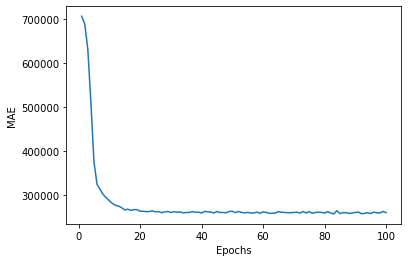

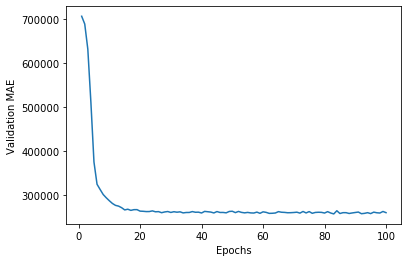

processing fold # 2
(392, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 140us/step - loss: 736163626912.8824 - mae: 706635.5000 - val_loss: 748778346036.2449 - val_mae: 727087.6875
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 705976144710.2235 - mae: 687100.5625 - val_loss: 686748861753.4694 - val_mae: 687646.1250
Epoch 3/100
1378/1378 [==============================] - 0s 73us/step - loss: 614587372940.8186 - mae: 623068.0000 - val_loss: 549698611659.7551 - val_mae: 590690.1250
Epoch 4/100
1378/1378 [==============================] - 0s 74us/step - loss: 451334155176.3135 - mae: 494272.0000 - val_loss: 383429872242.9388 - val_mae: 435609.8438
Epoch 5/100
1378/1378 [==============================] - 0s 72us/step - loss: 286331680235.9362 - mae: 363567.5625 - val_loss: 343308055614.6938 - val_mae: 348613.2500
Epoch 6/100
1378/1378 [==============================] - 0s 71us/step - loss: 21788

1378/1378 [==============================] - 0s 73us/step - loss: 133710176862.3745 - mae: 254635.9375 - val_loss: 847413915731.5918 - val_mae: 314574.3125
Epoch 50/100
1378/1378 [==============================] - 0s 70us/step - loss: 133307844432.6270 - mae: 252815.6250 - val_loss: 893533827489.9592 - val_mae: 321239.0312
Epoch 51/100
1378/1378 [==============================] - 0s 73us/step - loss: 133298240513.4862 - mae: 254601.3594 - val_loss: 847790190006.8572 - val_mae: 314973.7500
Epoch 52/100
1378/1378 [==============================] - 0s 73us/step - loss: 133216063981.4223 - mae: 254389.2031 - val_loss: 912707975209.7959 - val_mae: 322293.8438
Epoch 53/100
1378/1378 [==============================] - 0s 70us/step - loss: 133041305995.3324 - mae: 254589.5312 - val_loss: 818730192478.0408 - val_mae: 309203.4375
Epoch 54/100
1378/1378 [==============================] - 0s 72us/step - loss: 133754562497.5791 - mae: 254178.9688 - val_loss: 840588828839.1837 - val_mae: 311114.6250

1378/1378 [==============================] - 0s 76us/step - loss: 132836534637.6081 - mae: 252449.1406 - val_loss: 811541129341.3877 - val_mae: 309018.3125
Epoch 98/100
1378/1378 [==============================] - 0s 76us/step - loss: 132730762993.5094 - mae: 252914.6250 - val_loss: 803297137559.5103 - val_mae: 307744.1562
Epoch 99/100
1378/1378 [==============================] - 0s 73us/step - loss: 132795704479.0247 - mae: 252294.0156 - val_loss: 846973864562.9387 - val_mae: 313588.5625
Epoch 100/100
196/196 [==============================] - 0s 36us/step


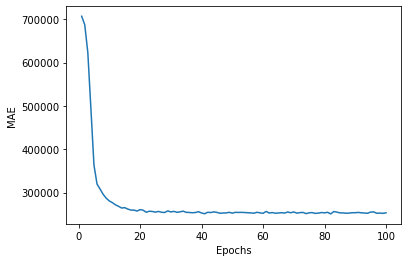

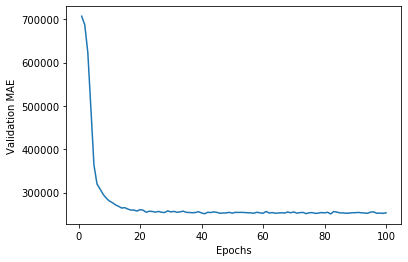

processing fold # 3
(588, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 139us/step - loss: 735556590724.2728 - mae: 709846.3750 - val_loss: 754568582708.2449 - val_mae: 706530.6875
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 707516143654.6415 - mae: 692180.7500 - val_loss: 700490818037.5510 - val_mae: 673807.0000
Epoch 3/100
1378/1378 [==============================] - 0s 71us/step - loss: 619106183818.9608 - mae: 633301.0625 - val_loss: 584299065093.2245 - val_mae: 596161.5625
Epoch 4/100
1378/1378 [==============================] - 0s 73us/step - loss: 499583155011.2511 - mae: 541144.1875 - val_loss: 440278341840.9796 - val_mae: 484002.4062
Epoch 5/100
1378/1378 [==============================] - 0s 73us/step - loss: 344224547779.0653 - mae: 408192.0312 - val_loss: 273753262372.5714 - val_mae: 351540.5312
Epoch 6/100
1378/1378 [==============================] - 0s 78us/step - loss: 25301

1378/1378 [==============================] - 0s 74us/step - loss: 156917950960.3948 - mae: 266796.6875 - val_loss: 144754182102.2041 - val_mae: 261741.9531
Epoch 50/100
1378/1378 [==============================] - 0s 72us/step - loss: 156712418091.4717 - mae: 262276.4375 - val_loss: 143928171708.0816 - val_mae: 263412.7500
Epoch 51/100
1378/1378 [==============================] - 0s 71us/step - loss: 156025689956.6909 - mae: 262935.0000 - val_loss: 143841852102.5306 - val_mae: 267867.4375
Epoch 52/100
1378/1378 [==============================] - 0s 73us/step - loss: 157614806056.1277 - mae: 266105.9062 - val_loss: 144608236439.5102 - val_mae: 260830.3750
Epoch 53/100
1378/1378 [==============================] - 0s 70us/step - loss: 156938345567.1176 - mae: 262610.0000 - val_loss: 144224922728.4898 - val_mae: 262018.8594
Epoch 54/100
1378/1378 [==============================] - 0s 70us/step - loss: 155925600627.5530 - mae: 260975.4844 - val_loss: 143767184530.2857 - val_mae: 266932.3125

1378/1378 [==============================] - 0s 74us/step - loss: 156387419098.8447 - mae: 262763.1250 - val_loss: 142774267318.8571 - val_mae: 265327.6562
Epoch 98/100
1378/1378 [==============================] - 0s 70us/step - loss: 155413092701.2598 - mae: 262907.8125 - val_loss: 143074947489.9592 - val_mae: 264972.2812
Epoch 99/100
1378/1378 [==============================] - 0s 73us/step - loss: 155093474602.7286 - mae: 261527.7344 - val_loss: 145417721396.2449 - val_mae: 277552.0000
Epoch 100/100
196/196 [==============================] - 0s 36us/step


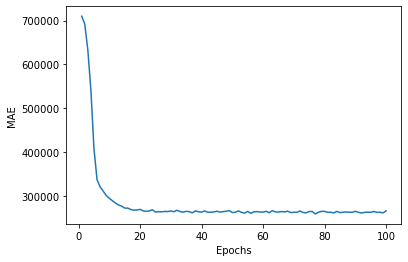

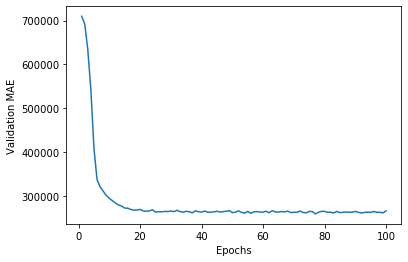

processing fold # 4
(784, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 144us/step - loss: 723936260411.0769 - mae: 703900.8750 - val_loss: 839614657264.3265 - val_mae: 749912.0000
Epoch 2/100
1378/1378 [==============================] - 0s 81us/step - loss: 697486787392.2786 - mae: 687050.5625 - val_loss: 785939204388.5714 - val_mae: 715997.5000
Epoch 3/100
1378/1378 [==============================] - 0s 79us/step - loss: 615729911870.4209 - mae: 631361.4375 - val_loss: 661077649533.3877 - val_mae: 629295.5000
Epoch 4/100
1378/1378 [==============================] - 0s 78us/step - loss: 471207585482.8679 - mae: 515276.5000 - val_loss: 481389214740.8979 - val_mae: 493096.1562
Epoch 5/100
1378/1378 [==============================] - 0s 75us/step - loss: 315045481874.7634 - mae: 384126.7812 - val_loss: 329926174218.4490 - val_mae: 390655.7188
Epoch 6/100
1378/1378 [==============================] - 0s 70us/step - loss: 23334

1378/1378 [==============================] - 0s 74us/step - loss: 147918297129.6139 - mae: 259198.5625 - val_loss: 188749516465.6327 - val_mae: 294492.9062
Epoch 50/100
1378/1378 [==============================] - 0s 70us/step - loss: 146572078349.0043 - mae: 259654.0312 - val_loss: 187842469386.4490 - val_mae: 296664.7812
Epoch 51/100
1378/1378 [==============================] - 0s 73us/step - loss: 146710521436.8882 - mae: 260403.1094 - val_loss: 188560092933.2245 - val_mae: 295673.7188
Epoch 52/100
1378/1378 [==============================] - 0s 73us/step - loss: 146452609217.2076 - mae: 258859.6094 - val_loss: 189333246704.3265 - val_mae: 293122.7500
Epoch 53/100
1378/1378 [==============================] - 0s 74us/step - loss: 145522804519.0131 - mae: 258856.5469 - val_loss: 187691372209.6327 - val_mae: 299762.0312
Epoch 54/100
1378/1378 [==============================] - 0s 76us/step - loss: 146949526192.1161 - mae: 261792.3906 - val_loss: 191822315520.0000 - val_mae: 291447.7812

1378/1378 [==============================] - 0s 72us/step - loss: 147784240004.6444 - mae: 256630.1094 - val_loss: 188228737232.9796 - val_mae: 293051.1875
Epoch 98/100
1378/1378 [==============================] - 0s 70us/step - loss: 149601338521.0798 - mae: 258624.1406 - val_loss: 189361237514.4490 - val_mae: 290775.9062
Epoch 99/100
1378/1378 [==============================] - 0s 68us/step - loss: 148194006923.3324 - mae: 256581.6719 - val_loss: 188848797737.7959 - val_mae: 292623.4062
Epoch 100/100
196/196 [==============================] - 0s 36us/step


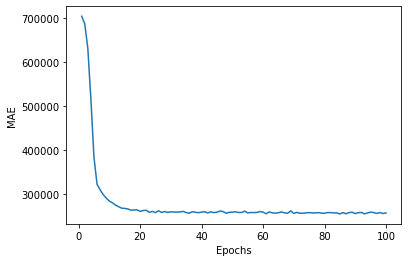

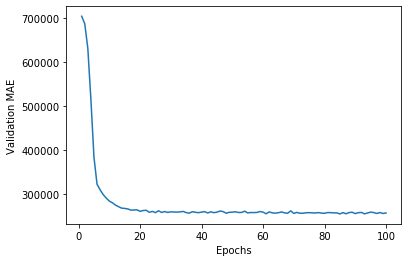

processing fold # 5
(980, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 142us/step - loss: 749068184369.4166 - mae: 713150.3125 - val_loss: 660094802797.7142 - val_mae: 683124.2500
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 721046894690.0900 - mae: 695298.4375 - val_loss: 609476121161.1428 - val_mae: 646953.4375
Epoch 3/100
1378/1378 [==============================] - 0s 71us/step - loss: 635893157263.7910 - mae: 637775.3125 - val_loss: 495726626774.2041 - val_mae: 555680.4375
Epoch 4/100
1378/1378 [==============================] - 0s 71us/step - loss: 479132048278.4790 - mae: 518700.0312 - val_loss: 341568419881.7959 - val_mae: 415064.7500
Epoch 5/100
1378/1378 [==============================] - 0s 73us/step - loss: 324688629159.5704 - mae: 390155.0000 - val_loss: 231548474263.5102 - val_mae: 340552.6875
Epoch 6/100
1378/1378 [==============================] - 0s 74us/step - loss: 24429

1378/1378 [==============================] - 0s 76us/step - loss: 160357870114.2758 - mae: 265097.1875 - val_loss: 130031815617.3061 - val_mae: 271591.1562
Epoch 50/100
1378/1378 [==============================] - 0s 74us/step - loss: 159197584183.3614 - mae: 264899.7188 - val_loss: 127789586975.3469 - val_mae: 261506.3906
Epoch 51/100
1378/1378 [==============================] - 0s 74us/step - loss: 159021935266.7402 - mae: 262562.6562 - val_loss: 128680106861.7143 - val_mae: 264883.2188
Epoch 52/100
1378/1378 [==============================] - 0s 72us/step - loss: 158362607889.4630 - mae: 262952.7188 - val_loss: 129400405012.8980 - val_mae: 269048.5938
Epoch 53/100
1378/1378 [==============================] - 0s 73us/step - loss: 160347099130.0552 - mae: 264589.4375 - val_loss: 133437053805.7143 - val_mae: 279159.6562
Epoch 54/100
1378/1378 [==============================] - 0s 75us/step - loss: 159323960779.2395 - mae: 265522.2500 - val_loss: 130389958488.8163 - val_mae: 272680.7812

1378/1378 [==============================] - 0s 78us/step - loss: 157054833430.6647 - mae: 264928.5000 - val_loss: 130814461241.4694 - val_mae: 274894.4375
Epoch 98/100
1378/1378 [==============================] - 0s 73us/step - loss: 159851818621.5849 - mae: 264794.7812 - val_loss: 127337407968.6531 - val_mae: 265494.7812
Epoch 99/100
1378/1378 [==============================] - 0s 73us/step - loss: 158516191981.0508 - mae: 262844.7812 - val_loss: 128286232826.7755 - val_mae: 269491.3125
Epoch 100/100
196/196 [==============================] - 0s 41us/step


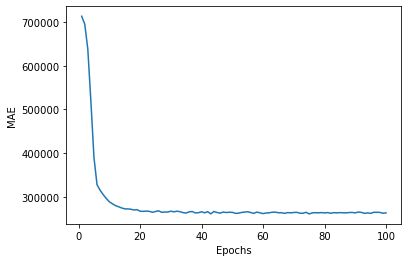

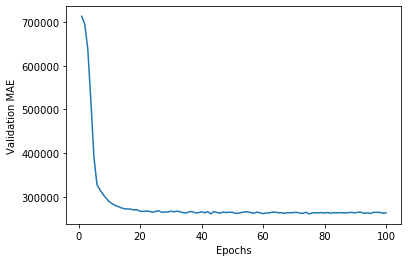

processing fold # 6
(1176, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 142us/step - loss: 746020182339.9943 - mae: 713610.3750 - val_loss: 679533752737.9592 - val_mae: 678850.7500
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 717896240765.5848 - mae: 695469.5000 - val_loss: 629329485991.1837 - val_mae: 644136.0000
Epoch 3/100
1378/1378 [==============================] - 0s 72us/step - loss: 628266662176.3251 - mae: 634284.2500 - val_loss: 509968080394.4490 - val_mae: 552312.2500
Epoch 4/100
1378/1378 [==============================] - 0s 70us/step - loss: 461850135737.7764 - mae: 508218.4375 - val_loss: 338454780948.8979 - val_mae: 399377.1875
Epoch 5/100
1378/1378 [==============================] - 0s 73us/step - loss: 306018695480.1045 - mae: 375391.5000 - val_loss: 243929530869.5510 - val_mae: 325894.6875
Epoch 6/100
1378/1378 [==============================] - 0s 72us/step - loss: 2346

1378/1378 [==============================] - 0s 76us/step - loss: 156098133659.3091 - mae: 262324.0312 - val_loss: 138312280523.7551 - val_mae: 267914.4688
Epoch 50/100
1378/1378 [==============================] - 0s 78us/step - loss: 156586288233.5210 - mae: 268828.4375 - val_loss: 135550343042.6122 - val_mae: 260062.9531
Epoch 51/100
1378/1378 [==============================] - 0s 76us/step - loss: 155793626169.9623 - mae: 266051.5625 - val_loss: 136484328510.6939 - val_mae: 257039.7188
Epoch 52/100
1378/1378 [==============================] - 0s 73us/step - loss: 155903328386.7867 - mae: 264459.3750 - val_loss: 137970537200.3265 - val_mae: 258182.5781
Epoch 53/100
1378/1378 [==============================] - 0s 72us/step - loss: 155997610447.6981 - mae: 264845.9688 - val_loss: 140026609329.6327 - val_mae: 263521.6875
Epoch 54/100
1378/1378 [==============================] - 0s 72us/step - loss: 154725891251.8316 - mae: 265717.1562 - val_loss: 138810035806.0408 - val_mae: 259775.3438

1378/1378 [==============================] - 0s 72us/step - loss: 152888002464.8824 - mae: 266222.1562 - val_loss: 276721649789.3878 - val_mae: 280044.3125
Epoch 98/100
1378/1378 [==============================] - 0s 73us/step - loss: 152082373288.6851 - mae: 264413.4062 - val_loss: 280382341788.7347 - val_mae: 279757.4375
Epoch 99/100
1378/1378 [==============================] - 0s 70us/step - loss: 152717779502.8157 - mae: 263717.2188 - val_loss: 296015770352.3265 - val_mae: 285578.0312
Epoch 100/100
196/196 [==============================] - 0s 41us/step


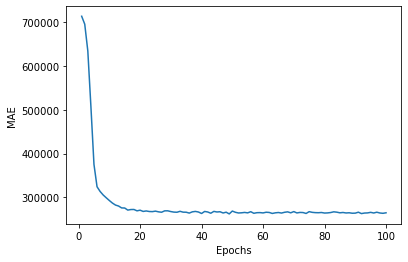

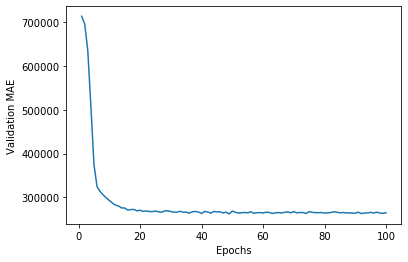

processing fold # 7
(1372, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/100
1378/1378 [==============================] - 0s 140us/step - loss: 758195189667.8549 - mae: 718908.1250 - val_loss: 596637082435.9183 - val_mae: 642862.3125
Epoch 2/100
1378/1378 [==============================] - 0s 73us/step - loss: 730733686766.1655 - mae: 701570.6875 - val_loss: 549587592338.2857 - val_mae: 609407.5625
Epoch 3/100
1378/1378 [==============================] - 0s 77us/step - loss: 646506695723.1002 - mae: 644396.5000 - val_loss: 442376422044.7347 - val_mae: 524050.5312
Epoch 4/100
1378/1378 [==============================] - 0s 76us/step - loss: 491791198716.2845 - mae: 526622.0625 - val_loss: 281055080197.2245 - val_mae: 375978.6250
Epoch 5/100
1378/1378 [==============================] - 0s 73us/step - loss: 333112338821.3875 - mae: 392980.1562 - val_loss: 183739057465.4694 - val_mae: 290903.1562
Epoch 6/100
1378/1378 [==============================] - 0s 75us/step - loss: 2544

1378/1378 [==============================] - 0s 73us/step - loss: 157321742119.0131 - mae: 272717.4688 - val_loss: 112616264265.1429 - val_mae: 229042.6562
Epoch 50/100
1378/1378 [==============================] - 0s 71us/step - loss: 157959874996.9463 - mae: 271207.1250 - val_loss: 111303347806.0408 - val_mae: 226176.0156
Epoch 51/100
1378/1378 [==============================] - 0s 74us/step - loss: 157421003322.7054 - mae: 268425.3438 - val_loss: 111988371539.5918 - val_mae: 228026.5781
Epoch 52/100
1378/1378 [==============================] - 0s 75us/step - loss: 156831709995.4717 - mae: 269533.4375 - val_loss: 112577086108.7347 - val_mae: 236359.6875
Epoch 53/100
1378/1378 [==============================] - 0s 73us/step - loss: 157184362035.2743 - mae: 271674.0312 - val_loss: 111690797808.3265 - val_mae: 229360.4219
Epoch 54/100
1378/1378 [==============================] - 0s 77us/step - loss: 156827108350.5138 - mae: 269226.5938 - val_loss: 113657597199.6735 - val_mae: 242626.0469

1378/1378 [==============================] - 0s 76us/step - loss: 157683793854.6067 - mae: 271690.0938 - val_loss: 111160703686.5306 - val_mae: 223651.3125
Epoch 98/100
1378/1378 [==============================] - 0s 75us/step - loss: 156689925950.7924 - mae: 267063.9062 - val_loss: 110126546609.6327 - val_mae: 226771.8594
Epoch 99/100
1378/1378 [==============================] - 0s 72us/step - loss: 157358226653.4456 - mae: 267753.8125 - val_loss: 110884523614.0408 - val_mae: 233251.2188
Epoch 100/100
196/196 [==============================] - 0s 41us/step


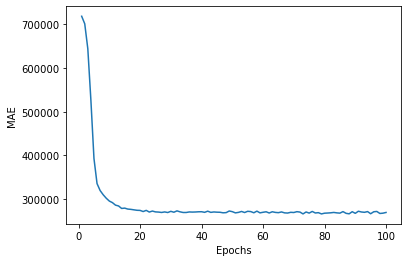

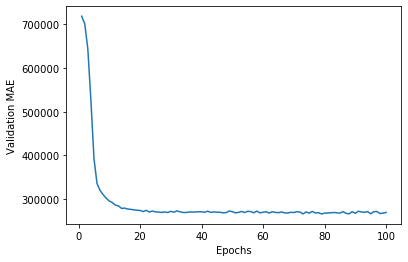

In [8]:
k=8
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
        
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    all_mae_histories.append(val_mae_history)

processing fold # 0
(0, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/150
1181/1181 [==============================] - 0s 159us/step - loss: 723414474176.2710 - mae: 704435.5625 - val_loss: 784151788942.6565 - val_mae: 726102.9375
Epoch 2/150
1181/1181 [==============================] - 0s 82us/step - loss: 705550304383.4580 - mae: 692920.7500 - val_loss: 747726912660.5190 - val_mae: 704766.1875
Epoch 3/150
1181/1181 [==============================] - 0s 81us/step - loss: 649520391968.2981 - mae: 656559.6875 - val_loss: 660182094022.0253 - val_mae: 650504.6875
Epoch 4/150
1181/1181 [==============================] - 0s 80us/step - loss: 543976951735.1668 - mae: 579563.6250 - val_loss: 515964798345.4453 - val_mae: 547949.0000
Epoch 5/150
1181/1181 [==============================] - 0s 80us/step - loss: 401037532844.1118 - mae: 459052.2188 - val_loss: 352356339910.0255 - val_mae: 416419.8125
Epoch 6/150
1181/1181 [==============================] - 0s 81us/step - loss: 2906109

1181/1181 [==============================] - 0s 76us/step - loss: 151591924138.5944 - mae: 266750.5312 - val_loss: 149658147404.8651 - val_mae: 261840.5312
Epoch 50/150
1181/1181 [==============================] - 0s 78us/step - loss: 151283815853.1956 - mae: 264820.2812 - val_loss: 147342347360.4071 - val_mae: 263420.8438
Epoch 51/150
1181/1181 [==============================] - 0s 80us/step - loss: 151801421165.0330 - mae: 267242.5625 - val_loss: 147774231142.9211 - val_mae: 262718.0938
Epoch 52/150
1181/1181 [==============================] - 0s 78us/step - loss: 151339377770.6486 - mae: 265442.3750 - val_loss: 147238966384.0407 - val_mae: 263255.3750
Epoch 53/150
1181/1181 [==============================] - 0s 79us/step - loss: 150747081617.8831 - mae: 266984.4688 - val_loss: 149256544381.0687 - val_mae: 261619.2500
Epoch 54/150
1181/1181 [==============================] - 0s 80us/step - loss: 152008205342.3472 - mae: 265857.7812 - val_loss: 148908893660.8244 - val_mae: 261652.6406

1181/1181 [==============================] - 0s 81us/step - loss: 150277666581.8933 - mae: 264772.5625 - val_loss: 147095389681.6692 - val_mae: 262393.8438
Epoch 98/150
1181/1181 [==============================] - 0s 79us/step - loss: 151087923678.6181 - mae: 265314.8438 - val_loss: 146578460244.6819 - val_mae: 262395.5312
Epoch 99/150
1181/1181 [==============================] - 0s 78us/step - loss: 150230202092.2744 - mae: 264840.0625 - val_loss: 147137860824.2646 - val_mae: 262267.8125
Epoch 100/150
1181/1181 [==============================] - 0s 80us/step - loss: 150171893302.1914 - mae: 264669.5938 - val_loss: 147713878740.3562 - val_mae: 261573.1719
Epoch 101/150
1181/1181 [==============================] - 0s 81us/step - loss: 150626610773.4056 - mae: 264729.2812 - val_loss: 146234932601.8117 - val_mae: 262741.4375
Epoch 102/150
1181/1181 [==============================] - 0s 75us/step - loss: 150181939330.0593 - mae: 265773.5625 - val_loss: 147688861894.0255 - val_mae: 260816.4

1181/1181 [==============================] - 0s 81us/step - loss: 149809029425.2057 - mae: 265653.3750 - val_loss: 147901430849.1400 - val_mae: 261526.7344
Epoch 146/150
1181/1181 [==============================] - 0s 80us/step - loss: 149307940773.8256 - mae: 264351.4688 - val_loss: 147084295066.3817 - val_mae: 261670.4062
Epoch 147/150
1181/1181 [==============================] - 0s 76us/step - loss: 149254464029.0466 - mae: 264653.6562 - val_loss: 148133960122.9517 - val_mae: 261766.2344
Epoch 148/150
1181/1181 [==============================] - 0s 77us/step - loss: 149170702688.0271 - mae: 264239.7500 - val_loss: 147936804134.4326 - val_mae: 262298.3125
Epoch 149/150
1181/1181 [==============================] - 0s 77us/step - loss: 149219926494.6181 - mae: 263672.5625 - val_loss: 146717322065.4249 - val_mae: 263382.7812
Epoch 150/150
393/393 [==============================] - 0s 36us/step


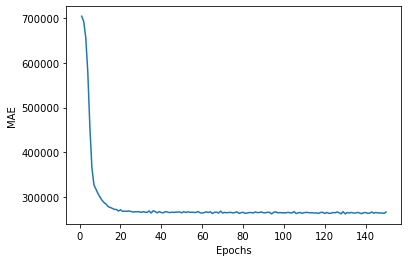

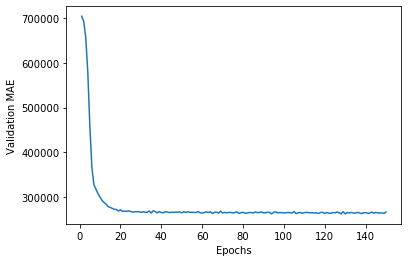

processing fold # 1
(393, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/150
1181/1181 [==============================] - 0s 158us/step - loss: 733214162236.4775 - mae: 706696.8125 - val_loss: 754532901218.3612 - val_mae: 718959.0625
Epoch 2/150
1181/1181 [==============================] - 0s 76us/step - loss: 715430913616.2032 - mae: 695180.1250 - val_loss: 719876106255.6335 - val_mae: 697090.4375
Epoch 3/150
1181/1181 [==============================] - 0s 77us/step - loss: 661523436695.7358 - mae: 658799.7500 - val_loss: 638144597963.8881 - val_mae: 643935.0000
Epoch 4/150
1181/1181 [==============================] - 0s 78us/step - loss: 557276394266.2286 - mae: 581304.3125 - val_loss: 505484164244.5191 - val_mae: 544990.1875
Epoch 5/150
1181/1181 [==============================] - 0s 77us/step - loss: 411955770152.1016 - mae: 462026.1250 - val_loss: 358297759504.2850 - val_mae: 414920.1875
Epoch 6/150
1181/1181 [==============================] - 0s 77us/step - loss: 27535

1181/1181 [==============================] - 0s 77us/step - loss: 131536170969.8493 - mae: 251874.1406 - val_loss: 524927895067.3588 - val_mae: 295076.4375
Epoch 50/150
1181/1181 [==============================] - 0s 81us/step - loss: 132077249025.3006 - mae: 253131.2656 - val_loss: 516947751422.6972 - val_mae: 293213.7188
Epoch 51/150
1181/1181 [==============================] - 0s 82us/step - loss: 131966854652.9653 - mae: 253029.7656 - val_loss: 513879477135.9594 - val_mae: 291875.1562
Epoch 52/150
1181/1181 [==============================] - 0s 81us/step - loss: 131607899483.6918 - mae: 252279.8438 - val_loss: 522368525851.3588 - val_mae: 294768.7812
Epoch 53/150
1181/1181 [==============================] - 0s 84us/step - loss: 131488519881.5919 - mae: 253206.4688 - val_loss: 523939804459.6437 - val_mae: 293507.6562
Epoch 54/150
1181/1181 [==============================] - 0s 84us/step - loss: 131559511087.6884 - mae: 253876.0469 - val_loss: 499137274794.0153 - val_mae: 287567.1875

1181/1181 [==============================] - 0s 81us/step - loss: 131356499503.2549 - mae: 252701.1250 - val_loss: 509833813119.6743 - val_mae: 287374.9688
Epoch 98/150
1181/1181 [==============================] - 0s 77us/step - loss: 131448143650.0322 - mae: 251932.3906 - val_loss: 524105825928.7939 - val_mae: 289648.1562
Epoch 99/150
1181/1181 [==============================] - 0s 79us/step - loss: 130527031396.5792 - mae: 249333.6250 - val_loss: 531710235489.0585 - val_mae: 293310.0938
Epoch 100/150
1181/1181 [==============================] - 0s 80us/step - loss: 130796889735.6952 - mae: 253131.6562 - val_loss: 506590889332.6005 - val_mae: 286484.8750
Epoch 101/150
1181/1181 [==============================] - 0s 79us/step - loss: 131269014714.4183 - mae: 251444.8594 - val_loss: 530493825461.7405 - val_mae: 292119.4062
Epoch 102/150
1181/1181 [==============================] - 0s 77us/step - loss: 131164234102.5707 - mae: 251893.1406 - val_loss: 526983226636.3766 - val_mae: 291256.9

1181/1181 [==============================] - 0s 81us/step - loss: 130982010772.4843 - mae: 251523.6094 - val_loss: 545340031163.6030 - val_mae: 290709.6250
Epoch 146/150
1181/1181 [==============================] - 0s 83us/step - loss: 130919058301.0737 - mae: 250979.9844 - val_loss: 547348525462.4733 - val_mae: 292895.5000
Epoch 147/150
1181/1181 [==============================] - 0s 78us/step - loss: 130505443180.5995 - mae: 250998.1094 - val_loss: 585502319175.6539 - val_mae: 301747.1875
Epoch 148/150
1181/1181 [==============================] - 0s 81us/step - loss: 131103481613.2227 - mae: 252742.8594 - val_loss: 576991826743.3689 - val_mae: 299066.5938
Epoch 149/150
1181/1181 [==============================] - 0s 77us/step - loss: 130474397401.1990 - mae: 251937.7812 - val_loss: 540193438597.5369 - val_mae: 290878.0000
Epoch 150/150
393/393 [==============================] - 0s 33us/step


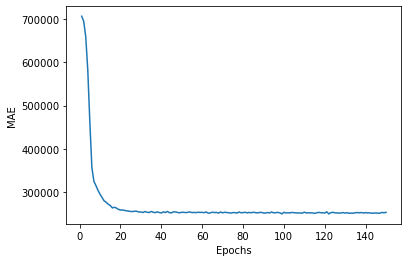

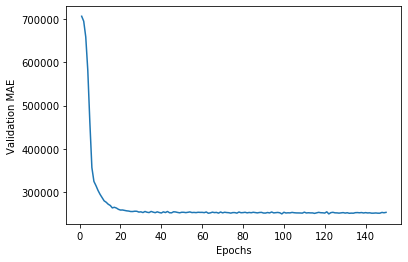

processing fold # 2
(786, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/150
1181/1181 [==============================] - 0s 159us/step - loss: 733852886386.2355 - mae: 706892.1875 - val_loss: 753864799302.3512 - val_mae: 719176.3750
Epoch 2/150
1181/1181 [==============================] - 0s 77us/step - loss: 718476465872.5284 - mae: 696997.7500 - val_loss: 724974439186.8906 - val_mae: 699921.5000
Epoch 3/150
1181/1181 [==============================] - 0s 79us/step - loss: 670116747002.1473 - mae: 665343.1250 - val_loss: 652116650541.5980 - val_mae: 648929.3125
Epoch 4/150
1181/1181 [==============================] - 0s 75us/step - loss: 573995151654.8010 - mae: 596918.4375 - val_loss: 531947096559.0636 - val_mae: 553935.0000
Epoch 5/150
1181/1181 [==============================] - 0s 79us/step - loss: 437104969483.4886 - mae: 486963.1562 - val_loss: 386776415818.2595 - val_mae: 434004.0312
Epoch 6/150
1181/1181 [==============================] - 0s 77us/step - loss: 30611

Epoch 49/150
1181/1181 [==============================] - 0s 83us/step - loss: 146465577204.5114 - mae: 260510.4844 - val_loss: 167324037088.7328 - val_mae: 290153.2500
Epoch 50/150
1181/1181 [==============================] - 0s 83us/step - loss: 146610862671.3362 - mae: 260255.7344 - val_loss: 167265448384.1628 - val_mae: 291746.0625
Epoch 51/150
1181/1181 [==============================] - 0s 81us/step - loss: 147181276167.8036 - mae: 260794.6406 - val_loss: 166330031919.5522 - val_mae: 288108.6875
Epoch 52/150
1181/1181 [==============================] - 0s 80us/step - loss: 147046836194.5199 - mae: 262027.9219 - val_loss: 165680361961.8524 - val_mae: 281604.8125
Epoch 53/150
1181/1181 [==============================] - 0s 81us/step - loss: 146830555151.6071 - mae: 258632.1875 - val_loss: 165883545636.4783 - val_mae: 285951.2812
Epoch 54/150
1181/1181 [==============================] - 0s 81us/step - loss: 147217487249.4496 - mae: 261925.0625 - val_loss: 165227706060.5394 - val_mae

1181/1181 [==============================] - 0s 81us/step - loss: 146507381528.4945 - mae: 258799.5469 - val_loss: 166395312091.5217 - val_mae: 286970.1875
Epoch 98/150
1181/1181 [==============================] - 0s 80us/step - loss: 146286246729.0500 - mae: 257939.4219 - val_loss: 167188369689.4046 - val_mae: 290061.1562
Epoch 99/150
1181/1181 [==============================] - 0s 78us/step - loss: 147157511501.8188 - mae: 259703.4844 - val_loss: 165982327232.1628 - val_mae: 284550.3750
Epoch 100/150
1181/1181 [==============================] - 0s 82us/step - loss: 146405234440.0203 - mae: 257641.5156 - val_loss: 166440287234.6056 - val_mae: 288017.4375
Epoch 101/150
1181/1181 [==============================] - 0s 81us/step - loss: 146731727023.1465 - mae: 259393.9844 - val_loss: 167241326237.6387 - val_mae: 287295.6562
Epoch 102/150
1181/1181 [==============================] - 0s 80us/step - loss: 146813562106.5809 - mae: 260242.9062 - val_loss: 166074959887.6336 - val_mae: 280936.0

1181/1181 [==============================] - 0s 80us/step - loss: 145897009460.6740 - mae: 257418.8594 - val_loss: 164400283085.1908 - val_mae: 285326.4062
Epoch 146/150
1181/1181 [==============================] - 0s 79us/step - loss: 146455713377.5444 - mae: 258878.3438 - val_loss: 164124342631.5725 - val_mae: 282614.5625
Epoch 147/150
1181/1181 [==============================] - 0s 78us/step - loss: 146421668368.9077 - mae: 257907.2344 - val_loss: 164374921257.6896 - val_mae: 284427.2812
Epoch 148/150
1181/1181 [==============================] - 0s 82us/step - loss: 145383649886.9433 - mae: 259070.5156 - val_loss: 164950111156.4377 - val_mae: 277976.0938
Epoch 149/150
1181/1181 [==============================] - 0s 83us/step - loss: 144866913419.5970 - mae: 255033.6094 - val_loss: 165869031976.3868 - val_mae: 291170.4688
Epoch 150/150
393/393 [==============================] - 0s 31us/step


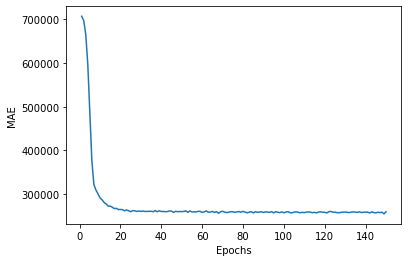

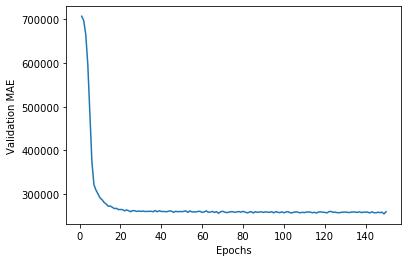

processing fold # 3
(1179, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/150
1181/1181 [==============================] - 0s 158us/step - loss: 767686508571.7460 - mae: 723683.6875 - val_loss: 650813420489.2825 - val_mae: 667670.6250
Epoch 2/150
1181/1181 [==============================] - 0s 77us/step - loss: 748744440773.9069 - mae: 711757.6875 - val_loss: 617876862897.8320 - val_mae: 645459.4375
Epoch 3/150
1181/1181 [==============================] - 0s 77us/step - loss: 687061531784.1287 - mae: 673132.9375 - val_loss: 536758208590.1680 - val_mae: 586965.1250
Epoch 4/150
1181/1181 [==============================] - 0s 77us/step - loss: 567573635134.4285 - mae: 590248.0000 - val_loss: 406606339866.7074 - val_mae: 477425.7188
Epoch 5/150
1181/1181 [==============================] - 0s 81us/step - loss: 415784195681.5445 - mae: 465707.2500 - val_loss: 274490146524.1730 - val_mae: 357957.7812
Epoch 6/150
1181/1181 [==============================] - 0s 81us/step - loss: 2976

1181/1181 [==============================] - 0s 76us/step - loss: 158175282927.7426 - mae: 272751.9062 - val_loss: 126953456262.1883 - val_mae: 248552.3281
Epoch 50/150
1181/1181 [==============================] - 0s 76us/step - loss: 157189186694.3946 - mae: 273057.3438 - val_loss: 127548565019.3588 - val_mae: 247182.1719
Epoch 51/150
1181/1181 [==============================] - 0s 76us/step - loss: 157422669903.7697 - mae: 272062.7812 - val_loss: 128420123551.5929 - val_mae: 251408.4062
Epoch 52/150
1181/1181 [==============================] - 0s 77us/step - loss: 158223760991.8103 - mae: 274417.1250 - val_loss: 128151941318.0255 - val_mae: 248502.5625
Epoch 53/150
1181/1181 [==============================] - ETA: 0s - loss: 148628543569.9200 - mae: 262675.187 - 0s 78us/step - loss: 157302497078.8416 - mae: 270902.0938 - val_loss: 129818142297.8931 - val_mae: 254725.6719
Epoch 54/150
1181/1181 [==============================] - 0s 74us/step - loss: 157816812869.1482 - mae: 274771.625

1181/1181 [==============================] - 0s 78us/step - loss: 154815108795.7189 - mae: 270732.0938 - val_loss: 214758020895.9186 - val_mae: 268502.6562
Epoch 98/150
1181/1181 [==============================] - 0s 79us/step - loss: 155141836949.1346 - mae: 271468.3438 - val_loss: 220825597519.4707 - val_mae: 271065.0312
Epoch 99/150
1181/1181 [==============================] - 0s 75us/step - loss: 154945754423.2752 - mae: 274405.3438 - val_loss: 211308913911.5318 - val_mae: 258521.2812
Epoch 100/150
1181/1181 [==============================] - 0s 82us/step - loss: 155215901799.1804 - mae: 269853.0000 - val_loss: 221903766296.1018 - val_mae: 264782.0000
Epoch 101/150
1181/1181 [==============================] - 0s 81us/step - loss: 154828649894.2591 - mae: 272135.2500 - val_loss: 224020313596.0916 - val_mae: 264141.8438
Epoch 102/150
1181/1181 [==============================] - 0s 79us/step - loss: 154430123993.8493 - mae: 271092.2812 - val_loss: 230102222113.2214 - val_mae: 266652.1

1181/1181 [==============================] - 0s 83us/step - loss: 153516525614.8213 - mae: 271096.8125 - val_loss: 486435158250.5038 - val_mae: 277497.3125
Epoch 146/150
1181/1181 [==============================] - 0s 82us/step - loss: 153397381048.9009 - mae: 270416.3750 - val_loss: 504411087848.5496 - val_mae: 280249.3438
Epoch 147/150
1181/1181 [==============================] - 0s 81us/step - loss: 153619033782.5165 - mae: 271536.5312 - val_loss: 486076437324.2137 - val_mae: 273007.1562
Epoch 148/150
1181/1181 [==============================] - 0s 86us/step - loss: 153893483938.7909 - mae: 269785.0938 - val_loss: 499096035390.5344 - val_mae: 274175.2812
Epoch 149/150
1181/1181 [==============================] - 0s 77us/step - loss: 154213414317.1956 - mae: 270677.4688 - val_loss: 517493241173.3333 - val_mae: 276759.8125
Epoch 150/150
393/393 [==============================] - 0s 36us/step


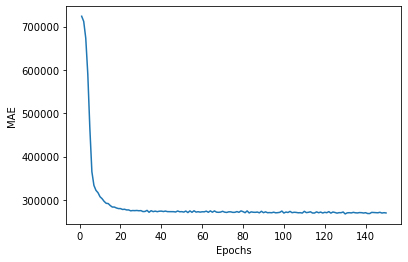

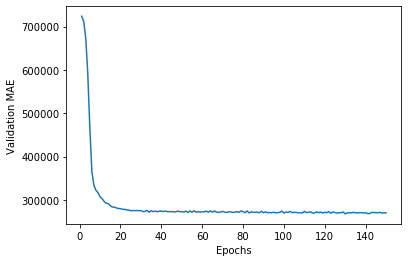

In [11]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 150
mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)

processing fold # 0
(0, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 121us/step - loss: 724634415051.9762 - mae: 705257.8125 - val_loss: 789290756028.2544 - val_mae: 729097.6875
Epoch 2/500
1181/1181 [==============================] - 0s 39us/step - loss: 721188048781.5479 - mae: 702987.2500 - val_loss: 782395144822.5547 - val_mae: 725034.3125
Epoch 3/500
1181/1181 [==============================] - 0s 40us/step - loss: 711036168037.6630 - mae: 696451.3125 - val_loss: 766569754342.5955 - val_mae: 715677.3750
Epoch 4/500
1181/1181 [==============================] - 0s 39us/step - loss: 690964644686.2523 - mae: 683367.6250 - val_loss: 737896130283.8065 - val_mae: 698445.2500
Epoch 5/500
1181/1181 [==============================] - 0s 41us/step - loss: 657426970202.6079 - mae: 661500.5000 - val_loss: 692634644573.8015 - val_mae: 670296.5625
Epoch 6/500
1181/1181 [==============================] - 0s 41us/step - loss: 6093230

1181/1181 [==============================] - 0s 40us/step - loss: 150183218953.7545 - mae: 269035.3438 - val_loss: 148722598513.3435 - val_mae: 264357.9375
Epoch 50/500
1181/1181 [==============================] - 0s 39us/step - loss: 149880133710.0356 - mae: 265648.1875 - val_loss: 147969978628.5598 - val_mae: 266717.0625
Epoch 51/500
1181/1181 [==============================] - 0s 41us/step - loss: 149411515323.5021 - mae: 269517.5625 - val_loss: 151290331240.2239 - val_mae: 263300.9062
Epoch 52/500
1181/1181 [==============================] - 0s 40us/step - loss: 149558920319.4581 - mae: 267025.6250 - val_loss: 151600504164.9669 - val_mae: 263448.6562
Epoch 53/500
1181/1181 [==============================] - 0s 42us/step - loss: 149396590865.9915 - mae: 265626.4375 - val_loss: 148692098238.2086 - val_mae: 266038.7500
Epoch 54/500
1181/1181 [==============================] - 0s 41us/step - loss: 148612170386.9670 - mae: 266141.4375 - val_loss: 147982622198.8804 - val_mae: 267021.0625

1181/1181 [==============================] - 0s 43us/step - loss: 146983646893.8459 - mae: 267543.7500 - val_loss: 150267000795.5216 - val_mae: 263821.2500
Epoch 98/500
1181/1181 [==============================] - 0s 45us/step - loss: 146852358003.5360 - mae: 267040.0312 - val_loss: 150251526649.4860 - val_mae: 264355.9062
Epoch 99/500
1181/1181 [==============================] - 0s 42us/step - loss: 147099618186.9467 - mae: 267815.0312 - val_loss: 150674158495.5929 - val_mae: 263405.5312
Epoch 100/500
1181/1181 [==============================] - 0s 42us/step - loss: 146927415143.3971 - mae: 267554.2188 - val_loss: 152407057447.0840 - val_mae: 263165.5938
Epoch 101/500
1181/1181 [==============================] - 0s 40us/step - loss: 147067923817.5648 - mae: 264562.0312 - val_loss: 149055225730.9313 - val_mae: 266017.5000
Epoch 102/500
1181/1181 [==============================] - 0s 40us/step - loss: 147378697735.3700 - mae: 268476.5312 - val_loss: 150494427891.6234 - val_mae: 263863.2

1181/1181 [==============================] - 0s 40us/step - loss: 146654390193.9644 - mae: 268280.8750 - val_loss: 150227226613.5776 - val_mae: 262847.2812
Epoch 146/500
1181/1181 [==============================] - 0s 40us/step - loss: 146600120136.1829 - mae: 265921.1562 - val_loss: 148884423468.9466 - val_mae: 263321.5312
Epoch 147/500
1181/1181 [==============================] - 0s 42us/step - loss: 146192563058.6689 - mae: 264978.0312 - val_loss: 147635647600.0407 - val_mae: 265854.7500
Epoch 148/500
1181/1181 [==============================] - 0s 41us/step - loss: 146521453907.0212 - mae: 268751.3750 - val_loss: 149132235742.1272 - val_mae: 263220.8750
Epoch 149/500
1181/1181 [==============================] - 0s 41us/step - loss: 146504738384.2032 - mae: 265483.0625 - val_loss: 147840436719.0636 - val_mae: 264783.4688
Epoch 150/500
1181/1181 [==============================] - 0s 42us/step - loss: 146714842249.8628 - mae: 267817.4375 - val_loss: 149922632294.9211 - val_mae: 262750

1181/1181 [==============================] - 0s 41us/step - loss: 146257747350.6520 - mae: 266908.4062 - val_loss: 149859300589.1094 - val_mae: 261810.9062
Epoch 194/500
1181/1181 [==============================] - 0s 41us/step - loss: 146072872313.1719 - mae: 264148.7188 - val_loss: 147788936012.2137 - val_mae: 263436.0000
Epoch 195/500
1181/1181 [==============================] - 0s 39us/step - loss: 146142027373.6833 - mae: 267728.4688 - val_loss: 149788368416.5700 - val_mae: 262054.9219
Epoch 196/500
1181/1181 [==============================] - 0s 39us/step - loss: 146121158936.9280 - mae: 265396.8438 - val_loss: 147352097778.9720 - val_mae: 263715.2188
Epoch 197/500
1181/1181 [==============================] - 0s 39us/step - loss: 146122412014.6588 - mae: 266270.4688 - val_loss: 146937378029.1094 - val_mae: 264943.7812
Epoch 198/500
1181/1181 [==============================] - 0s 42us/step - loss: 146276486609.6122 - mae: 267554.1875 - val_loss: 147773281016.8346 - val_mae: 263373

1181/1181 [==============================] - 0s 42us/step - loss: 146181555181.7917 - mae: 267098.1250 - val_loss: 146051961030.0255 - val_mae: 264223.3125
Epoch 242/500
1181/1181 [==============================] - 0s 39us/step - loss: 145014953645.8459 - mae: 268713.9375 - val_loss: 149739039256.7532 - val_mae: 260712.4688
Epoch 243/500
1181/1181 [==============================] - 0s 42us/step - loss: 146255069780.5385 - mae: 265672.6562 - val_loss: 147671767107.7455 - val_mae: 261887.0000
Epoch 244/500
1181/1181 [==============================] - 0s 42us/step - loss: 146051927339.1363 - mae: 266273.0000 - val_loss: 148277866923.3181 - val_mae: 262235.8438
Epoch 245/500
1181/1181 [==============================] - 0s 41us/step - loss: 145642784246.0288 - mae: 263987.0625 - val_loss: 146195286135.8575 - val_mae: 265718.2188
Epoch 246/500
1181/1181 [==============================] - 0s 41us/step - loss: 145701672809.1313 - mae: 267133.4062 - val_loss: 147757170875.6031 - val_mae: 263669

1181/1181 [==============================] - 0s 42us/step - loss: 146023825997.6021 - mae: 266223.8438 - val_loss: 147758035496.3868 - val_mae: 261544.6094
Epoch 290/500
1181/1181 [==============================] - 0s 43us/step - loss: 145814071876.9314 - mae: 265801.8125 - val_loss: 149663723738.8702 - val_mae: 260101.5156
Epoch 291/500
1181/1181 [==============================] - 0s 45us/step - loss: 146109207384.6571 - mae: 263467.2812 - val_loss: 147630805731.9898 - val_mae: 260907.2188
Epoch 292/500
1181/1181 [==============================] - 0s 43us/step - loss: 145745168638.9162 - mae: 264952.1875 - val_loss: 145918526899.1349 - val_mae: 262135.6875
Epoch 293/500
1181/1181 [==============================] - 0s 43us/step - loss: 145750082278.2049 - mae: 266332.3750 - val_loss: 147159442804.6005 - val_mae: 261687.3125
Epoch 294/500
1181/1181 [==============================] - 0s 42us/step - loss: 145923033870.0898 - mae: 265237.5312 - val_loss: 146490394827.2366 - val_mae: 262318

1181/1181 [==============================] - 0s 42us/step - loss: 145533230791.8578 - mae: 266754.9688 - val_loss: 146993325115.9287 - val_mae: 261300.2188
Epoch 338/500
1181/1181 [==============================] - 0s 40us/step - loss: 145688295973.7172 - mae: 263284.6250 - val_loss: 144468074787.8270 - val_mae: 264608.9062
Epoch 339/500
1181/1181 [==============================] - 0s 40us/step - loss: 145686052461.6833 - mae: 267517.0938 - val_loss: 145341376485.9440 - val_mae: 262376.8438
Epoch 340/500
1181/1181 [==============================] - 0s 41us/step - loss: 145999546935.0584 - mae: 265240.5312 - val_loss: 144738471216.8549 - val_mae: 263823.4688
Epoch 341/500
1181/1181 [==============================] - 0s 48us/step - loss: 145831915821.7375 - mae: 267106.6562 - val_loss: 146614830348.3766 - val_mae: 261773.1719
Epoch 342/500
1181/1181 [==============================] - 0s 45us/step - loss: 145635375084.9247 - mae: 265200.5000 - val_loss: 146691139724.7023 - val_mae: 261482

1181/1181 [==============================] - 0s 42us/step - loss: 145171640365.0872 - mae: 264730.5625 - val_loss: 147295441656.8346 - val_mae: 261552.6562
Epoch 386/500
1181/1181 [==============================] - 0s 41us/step - loss: 145739180002.5199 - mae: 264435.1250 - val_loss: 146358108493.5165 - val_mae: 262254.9062
Epoch 387/500
1181/1181 [==============================] - 0s 42us/step - loss: 145238528530.6418 - mae: 265959.4688 - val_loss: 149318693270.4733 - val_mae: 260733.1562
Epoch 388/500
1181/1181 [==============================] - 0s 41us/step - loss: 145635341456.7993 - mae: 263513.7812 - val_loss: 146321123301.9440 - val_mae: 261902.9375
Epoch 389/500
1181/1181 [==============================] - 0s 41us/step - loss: 144632462999.3023 - mae: 264047.6562 - val_loss: 144063227148.3766 - val_mae: 266014.0625
Epoch 390/500
1181/1181 [==============================] - 0s 40us/step - loss: 145318402105.2261 - mae: 267683.0312 - val_loss: 145919163123.6234 - val_mae: 261791

1181/1181 [==============================] - 0s 44us/step - loss: 145080936300.5995 - mae: 264765.4375 - val_loss: 148660466987.6438 - val_mae: 260986.6875
Epoch 434/500
1181/1181 [==============================] - 0s 42us/step - loss: 145041946660.4166 - mae: 264583.8750 - val_loss: 147325263684.3969 - val_mae: 261076.0469
Epoch 435/500
1181/1181 [==============================] - 0s 42us/step - loss: 144723140434.5876 - mae: 264540.8125 - val_loss: 148239616369.9949 - val_mae: 260688.8594
Epoch 436/500
1181/1181 [==============================] - 0s 42us/step - loss: 144729896025.3074 - mae: 263635.4688 - val_loss: 145575912737.2214 - val_mae: 262265.1875
Epoch 437/500
1181/1181 [==============================] - 0s 42us/step - loss: 144759250742.8416 - mae: 265280.1875 - val_loss: 146082937962.8295 - val_mae: 261714.8125
Epoch 438/500
1181/1181 [==============================] - 0s 41us/step - loss: 144753853740.8705 - mae: 265466.2812 - val_loss: 147768890417.5063 - val_mae: 261428

1181/1181 [==============================] - 0s 40us/step - loss: 144785619826.6689 - mae: 265066.6562 - val_loss: 145832020817.4249 - val_mae: 262435.4688
Epoch 482/500
1181/1181 [==============================] - 0s 42us/step - loss: 144429443472.5826 - mae: 264262.1875 - val_loss: 145285453599.9186 - val_mae: 263729.1250
Epoch 483/500
1181/1181 [==============================] - 0s 43us/step - loss: 144318661357.1414 - mae: 265977.4062 - val_loss: 145691118521.6489 - val_mae: 262357.8750
Epoch 484/500
1181/1181 [==============================] - 0s 42us/step - loss: 144465982858.5131 - mae: 265022.6562 - val_loss: 146111874066.2392 - val_mae: 261650.4688
Epoch 485/500
1181/1181 [==============================] - 0s 44us/step - loss: 144611032227.8747 - mae: 263460.6562 - val_loss: 144396623934.5344 - val_mae: 263463.3750
Epoch 486/500
1181/1181 [==============================] - 0s 42us/step - loss: 144579062861.1685 - mae: 265606.7188 - val_loss: 145690957891.7455 - val_mae: 262460

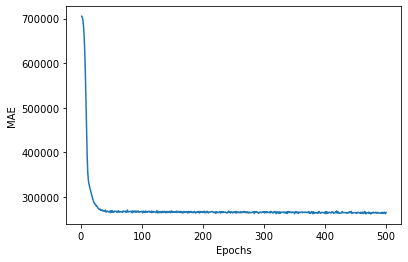

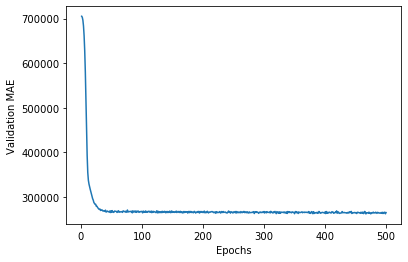

processing fold # 1
(393, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 122us/step - loss: 734552246596.2811 - mae: 707584.2500 - val_loss: 759648365726.9415 - val_mae: 722193.6875
Epoch 2/500
1181/1181 [==============================] - 0s 42us/step - loss: 731270368055.7086 - mae: 705502.6250 - val_loss: 753104948737.3029 - val_mae: 718182.5000
Epoch 3/500
1181/1181 [==============================] - 0s 44us/step - loss: 721598305390.1168 - mae: 699382.5000 - val_loss: 738463030858.2595 - val_mae: 709151.3750
Epoch 4/500
1181/1181 [==============================] - 0s 44us/step - loss: 702803145414.9907 - mae: 687260.3750 - val_loss: 711925641434.8702 - val_mae: 692846.8125
Epoch 5/500
1181/1181 [==============================] - 0s 41us/step - loss: 670993182903.8171 - mae: 666392.1250 - val_loss: 671274794090.8295 - val_mae: 667311.0625
Epoch 6/500
1181/1181 [==============================] - 0s 42us/step - loss: 62466

1181/1181 [==============================] - 0s 41us/step - loss: 132363770086.6384 - mae: 252903.7969 - val_loss: 464103077434.6259 - val_mae: 289455.9688
Epoch 50/500
1181/1181 [==============================] - 0s 40us/step - loss: 132304250448.2032 - mae: 252493.2969 - val_loss: 478091857972.1119 - val_mae: 292704.2812
Epoch 51/500
1181/1181 [==============================] - 0s 39us/step - loss: 132546643224.0610 - mae: 254286.9375 - val_loss: 471849109707.2367 - val_mae: 289543.1562
Epoch 52/500
1181/1181 [==============================] - 0s 40us/step - loss: 132143463893.0804 - mae: 252758.1094 - val_loss: 500117895089.8320 - val_mae: 296008.9375
Epoch 53/500
1181/1181 [==============================] - 0s 39us/step - loss: 132188219757.9001 - mae: 253524.2969 - val_loss: 479848280157.8015 - val_mae: 290746.4375
Epoch 54/500
1181/1181 [==============================] - 0s 40us/step - loss: 132061627977.2667 - mae: 253108.8594 - val_loss: 482746580721.0178 - val_mae: 292097.8438

1181/1181 [==============================] - 0s 41us/step - loss: 131281398701.6291 - mae: 251393.1719 - val_loss: 549055856744.2239 - val_mae: 297637.0938
Epoch 98/500
1181/1181 [==============================] - 0s 40us/step - loss: 131319773511.7494 - mae: 251996.5938 - val_loss: 547023950960.0406 - val_mae: 297596.9375
Epoch 99/500
1181/1181 [==============================] - 0s 40us/step - loss: 131063548994.7638 - mae: 253671.5625 - val_loss: 512018000283.6844 - val_mae: 288227.1250
Epoch 100/500
1181/1181 [==============================] - 0s 40us/step - loss: 130971502430.7265 - mae: 251230.0156 - val_loss: 538204229996.7837 - val_mae: 295274.3750
Epoch 101/500
1181/1181 [==============================] - 0s 40us/step - loss: 131238200003.5224 - mae: 252457.1094 - val_loss: 548024244625.2621 - val_mae: 297218.3125
Epoch 102/500
1181/1181 [==============================] - 0s 38us/step - loss: 131070417424.9077 - mae: 252030.6250 - val_loss: 541586918663.1654 - val_mae: 295113.5

1181/1181 [==============================] - 0s 41us/step - loss: 130902745192.0474 - mae: 251143.5625 - val_loss: 551105593364.8447 - val_mae: 295236.1562
Epoch 146/500
1181/1181 [==============================] - 0s 40us/step - loss: 130887899096.1152 - mae: 252841.5312 - val_loss: 530353546028.9466 - val_mae: 289765.5312
Epoch 147/500
1181/1181 [==============================] - 0s 42us/step - loss: 130900118404.0101 - mae: 250606.7656 - val_loss: 538601896128.8143 - val_mae: 291971.1250
Epoch 148/500
1181/1181 [==============================] - 0s 40us/step - loss: 130669846687.5394 - mae: 250830.5000 - val_loss: 550407811061.5776 - val_mae: 293669.4062
Epoch 149/500
1181/1181 [==============================] - 0s 39us/step - loss: 130886835551.1600 - mae: 251612.9688 - val_loss: 551908474609.0178 - val_mae: 294810.5312
Epoch 150/500
1181/1181 [==============================] - 0s 42us/step - loss: 130931210179.3057 - mae: 251899.6094 - val_loss: 537452636467.4606 - val_mae: 292313

1181/1181 [==============================] - 0s 42us/step - loss: 130527200216.9822 - mae: 250480.6094 - val_loss: 544611714900.0305 - val_mae: 292590.5000
Epoch 194/500
1181/1181 [==============================] - 0s 38us/step - loss: 130497125505.1922 - mae: 251594.8906 - val_loss: 541743567546.3002 - val_mae: 291582.2500
Epoch 195/500
1181/1181 [==============================] - 0s 40us/step - loss: 130573708517.7714 - mae: 251690.1406 - val_loss: 529131602628.7227 - val_mae: 288802.2188
Epoch 196/500
1181/1181 [==============================] - 0s 40us/step - loss: 130656107836.4776 - mae: 251585.8125 - val_loss: 539510568444.0916 - val_mae: 289972.8750
Epoch 197/500
1181/1181 [==============================] - 0s 42us/step - loss: 130676899160.2235 - mae: 250853.0156 - val_loss: 550408269896.9568 - val_mae: 292887.5312
Epoch 198/500
1181/1181 [==============================] - 0s 42us/step - loss: 130239886078.4827 - mae: 250469.0156 - val_loss: 581953587403.2367 - val_mae: 300249

1181/1181 [==============================] - 0s 41us/step - loss: 130337928031.5936 - mae: 250422.9844 - val_loss: 551852323097.4045 - val_mae: 294054.3125
Epoch 242/500
1181/1181 [==============================] - 0s 41us/step - loss: 130145375134.0220 - mae: 252832.5469 - val_loss: 519815469832.4682 - val_mae: 286067.5938
Epoch 243/500
1181/1181 [==============================] - 0s 42us/step - loss: 130771173046.5165 - mae: 249927.6406 - val_loss: 532340091875.3384 - val_mae: 288403.4062
Epoch 244/500
1181/1181 [==============================] - 0s 40us/step - loss: 130292280050.3438 - mae: 250322.0156 - val_loss: 544035010961.2621 - val_mae: 291244.0625
Epoch 245/500
1181/1181 [==============================] - 0s 38us/step - loss: 130088157274.1744 - mae: 250723.6562 - val_loss: 553308163397.6997 - val_mae: 293131.0625
Epoch 246/500
1181/1181 [==============================] - 0s 39us/step - loss: 130723233015.1126 - mae: 251463.7969 - val_loss: 564743515753.5267 - val_mae: 295129

1181/1181 [==============================] - 0s 41us/step - loss: 130387368395.5428 - mae: 250955.6719 - val_loss: 546529675717.3741 - val_mae: 291280.4688
Epoch 290/500
1181/1181 [==============================] - 0s 39us/step - loss: 130250796490.6757 - mae: 250613.1562 - val_loss: 556250100535.3689 - val_mae: 294272.8750
Epoch 291/500
1181/1181 [==============================] - 0s 39us/step - loss: 129959790722.0593 - mae: 251524.2344 - val_loss: 538690433409.6285 - val_mae: 289380.0938
Epoch 292/500
1181/1181 [==============================] - 0s 40us/step - loss: 130010378930.1812 - mae: 249482.5156 - val_loss: 544323716510.2901 - val_mae: 291572.2188
Epoch 293/500
1181/1181 [==============================] - 0s 41us/step - loss: 130044985621.4598 - mae: 250952.1094 - val_loss: 543216568148.0305 - val_mae: 291390.5625
Epoch 294/500
1181/1181 [==============================] - 0s 42us/step - loss: 129945257018.0931 - mae: 250458.5312 - val_loss: 549455370411.9695 - val_mae: 292856

1181/1181 [==============================] - 0s 43us/step - loss: 129566175429.6901 - mae: 250806.0312 - val_loss: 550574910477.0280 - val_mae: 291824.6562
Epoch 338/500
1181/1181 [==============================] - 0s 42us/step - loss: 129851403975.8577 - mae: 250124.4844 - val_loss: 565433690440.3053 - val_mae: 295140.4375
Epoch 339/500
1181/1181 [==============================] - 0s 43us/step - loss: 129591102360.8197 - mae: 251071.4062 - val_loss: 554376372911.8778 - val_mae: 291774.9062
Epoch 340/500
1181/1181 [==============================] - 0s 42us/step - loss: 129579912123.5021 - mae: 250651.7656 - val_loss: 539551303362.1171 - val_mae: 288246.5625
Epoch 341/500
1181/1181 [==============================] - 0s 42us/step - loss: 129633008526.4149 - mae: 249584.6875 - val_loss: 555506661068.5394 - val_mae: 293444.5312
Epoch 342/500
1181/1181 [==============================] - 0s 40us/step - loss: 129674508692.0508 - mae: 250989.6250 - val_loss: 549454634549.4147 - val_mae: 290474

1181/1181 [==============================] - 0s 42us/step - loss: 129169081592.8467 - mae: 249848.1094 - val_loss: 561368678483.3792 - val_mae: 289998.0000
Epoch 386/500
1181/1181 [==============================] - 0s 38us/step - loss: 129197139772.0440 - mae: 248854.3750 - val_loss: 555410430165.6591 - val_mae: 289962.7500
Epoch 387/500
1181/1181 [==============================] - 0s 40us/step - loss: 129091247607.7629 - mae: 249212.6094 - val_loss: 568347648979.7048 - val_mae: 293332.2812
Epoch 388/500
1181/1181 [==============================] - 0s 40us/step - loss: 129194704826.6350 - mae: 250228.6719 - val_loss: 574572662106.5446 - val_mae: 294590.2812
Epoch 389/500
1181/1181 [==============================] - 0s 41us/step - loss: 129263874911.5936 - mae: 251711.8438 - val_loss: 552351981401.2417 - val_mae: 289149.8125
Epoch 390/500
1181/1181 [==============================] - 0s 43us/step - loss: 129107866227.7528 - mae: 250115.2500 - val_loss: 553748588601.3231 - val_mae: 289142

1181/1181 [==============================] - 0s 40us/step - loss: 128443750970.5267 - mae: 249995.2656 - val_loss: 560787341395.3792 - val_mae: 289747.4062
Epoch 434/500
1181/1181 [==============================] - 0s 39us/step - loss: 128458301835.3802 - mae: 249735.9062 - val_loss: 569806089395.7863 - val_mae: 291392.7188
Epoch 435/500
1181/1181 [==============================] - 0s 41us/step - loss: 128397887181.0601 - mae: 249620.3438 - val_loss: 555796430514.4835 - val_mae: 287350.4375
Epoch 436/500
1181/1181 [==============================] - 0s 42us/step - loss: 128344339170.7367 - mae: 247854.9531 - val_loss: 579044878059.8066 - val_mae: 293572.7500
Epoch 437/500
1181/1181 [==============================] - 0s 41us/step - loss: 128402907815.7765 - mae: 249642.4844 - val_loss: 571279124266.3409 - val_mae: 291542.0938
Epoch 438/500
1181/1181 [==============================] - 0s 42us/step - loss: 127821232101.9881 - mae: 249456.6875 - val_loss: 538115490604.9466 - val_mae: 285171

1181/1181 [==============================] - 0s 40us/step - loss: 127212567729.7477 - mae: 247132.5938 - val_loss: 626788539081.9338 - val_mae: 301897.6562
Epoch 482/500
1181/1181 [==============================] - 0s 42us/step - loss: 127894603108.3624 - mae: 249798.6875 - val_loss: 602364408068.5598 - val_mae: 295146.2812
Epoch 483/500
1181/1181 [==============================] - 0s 41us/step - loss: 127494870330.7434 - mae: 249176.2500 - val_loss: 590587034605.7609 - val_mae: 291569.6562
Epoch 484/500
1181/1181 [==============================] - 0s 41us/step - loss: 127202593945.4699 - mae: 247375.3906 - val_loss: 589365701790.9415 - val_mae: 292828.0625
Epoch 485/500
1181/1181 [==============================] - 0s 39us/step - loss: 127169118915.5224 - mae: 250292.4062 - val_loss: 561317417366.4733 - val_mae: 286529.4062
Epoch 486/500
1181/1181 [==============================] - 0s 39us/step - loss: 127748636113.6122 - mae: 247129.9844 - val_loss: 587241724847.2264 - val_mae: 291135

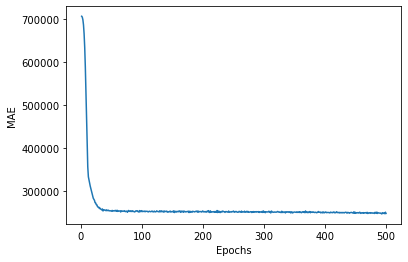

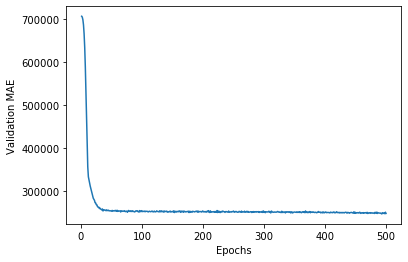

processing fold # 2
(786, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 123us/step - loss: 735092084191.4852 - mae: 707657.6875 - val_loss: 758359294285.5165 - val_mae: 722123.6250
Epoch 2/500
1181/1181 [==============================] - 0s 45us/step - loss: 732117739656.9957 - mae: 705738.3750 - val_loss: 752821744668.6616 - val_mae: 718488.1250
Epoch 3/500
1181/1181 [==============================] - 0s 41us/step - loss: 723334271152.8806 - mae: 700180.5000 - val_loss: 739380314987.4810 - val_mae: 709658.0000
Epoch 4/500
1181/1181 [==============================] - 0s 41us/step - loss: 705526758147.6851 - mae: 688725.7500 - val_loss: 716149985436.3359 - val_mae: 693998.6875
Epoch 5/500
1181/1181 [==============================] - 0s 40us/step - loss: 676264233644.9789 - mae: 669601.3125 - val_loss: 679701638261.2518 - val_mae: 668611.0000
Epoch 6/500
1181/1181 [==============================] - 0s 40us/step - loss: 63361

1181/1181 [==============================] - 0s 41us/step - loss: 146080220675.9018 - mae: 262514.1562 - val_loss: 168351816331.3995 - val_mae: 288096.9375
Epoch 50/500
1181/1181 [==============================] - 0s 41us/step - loss: 147022078957.7917 - mae: 262565.3750 - val_loss: 168733636696.5903 - val_mae: 288062.6875
Epoch 51/500
1181/1181 [==============================] - 0s 41us/step - loss: 145985031481.0093 - mae: 262099.1094 - val_loss: 168327036552.7939 - val_mae: 287824.5938
Epoch 52/500
1181/1181 [==============================] - 0s 41us/step - loss: 146027847978.2693 - mae: 261224.5625 - val_loss: 168509579660.0509 - val_mae: 290318.8438
Epoch 53/500
1181/1181 [==============================] - 0s 43us/step - loss: 146091205891.2515 - mae: 263530.0938 - val_loss: 167670415360.0000 - val_mae: 284843.6562
Epoch 54/500
1181/1181 [==============================] - 0s 42us/step - loss: 145895262837.4869 - mae: 260477.5000 - val_loss: 167771404168.1425 - val_mae: 289757.5312

1181/1181 [==============================] - 0s 41us/step - loss: 142688337240.2235 - mae: 261005.8125 - val_loss: 166052279470.5751 - val_mae: 287295.5000
Epoch 98/500
1181/1181 [==============================] - 0s 39us/step - loss: 142571552195.7392 - mae: 260741.6562 - val_loss: 166777643049.6896 - val_mae: 290959.8750
Epoch 99/500
1181/1181 [==============================] - 0s 41us/step - loss: 142911663687.5326 - mae: 261611.2188 - val_loss: 166102835137.4656 - val_mae: 289249.0625
Epoch 100/500
1181/1181 [==============================] - 0s 40us/step - loss: 142741383485.3446 - mae: 262103.5781 - val_loss: 166885783161.1603 - val_mae: 291009.4062
Epoch 101/500
1181/1181 [==============================] - 0s 40us/step - loss: 142722085796.9585 - mae: 261078.1094 - val_loss: 166549975550.6972 - val_mae: 290762.4688
Epoch 102/500
1181/1181 [==============================] - 0s 39us/step - loss: 142529010328.1693 - mae: 262993.0625 - val_loss: 165664488200.4682 - val_mae: 281966.4

1181/1181 [==============================] - 0s 40us/step - loss: 142368157456.6909 - mae: 260724.9375 - val_loss: 164529499961.9745 - val_mae: 282385.5000
Epoch 146/500
1181/1181 [==============================] - 0s 40us/step - loss: 142323777369.5241 - mae: 259827.8594 - val_loss: 164859678438.5954 - val_mae: 286274.0000
Epoch 147/500
1181/1181 [==============================] - 0s 38us/step - loss: 142228049888.7858 - mae: 259971.9844 - val_loss: 165571206063.2265 - val_mae: 290115.4062
Epoch 148/500
1181/1181 [==============================] - 0s 41us/step - loss: 142254743302.2862 - mae: 262094.2500 - val_loss: 165269489116.8244 - val_mae: 286591.1875
Epoch 149/500
1181/1181 [==============================] - 0s 41us/step - loss: 142092785194.0525 - mae: 260021.0000 - val_loss: 164920790529.3028 - val_mae: 285264.1250
Epoch 150/500
1181/1181 [==============================] - 0s 41us/step - loss: 142092588613.7985 - mae: 260559.0312 - val_loss: 164772172078.2494 - val_mae: 284971

1181/1181 [==============================] - 0s 43us/step - loss: 141443027523.1973 - mae: 259362.8438 - val_loss: 165814269998.9008 - val_mae: 287215.3438
Epoch 194/500
1181/1181 [==============================] - 0s 43us/step - loss: 141947726848.8671 - mae: 258788.9531 - val_loss: 165838943344.0407 - val_mae: 288964.1562
Epoch 195/500
1181/1181 [==============================] - 0s 45us/step - loss: 141601649843.4818 - mae: 261360.4688 - val_loss: 165564431175.0025 - val_mae: 285132.1562
Epoch 196/500
1181/1181 [==============================] - 0s 42us/step - loss: 141820478522.0931 - mae: 260277.3438 - val_loss: 165130277395.5420 - val_mae: 283749.7500
Epoch 197/500
1181/1181 [==============================] - 0s 41us/step - loss: 141728098482.6147 - mae: 259990.7656 - val_loss: 165200433120.7328 - val_mae: 282788.8438
Epoch 198/500
1181/1181 [==============================] - 0s 40us/step - loss: 141613896078.8484 - mae: 259655.6094 - val_loss: 165557085785.8931 - val_mae: 282584

1181/1181 [==============================] - 0s 40us/step - loss: 141526089006.6046 - mae: 259842.2188 - val_loss: 165709008260.2341 - val_mae: 286698.1250
Epoch 242/500
1181/1181 [==============================] - 0s 40us/step - loss: 141266915893.3243 - mae: 259630.0625 - val_loss: 166026094274.1170 - val_mae: 289625.6875
Epoch 243/500
1181/1181 [==============================] - 0s 38us/step - loss: 141476408265.3751 - mae: 260018.7188 - val_loss: 165697881272.9975 - val_mae: 288423.9688
Epoch 244/500
1181/1181 [==============================] - 0s 40us/step - loss: 141234087282.2354 - mae: 260841.8281 - val_loss: 166055864627.4606 - val_mae: 288983.7500
Epoch 245/500
1181/1181 [==============================] - 0s 41us/step - loss: 141495866339.3870 - mae: 261122.8125 - val_loss: 165342342323.7863 - val_mae: 285709.4688
Epoch 246/500
1181/1181 [==============================] - 0s 42us/step - loss: 141456004913.6393 - mae: 259913.9688 - val_loss: 165392441010.4835 - val_mae: 285268

1181/1181 [==============================] - 0s 40us/step - loss: 140760562962.8586 - mae: 260259.5469 - val_loss: 164814205438.6972 - val_mae: 282200.1875
Epoch 290/500
1181/1181 [==============================] - 0s 40us/step - loss: 141248093389.4937 - mae: 259055.6406 - val_loss: 164756844471.0432 - val_mae: 282082.2500
Epoch 291/500
1181/1181 [==============================] - 0s 41us/step - loss: 141493506578.6418 - mae: 260277.1406 - val_loss: 165026182547.8676 - val_mae: 281629.8125
Epoch 292/500
1181/1181 [==============================] - 0s 41us/step - loss: 141087123905.1380 - mae: 259208.7188 - val_loss: 164859294873.7303 - val_mae: 282674.8750
Epoch 293/500
1181/1181 [==============================] - 0s 38us/step - loss: 141101416656.0948 - mae: 259582.9219 - val_loss: 164804319966.7786 - val_mae: 280743.0625
Epoch 294/500
1181/1181 [==============================] - 0s 40us/step - loss: 140874122520.0610 - mae: 258993.7969 - val_loss: 164692583504.7735 - val_mae: 281656

1181/1181 [==============================] - 0s 41us/step - loss: 140400985298.6960 - mae: 257584.8281 - val_loss: 166160082772.0305 - val_mae: 292487.7812
Epoch 338/500
1181/1181 [==============================] - 0s 42us/step - loss: 140779440327.4242 - mae: 261577.0469 - val_loss: 164520070177.8728 - val_mae: 284276.2188
Epoch 339/500
1181/1181 [==============================] - 0s 42us/step - loss: 140690969335.5461 - mae: 259833.6094 - val_loss: 164254553992.1425 - val_mae: 283961.3125
Epoch 340/500
1181/1181 [==============================] - 0s 42us/step - loss: 140484389528.1693 - mae: 258204.3750 - val_loss: 164314026974.1272 - val_mae: 285475.5938
Epoch 341/500
1181/1181 [==============================] - 0s 45us/step - loss: 140453129563.6918 - mae: 259851.3281 - val_loss: 163676359818.0967 - val_mae: 281662.0625
Epoch 342/500
1181/1181 [==============================] - 0s 44us/step - loss: 140683433971.8611 - mae: 257920.8438 - val_loss: 164815117981.6387 - val_mae: 287987

1181/1181 [==============================] - 0s 41us/step - loss: 139312558319.3091 - mae: 259826.4531 - val_loss: 164808701394.4020 - val_mae: 277191.0312
Epoch 386/500
1181/1181 [==============================] - 0s 41us/step - loss: 140576781838.3065 - mae: 255854.8438 - val_loss: 163915366483.3791 - val_mae: 284333.7812
Epoch 387/500
1181/1181 [==============================] - 0s 42us/step - loss: 139881760301.5208 - mae: 258367.9531 - val_loss: 163553649578.0153 - val_mae: 283847.6562
Epoch 388/500
1181/1181 [==============================] - 0s 41us/step - loss: 139594672379.4479 - mae: 259506.8281 - val_loss: 163592848027.0331 - val_mae: 281704.9688
Epoch 389/500
1181/1181 [==============================] - 0s 40us/step - loss: 140256305256.0474 - mae: 257884.2344 - val_loss: 162932733915.5217 - val_mae: 281668.2188
Epoch 390/500
1181/1181 [==============================] - 0s 41us/step - loss: 139567557813.2159 - mae: 256491.1406 - val_loss: 165114081123.6641 - val_mae: 291188

1181/1181 [==============================] - 0s 41us/step - loss: 139421038781.0195 - mae: 258417.5625 - val_loss: 163368820881.9135 - val_mae: 285777.7500
Epoch 434/500
1181/1181 [==============================] - 0s 38us/step - loss: 139517858690.2760 - mae: 258590.5312 - val_loss: 163213995000.1832 - val_mae: 284471.4688
Epoch 435/500
1181/1181 [==============================] - 0s 43us/step - loss: 139277401022.9703 - mae: 258375.1562 - val_loss: 163054662497.0585 - val_mae: 282650.3125
Epoch 436/500
1181/1181 [==============================] - 0s 42us/step - loss: 139370153642.3776 - mae: 258022.6875 - val_loss: 163028158000.2036 - val_mae: 280442.4375
Epoch 437/500
1181/1181 [==============================] - 0s 42us/step - loss: 139148919456.8400 - mae: 257270.6250 - val_loss: 163022950598.0255 - val_mae: 281024.7500
Epoch 438/500
1181/1181 [==============================] - 0s 43us/step - loss: 139358266467.7121 - mae: 256224.9531 - val_loss: 163042091278.9822 - val_mae: 283014

1181/1181 [==============================] - 0s 42us/step - loss: 138432042586.6079 - mae: 255842.9844 - val_loss: 162964993678.0051 - val_mae: 284604.3438
Epoch 482/500
1181/1181 [==============================] - 0s 41us/step - loss: 138786744526.3607 - mae: 257481.0000 - val_loss: 162420122808.9975 - val_mae: 280679.0938
Epoch 483/500
1181/1181 [==============================] - 0s 40us/step - loss: 138444192481.0025 - mae: 256381.9688 - val_loss: 162474623809.7914 - val_mae: 281026.7188
Epoch 484/500
1181/1181 [==============================] - 0s 40us/step - loss: 138768207271.9932 - mae: 257092.1250 - val_loss: 162367796252.6616 - val_mae: 281371.8750
Epoch 485/500
1181/1181 [==============================] - 0s 40us/step - loss: 138270893821.6156 - mae: 256824.7969 - val_loss: 162080294698.3410 - val_mae: 281084.0938
Epoch 486/500
1181/1181 [==============================] - 0s 40us/step - loss: 138668343684.4437 - mae: 256876.6875 - val_loss: 162135784137.9338 - val_mae: 282203

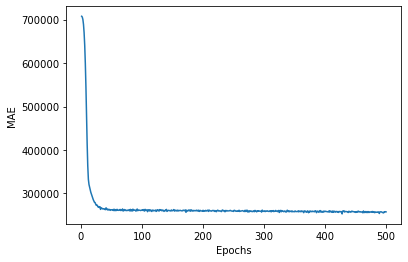

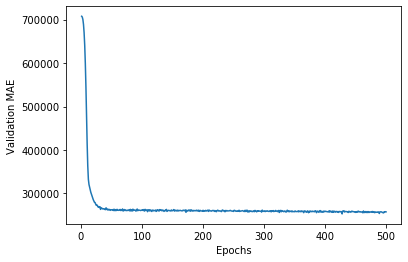

processing fold # 3
(1179, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 120us/step - loss: 769184871013.8798 - mae: 724639.6875 - val_loss: 655624044043.7252 - val_mae: 670883.1875
Epoch 2/500
1181/1181 [==============================] - 0s 41us/step - loss: 765612760803.6038 - mae: 722419.0625 - val_loss: 649584883800.5903 - val_mae: 666856.3125
Epoch 3/500
1181/1181 [==============================] - 0s 41us/step - loss: 755189965195.3801 - mae: 716045.6250 - val_loss: 635876783049.2825 - val_mae: 657666.3125
Epoch 4/500
1181/1181 [==============================] - 0s 42us/step - loss: 734763980649.1312 - mae: 703119.0625 - val_loss: 611692805393.5878 - val_mae: 641097.5625
Epoch 5/500
1181/1181 [==============================] - 0s 42us/step - loss: 700469907660.6266 - mae: 681698.6250 - val_loss: 572878957810.3206 - val_mae: 613552.1875
Epoch 6/500
1181/1181 [==============================] - 0s 41us/step - loss: 6505

1181/1181 [==============================] - 0s 42us/step - loss: 157523726776.4674 - mae: 274573.4062 - val_loss: 127000059091.0534 - val_mae: 251848.7188
Epoch 50/500
1181/1181 [==============================] - 0s 39us/step - loss: 156559603658.2422 - mae: 274237.6562 - val_loss: 127157794716.9873 - val_mae: 252616.1250
Epoch 51/500
1181/1181 [==============================] - 0s 43us/step - loss: 156489908196.2540 - mae: 274022.5938 - val_loss: 127748695871.1857 - val_mae: 254921.5469
Epoch 52/500
1181/1181 [==============================] - 0s 42us/step - loss: 156262734852.3353 - mae: 274720.7188 - val_loss: 128665937039.3079 - val_mae: 258072.6250
Epoch 53/500
1181/1181 [==============================] - 0s 41us/step - loss: 156608682623.8916 - mae: 275583.7500 - val_loss: 128473606201.3232 - val_mae: 256437.6562
Epoch 54/500
1181/1181 [==============================] - 0s 42us/step - loss: 156429563101.1008 - mae: 276871.2500 - val_loss: 127453842090.6667 - val_mae: 250972.7969

1181/1181 [==============================] - 0s 42us/step - loss: 153088160794.8789 - mae: 273809.9062 - val_loss: 164994331572.4377 - val_mae: 260997.2656
Epoch 98/500
1181/1181 [==============================] - 0s 41us/step - loss: 153147103594.4319 - mae: 272412.4688 - val_loss: 167495104058.6259 - val_mae: 263188.7812
Epoch 99/500
1181/1181 [==============================] - 0s 42us/step - loss: 152524329844.4030 - mae: 274348.7500 - val_loss: 166058206643.1349 - val_mae: 258110.7812
Epoch 100/500
1181/1181 [==============================] - 0s 40us/step - loss: 152668376377.0093 - mae: 271712.5000 - val_loss: 171574472526.8193 - val_mae: 264188.6875
Epoch 101/500
1181/1181 [==============================] - 0s 41us/step - loss: 152449721915.3937 - mae: 273727.0938 - val_loss: 174764767570.7277 - val_mae: 266927.3750
Epoch 102/500
1181/1181 [==============================] - 0s 39us/step - loss: 152800340229.8527 - mae: 274962.9062 - val_loss: 174319304370.4835 - val_mae: 262618.3

1181/1181 [==============================] - 0s 44us/step - loss: 151733125466.8247 - mae: 272493.5938 - val_loss: 339863337423.7964 - val_mae: 273871.7812
Epoch 146/500
1181/1181 [==============================] - 0s 42us/step - loss: 151071188927.8374 - mae: 272120.7500 - val_loss: 347225868783.0636 - val_mae: 274654.1250
Epoch 147/500
1181/1181 [==============================] - 0s 46us/step - loss: 150927320753.3141 - mae: 270782.6875 - val_loss: 368164050719.9186 - val_mae: 282574.0938
Epoch 148/500
1181/1181 [==============================] - 0s 45us/step - loss: 151362572617.4835 - mae: 274511.3750 - val_loss: 355749480609.5471 - val_mae: 273001.1875
Epoch 149/500
1181/1181 [==============================] - 0s 44us/step - loss: 151266371845.8527 - mae: 270234.4375 - val_loss: 370394013675.1552 - val_mae: 277034.5312
Epoch 150/500
1181/1181 [==============================] - 0s 43us/step - loss: 151074134489.4157 - mae: 272665.1562 - val_loss: 376306615564.3766 - val_mae: 276168

1181/1181 [==============================] - 0s 39us/step - loss: 149865374243.9831 - mae: 272138.8438 - val_loss: 736771683189.9033 - val_mae: 287414.2812
Epoch 194/500
1181/1181 [==============================] - 0s 41us/step - loss: 150286092223.8374 - mae: 269646.7188 - val_loss: 792574018015.4301 - val_mae: 295901.3125
Epoch 195/500
1181/1181 [==============================] - 0s 42us/step - loss: 150376654367.6478 - mae: 272836.2188 - val_loss: 774466109961.1196 - val_mae: 290289.5938
Epoch 196/500
1181/1181 [==============================] - 0s 43us/step - loss: 150380668010.6486 - mae: 271037.7812 - val_loss: 792650702472.7939 - val_mae: 291619.0938
Epoch 197/500
1181/1181 [==============================] - 0s 44us/step - loss: 150114485292.2202 - mae: 271827.3750 - val_loss: 794449059777.4657 - val_mae: 289903.0625
Epoch 198/500
1181/1181 [==============================] - 0s 44us/step - loss: 149943049775.2549 - mae: 270280.4688 - val_loss: 820804166882.6870 - val_mae: 292272

1181/1181 [==============================] - 0s 41us/step - loss: 149844541440.0000 - mae: 271834.4375 - val_loss: 1250711060521.6895 - val_mae: 305126.3750
Epoch 242/500
1181/1181 [==============================] - 0s 41us/step - loss: 149872483401.7003 - mae: 270503.5312 - val_loss: 1267799995670.7991 - val_mae: 306877.4375
Epoch 243/500
1181/1181 [==============================] - 0s 41us/step - loss: 149725707823.2549 - mae: 273309.5000 - val_loss: 1197982543215.3894 - val_mae: 298302.0312
Epoch 244/500
1181/1181 [==============================] - 0s 41us/step - loss: 149823474029.9001 - mae: 268841.3125 - val_loss: 1273426783411.7864 - val_mae: 306390.7500
Epoch 245/500
1181/1181 [==============================] - 0s 40us/step - loss: 149645141778.4250 - mae: 272736.5000 - val_loss: 1191623099222.6362 - val_mae: 297082.4062
Epoch 246/500
1181/1181 [==============================] - 0s 40us/step - loss: 150092474189.3853 - mae: 268995.9688 - val_loss: 1248527960725.8218 - val_mae: 

Epoch 289/500
1181/1181 [==============================] - 0s 41us/step - loss: 149739723003.4479 - mae: 271446.8750 - val_loss: 1250129441966.5750 - val_mae: 300260.6875
Epoch 290/500
1181/1181 [==============================] - 0s 42us/step - loss: 149978642086.9094 - mae: 268405.8750 - val_loss: 1286771155027.3792 - val_mae: 304155.7812
Epoch 291/500
1181/1181 [==============================] - 0s 42us/step - loss: 149524852205.3582 - mae: 270682.5938 - val_loss: 1246869840768.3257 - val_mae: 299865.3438
Epoch 292/500
1181/1181 [==============================] - 0s 44us/step - loss: 149886221309.3988 - mae: 269238.7188 - val_loss: 1276979403882.8296 - val_mae: 302634.0625
Epoch 293/500
1181/1181 [==============================] - 0s 44us/step - loss: 149672039208.1016 - mae: 269770.9062 - val_loss: 1284288859315.7864 - val_mae: 303505.4375
Epoch 294/500
1181/1181 [==============================] - 0s 44us/step - loss: 149476128762.7976 - mae: 270553.8750 - val_loss: 1279568598982.67

Epoch 337/500
1181/1181 [==============================] - 0s 40us/step - loss: 149472308197.1211 - mae: 270581.0000 - val_loss: 1251119766176.2444 - val_mae: 301951.4375
Epoch 338/500
1181/1181 [==============================] - 0s 39us/step - loss: 149044556875.4344 - mae: 269079.4688 - val_loss: 1286041420317.9644 - val_mae: 305863.8750
Epoch 339/500
1181/1181 [==============================] - 0s 40us/step - loss: 149803213126.0152 - mae: 271543.0000 - val_loss: 1270532318267.9287 - val_mae: 303949.2188
Epoch 340/500
1181/1181 [==============================] - 0s 41us/step - loss: 149801306665.1854 - mae: 270389.0625 - val_loss: 1280668519478.7173 - val_mae: 305477.4062
Epoch 341/500
1181/1181 [==============================] - 0s 42us/step - loss: 149437816464.3658 - mae: 270444.4375 - val_loss: 1297603267492.8040 - val_mae: 307701.0000
Epoch 342/500
1181/1181 [==============================] - 0s 41us/step - loss: 149631758394.9602 - mae: 271442.9688 - val_loss: 1261861561403.92

Epoch 385/500
1181/1181 [==============================] - 0s 40us/step - loss: 149017183081.9983 - mae: 270768.1562 - val_loss: 1277942313533.2314 - val_mae: 306222.2812
Epoch 386/500
1181/1181 [==============================] - 0s 42us/step - loss: 148924906576.6367 - mae: 269992.0000 - val_loss: 1282773484478.8601 - val_mae: 306912.3438
Epoch 387/500
1181/1181 [==============================] - 0s 40us/step - loss: 149355063561.3209 - mae: 270630.0312 - val_loss: 1242667959001.5674 - val_mae: 301786.8438
Epoch 388/500
1181/1181 [==============================] - 0s 40us/step - loss: 148928041608.5623 - mae: 269612.6250 - val_loss: 1214667603863.7761 - val_mae: 299206.8750
Epoch 389/500
1181/1181 [==============================] - 0s 40us/step - loss: 149561035048.5352 - mae: 269840.0312 - val_loss: 1266349100086.7173 - val_mae: 305117.3125
Epoch 390/500
1181/1181 [==============================] - 0s 39us/step - loss: 148957284426.5673 - mae: 271024.0625 - val_loss: 1255356087986.48

Epoch 433/500
1181/1181 [==============================] - 0s 42us/step - loss: 148164003137.6799 - mae: 267491.5312 - val_loss: 1244875201621.9846 - val_mae: 303938.0312
Epoch 434/500
1181/1181 [==============================] - 0s 42us/step - loss: 148039228822.6520 - mae: 268305.1250 - val_loss: 1271271396985.1604 - val_mae: 306869.5625
Epoch 435/500
1181/1181 [==============================] - 0s 41us/step - loss: 148122985703.5055 - mae: 270299.1875 - val_loss: 1242894991964.4985 - val_mae: 302184.7188
Epoch 436/500
1181/1181 [==============================] - 0s 41us/step - loss: 148236545732.3895 - mae: 269689.3125 - val_loss: 1206057896076.7024 - val_mae: 298962.7500
Epoch 437/500
1181/1181 [==============================] - 0s 41us/step - loss: 148600067390.2117 - mae: 268453.7812 - val_loss: 1230622920234.9924 - val_mae: 301546.0625
Epoch 438/500
1181/1181 [==============================] - 0s 40us/step - loss: 148021628910.6588 - mae: 268894.4062 - val_loss: 1231512113329.18

Epoch 481/500
1181/1181 [==============================] - 0s 39us/step - loss: 146394673516.1660 - mae: 268309.8125 - val_loss: 1242831989918.9412 - val_mae: 303101.6250
Epoch 482/500
1181/1181 [==============================] - 0s 40us/step - loss: 146208084457.0229 - mae: 269247.2812 - val_loss: 1213170361299.7048 - val_mae: 299455.0625
Epoch 483/500
1181/1181 [==============================] - 0s 41us/step - loss: 146173245476.4166 - mae: 267245.3438 - val_loss: 1218046843343.7964 - val_mae: 299895.2812
Epoch 484/500
1181/1181 [==============================] - 0s 41us/step - loss: 146325651414.3810 - mae: 267780.5000 - val_loss: 1199631769787.6030 - val_mae: 298391.9062
Epoch 485/500
1181/1181 [==============================] - 0s 40us/step - loss: 145662498900.9720 - mae: 265995.3125 - val_loss: 1261482039030.2290 - val_mae: 306622.3438
Epoch 486/500
1181/1181 [==============================] - 0s 41us/step - loss: 145927149694.5910 - mae: 268779.6875 - val_loss: 1237495583960.26

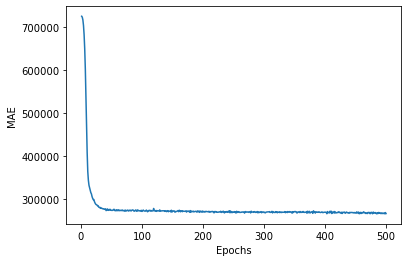

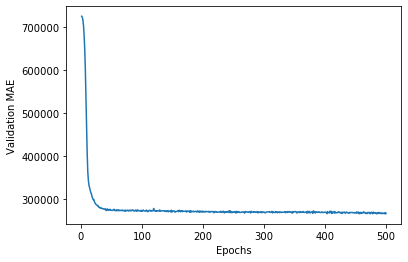

In [12]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=64, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    all_mae_histories.append(val_mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
(0, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 158us/step - loss: 723237060177.9373 - mae: 704358.7500 - val_loss: 784014162508.8651 - val_mae: 725911.1875
Epoch 2/500
1181/1181 [==============================] - 0s 78us/step - loss: 705533646253.1956 - mae: 692873.1250 - val_loss: 749190972726.0662 - val_mae: 704598.8125
Epoch 3/500
1181/1181 [==============================] - 0s 78us/step - loss: 652471436318.3472 - mae: 656592.6250 - val_loss: 665587756274.3206 - val_mae: 650487.8750
Epoch 4/500
1181/1181 [==============================] - 0s 78us/step - loss: 548493113963.0822 - mae: 579949.3750 - val_loss: 526223148342.0662 - val_mae: 549067.6250
Epoch 5/500
1181/1181 [==============================] - 0s 80us/step - loss: 410658406594.2219 - mae: 463996.2188 - val_loss: 366333473487.1450 - val_mae: 422515.7500
Epoch 6/500
1181/1181 [==============================] - 0s 79us/step - loss: 2943466

1181/1181 [==============================] - 0s 78us/step - loss: 151729242583.6816 - mae: 266838.7812 - val_loss: 147747085377.1400 - val_mae: 261700.0469
Epoch 50/500
1181/1181 [==============================] - 0s 76us/step - loss: 151295840807.4513 - mae: 266318.5312 - val_loss: 149104402411.1552 - val_mae: 261784.3906
Epoch 51/500
1181/1181 [==============================] - 0s 77us/step - loss: 150509811727.6071 - mae: 264433.6250 - val_loss: 146879408998.2697 - val_mae: 264835.2812
Epoch 52/500
1181/1181 [==============================] - 0s 77us/step - loss: 150585042304.1084 - mae: 266559.0312 - val_loss: 147380716374.6361 - val_mae: 263723.3438
Epoch 53/500
1181/1181 [==============================] - 0s 76us/step - loss: 151747461452.9517 - mae: 267695.3125 - val_loss: 148612462847.3486 - val_mae: 261254.7031
Epoch 54/500
1181/1181 [==============================] - 0s 76us/step - loss: 151118090250.4048 - mae: 264388.7500 - val_loss: 147622888403.7048 - val_mae: 262580.3438

1181/1181 [==============================] - 0s 77us/step - loss: 150701987203.5766 - mae: 266889.4688 - val_loss: 148865583432.3053 - val_mae: 260073.6094
Epoch 98/500
1181/1181 [==============================] - 0s 79us/step - loss: 149426981146.6621 - mae: 262084.6562 - val_loss: 145924458803.4606 - val_mae: 265153.2500
Epoch 99/500
1181/1181 [==============================] - 0s 80us/step - loss: 150409130639.4987 - mae: 266497.6562 - val_loss: 145854302682.2188 - val_mae: 265196.5938
Epoch 100/500
1181/1181 [==============================] - 0s 78us/step - loss: 150838342773.0533 - mae: 266423.2188 - val_loss: 146766396856.3461 - val_mae: 261764.3750
Epoch 101/500
1181/1181 [==============================] - 0s 80us/step - loss: 150113071842.7367 - mae: 265218.9688 - val_loss: 148099093324.2137 - val_mae: 260552.5156
Epoch 102/500
1181/1181 [==============================] - 0s 76us/step - loss: 149994612373.5681 - mae: 263663.1875 - val_loss: 147017683725.6794 - val_mae: 262467.1

1181/1181 [==============================] - 0s 75us/step - loss: 149597752050.3438 - mae: 264312.9062 - val_loss: 147311548650.5038 - val_mae: 261208.3281
Epoch 146/500
1181/1181 [==============================] - 0s 76us/step - loss: 150384513859.8476 - mae: 265254.8750 - val_loss: 147890390096.7735 - val_mae: 260627.2812
Epoch 147/500
1181/1181 [==============================] - 0s 78us/step - loss: 150281126796.6808 - mae: 263924.4062 - val_loss: 147932020986.1374 - val_mae: 260726.7969
Epoch 148/500
1181/1181 [==============================] - 0s 77us/step - loss: 150482326499.3870 - mae: 265498.0312 - val_loss: 147260429069.6794 - val_mae: 260933.6562
Epoch 149/500
1181/1181 [==============================] - 0s 77us/step - loss: 150193739569.6393 - mae: 262616.6875 - val_loss: 145739689911.0432 - val_mae: 263206.6250
Epoch 150/500
1181/1181 [==============================] - 0s 79us/step - loss: 149549203546.1744 - mae: 265545.9062 - val_loss: 146493526985.2824 - val_mae: 261611

1181/1181 [==============================] - 0s 77us/step - loss: 149583483903.1329 - mae: 263387.9062 - val_loss: 145618878067.9491 - val_mae: 261807.5938
Epoch 194/500
1181/1181 [==============================] - 0s 81us/step - loss: 149505747850.9467 - mae: 263161.6562 - val_loss: 144758028605.8830 - val_mae: 264224.0000
Epoch 195/500
1181/1181 [==============================] - 0s 75us/step - loss: 149719611941.7172 - mae: 265667.1250 - val_loss: 145665763072.6514 - val_mae: 261536.9531
Epoch 196/500
1181/1181 [==============================] - 0s 79us/step - loss: 150151766126.9839 - mae: 265797.3750 - val_loss: 146374710655.0229 - val_mae: 260470.8750
Epoch 197/500
1181/1181 [==============================] - 0s 80us/step - loss: 149861373586.0999 - mae: 263617.5938 - val_loss: 146196185629.9644 - val_mae: 260630.1094
Epoch 198/500
1181/1181 [==============================] - 0s 81us/step - loss: 149438135723.4615 - mae: 263816.0312 - val_loss: 146926850975.5929 - val_mae: 260777

1181/1181 [==============================] - 0s 78us/step - loss: 150167722346.4319 - mae: 262009.5312 - val_loss: 145859945656.9975 - val_mae: 259931.5781
Epoch 242/500
1181/1181 [==============================] - 0s 77us/step - loss: 150490642829.1143 - mae: 263942.6562 - val_loss: 146298322464.5700 - val_mae: 259886.7656
Epoch 243/500
1181/1181 [==============================] - 0s 76us/step - loss: 150512581587.7798 - mae: 263727.9688 - val_loss: 145862722140.4987 - val_mae: 259925.8438
Epoch 244/500
1181/1181 [==============================] - 0s 79us/step - loss: 149838539957.2159 - mae: 262556.4062 - val_loss: 144017053847.1247 - val_mae: 262067.5625
Epoch 245/500
1181/1181 [==============================] - 0s 78us/step - loss: 150459887036.8027 - mae: 263708.9375 - val_loss: 145031049226.4224 - val_mae: 260594.0000
Epoch 246/500
1181/1181 [==============================] - 0s 78us/step - loss: 151098616916.1050 - mae: 267195.7188 - val_loss: 146908613144.7532 - val_mae: 259222

1181/1181 [==============================] - 0s 76us/step - loss: 150377524210.9940 - mae: 263909.5938 - val_loss: 143539600574.2086 - val_mae: 261465.1562
Epoch 290/500
1181/1181 [==============================] - 0s 76us/step - loss: 149549479257.9577 - mae: 264302.7500 - val_loss: 144810500429.5165 - val_mae: 260662.5156
Epoch 291/500
1181/1181 [==============================] - 0s 76us/step - loss: 149870986915.4411 - mae: 266100.6562 - val_loss: 147794662241.0585 - val_mae: 258797.1719
Epoch 292/500
1181/1181 [==============================] - 0s 78us/step - loss: 149599811329.0838 - mae: 260568.0938 - val_loss: 143125372552.7939 - val_mae: 262369.8438
Epoch 293/500
1181/1181 [==============================] - 0s 76us/step - loss: 149984409504.6232 - mae: 264666.0938 - val_loss: 144294103764.3562 - val_mae: 261349.0312
Epoch 294/500
1181/1181 [==============================] - 0s 78us/step - loss: 150680050539.7325 - mae: 264151.2188 - val_loss: 143727444822.6361 - val_mae: 261123

1181/1181 [==============================] - 0s 76us/step - loss: 149953822151.2075 - mae: 263351.4375 - val_loss: 144057461314.4427 - val_mae: 260738.2188
Epoch 338/500
1181/1181 [==============================] - 0s 78us/step - loss: 149549840788.0508 - mae: 263779.0938 - val_loss: 144804130076.0102 - val_mae: 260064.0625
Epoch 339/500
1181/1181 [==============================] - 0s 75us/step - loss: 149897622145.6258 - mae: 263381.8438 - val_loss: 143897615696.1221 - val_mae: 260462.6406
Epoch 340/500
1181/1181 [==============================] - 0s 78us/step - loss: 149525802851.9289 - mae: 262646.4688 - val_loss: 143163109073.7506 - val_mae: 261682.7500
Epoch 341/500
1181/1181 [==============================] - 0s 77us/step - loss: 149327296971.5428 - mae: 263976.6562 - val_loss: 144233004388.9669 - val_mae: 260431.8750
Epoch 342/500
1181/1181 [==============================] - 0s 77us/step - loss: 149271821808.8264 - mae: 264259.8438 - val_loss: 145206331407.6336 - val_mae: 259903

1181/1181 [==============================] - 0s 75us/step - loss: 150576151115.8679 - mae: 264457.4062 - val_loss: 144771214536.6310 - val_mae: 258935.1719
Epoch 386/500
1181/1181 [==============================] - 0s 77us/step - loss: 149423086610.2083 - mae: 262699.5625 - val_loss: 144893351024.0407 - val_mae: 259303.8906
Epoch 387/500
1181/1181 [==============================] - 0s 77us/step - loss: 149759083300.6334 - mae: 262346.3125 - val_loss: 144483584745.2010 - val_mae: 259843.7812
Epoch 388/500
1181/1181 [==============================] - 0s 75us/step - loss: 150054421062.6656 - mae: 261685.7031 - val_loss: 142733867034.0560 - val_mae: 260961.6094
Epoch 389/500
1181/1181 [==============================] - 0s 79us/step - loss: 150089303812.5521 - mae: 264525.3438 - val_loss: 144704783378.2392 - val_mae: 259287.5781
Epoch 390/500
1181/1181 [==============================] - 0s 79us/step - loss: 149542110203.6647 - mae: 262638.9688 - val_loss: 142703776942.5751 - val_mae: 261418

1181/1181 [==============================] - 0s 77us/step - loss: 148577140139.4615 - mae: 266182.3750 - val_loss: 143938342880.7328 - val_mae: 260002.5781
Epoch 434/500
1181/1181 [==============================] - 0s 78us/step - loss: 148288890704.8535 - mae: 263837.9375 - val_loss: 142607335382.3104 - val_mae: 261129.5469
Epoch 435/500
1181/1181 [==============================] - 0s 79us/step - loss: 147845634916.7960 - mae: 264118.0312 - val_loss: 143373938177.3028 - val_mae: 260121.1562
Epoch 436/500
1181/1181 [==============================] - 0s 75us/step - loss: 147540378904.0610 - mae: 262420.6875 - val_loss: 142187060601.8117 - val_mae: 261931.2969
Epoch 437/500
1181/1181 [==============================] - 0s 78us/step - loss: 147989218292.7282 - mae: 265081.6250 - val_loss: 144034030172.4987 - val_mae: 259797.8438
Epoch 438/500
1181/1181 [==============================] - 0s 78us/step - loss: 148103833986.7096 - mae: 262299.6250 - val_loss: 142901275535.9593 - val_mae: 260610

1181/1181 [==============================] - 0s 76us/step - loss: 145606858184.9416 - mae: 260681.7344 - val_loss: 141942824939.1552 - val_mae: 258975.4375
Epoch 482/500
1181/1181 [==============================] - 0s 75us/step - loss: 145504089031.6410 - mae: 261127.5625 - val_loss: 141929185926.1883 - val_mae: 258643.4219
Epoch 483/500
1181/1181 [==============================] - 0s 76us/step - loss: 144635739757.6833 - mae: 261064.4219 - val_loss: 140841639018.8295 - val_mae: 259817.2812
Epoch 484/500
1181/1181 [==============================] - 0s 77us/step - loss: 145740494870.5436 - mae: 264370.7812 - val_loss: 142034030456.5089 - val_mae: 258834.7500
Epoch 485/500
1181/1181 [==============================] - 0s 76us/step - loss: 144282563673.3074 - mae: 261101.0625 - val_loss: 143405495303.8168 - val_mae: 258058.6094
Epoch 486/500
1181/1181 [==============================] - 0s 78us/step - loss: 143850934878.9433 - mae: 259509.2500 - val_loss: 140167091207.8168 - val_mae: 262422

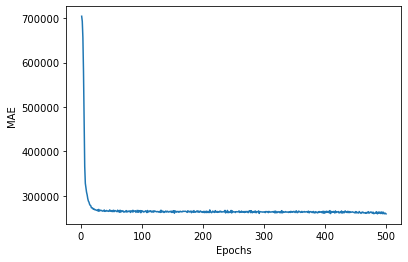

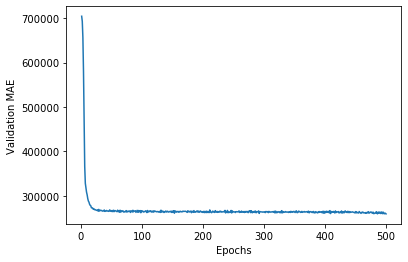

processing fold # 1
(393, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 157us/step - loss: 732985349341.1007 - mae: 706616.5000 - val_loss: 753928977806.6565 - val_mae: 718636.4375
Epoch 2/500
1181/1181 [==============================] - 0s 78us/step - loss: 715196524916.8365 - mae: 694777.2500 - val_loss: 718941737158.0253 - val_mae: 696766.4375
Epoch 3/500
1181/1181 [==============================] - 0s 78us/step - loss: 656289805567.7833 - mae: 656242.8125 - val_loss: 628760618856.8754 - val_mae: 638626.3750
Epoch 4/500
1181/1181 [==============================] - 0s 78us/step - loss: 543948273381.3378 - mae: 572577.6875 - val_loss: 489197957630.6972 - val_mae: 532640.0625
Epoch 5/500
1181/1181 [==============================] - 0s 76us/step - loss: 392298554280.4268 - mae: 448731.3125 - val_loss: 349239051907.5827 - val_mae: 402340.7500
Epoch 6/500
1181/1181 [==============================] - 0s 78us/step - loss: 26575

1181/1181 [==============================] - 0s 81us/step - loss: 131755263498.8383 - mae: 252385.7031 - val_loss: 522372797114.3002 - val_mae: 294239.5625
Epoch 50/500
1181/1181 [==============================] - 0s 79us/step - loss: 131857557224.8061 - mae: 253322.0469 - val_loss: 529521263404.9466 - val_mae: 297041.2500
Epoch 51/500
1181/1181 [==============================] - 0s 78us/step - loss: 131992547740.7214 - mae: 253402.2031 - val_loss: 527008698399.2672 - val_mae: 295174.0000
Epoch 52/500
1181/1181 [==============================] - 0s 79us/step - loss: 131863100912.8264 - mae: 253398.5781 - val_loss: 533594998215.9796 - val_mae: 295921.9688
Epoch 53/500
1181/1181 [==============================] - 0s 77us/step - loss: 131772782024.9416 - mae: 252695.7344 - val_loss: 517179128230.1069 - val_mae: 293042.0000
Epoch 54/500
1181/1181 [==============================] - 0s 78us/step - loss: 131890804231.3700 - mae: 253091.9531 - val_loss: 510133330420.2748 - val_mae: 290964.0000

1181/1181 [==============================] - 0s 78us/step - loss: 131355953490.1541 - mae: 252858.7500 - val_loss: 531718964346.4631 - val_mae: 291568.0312
Epoch 98/500
1181/1181 [==============================] - 0s 77us/step - loss: 131263983730.4522 - mae: 251714.1875 - val_loss: 531942245310.8600 - val_mae: 292692.7188
Epoch 99/500
1181/1181 [==============================] - 0s 79us/step - loss: 131344857186.8450 - mae: 251992.9219 - val_loss: 534858439328.2443 - val_mae: 292721.7188
Epoch 100/500
1181/1181 [==============================] - 0s 81us/step - loss: 131391928647.7494 - mae: 252031.7031 - val_loss: 549558599304.7939 - val_mae: 295413.4688
Epoch 101/500
1181/1181 [==============================] - 0s 76us/step - loss: 130812082254.0356 - mae: 251199.0000 - val_loss: 562305803699.1349 - val_mae: 299523.7188
Epoch 102/500
1181/1181 [==============================] - 0s 76us/step - loss: 131335113680.3116 - mae: 253394.0938 - val_loss: 536009464438.5547 - val_mae: 291891.0

1181/1181 [==============================] - 0s 80us/step - loss: 130974539893.9204 - mae: 252548.0156 - val_loss: 552873674871.8575 - val_mae: 293727.0312
Epoch 146/500
1181/1181 [==============================] - 0s 75us/step - loss: 130650358946.1405 - mae: 252176.2500 - val_loss: 534975910482.0764 - val_mae: 289629.8750
Epoch 147/500
1181/1181 [==============================] - 0s 78us/step - loss: 130565675210.8925 - mae: 251330.4375 - val_loss: 537164315650.6056 - val_mae: 291288.0938
Epoch 148/500
1181/1181 [==============================] - 0s 79us/step - loss: 130846128684.6537 - mae: 251709.9375 - val_loss: 526662245649.5878 - val_mae: 287978.1875
Epoch 149/500
1181/1181 [==============================] - 0s 78us/step - loss: 130224166143.7832 - mae: 251350.8125 - val_loss: 514075785262.9008 - val_mae: 286603.5312
Epoch 150/500
1181/1181 [==============================] - 0s 80us/step - loss: 130808358660.5521 - mae: 250815.6250 - val_loss: 521164198648.8346 - val_mae: 288170

1181/1181 [==============================] - 0s 76us/step - loss: 130877845486.6588 - mae: 251738.9062 - val_loss: 537534140739.0942 - val_mae: 290150.8125
Epoch 194/500
1181/1181 [==============================] - 0s 79us/step - loss: 130412638003.3734 - mae: 250959.9844 - val_loss: 557778173034.8295 - val_mae: 294217.2812
Epoch 195/500
1181/1181 [==============================] - 0s 81us/step - loss: 130455576333.2227 - mae: 251866.3906 - val_loss: 546209388069.7812 - val_mae: 292057.1562
Epoch 196/500
1181/1181 [==============================] - 0s 79us/step - loss: 130322545425.5580 - mae: 251786.1406 - val_loss: 529950214243.0126 - val_mae: 288175.7188
Epoch 197/500
1181/1181 [==============================] - 0s 77us/step - loss: 130608406479.4445 - mae: 250296.4062 - val_loss: 555397123335.1654 - val_mae: 293079.9375
Epoch 198/500
1181/1181 [==============================] - 0s 78us/step - loss: 129911996998.6655 - mae: 250263.0625 - val_loss: 575012350551.2875 - val_mae: 298305

1181/1181 [==============================] - 0s 77us/step - loss: 129644336876.2744 - mae: 251152.0625 - val_loss: 526843922426.7888 - val_mae: 285235.8125
Epoch 242/500
1181/1181 [==============================] - 0s 75us/step - loss: 130225265730.7638 - mae: 249131.7656 - val_loss: 570556137096.7939 - val_mae: 295339.6562
Epoch 243/500
1181/1181 [==============================] - 0s 77us/step - loss: 130057680016.7993 - mae: 252210.3438 - val_loss: 536620649901.9236 - val_mae: 287168.6562
Epoch 244/500
1181/1181 [==============================] - 0s 77us/step - loss: 130081763983.4987 - mae: 250664.8906 - val_loss: 563736874622.3715 - val_mae: 292214.0312
Epoch 245/500
1181/1181 [==============================] - 0s 76us/step - loss: 130005163650.4928 - mae: 250220.8750 - val_loss: 568885785878.7990 - val_mae: 293938.4688
Epoch 246/500
1181/1181 [==============================] - 0s 79us/step - loss: 130225894655.7832 - mae: 250439.2344 - val_loss: 565853384505.9746 - val_mae: 293452

1181/1181 [==============================] - 0s 76us/step - loss: 129428388722.6689 - mae: 250535.2656 - val_loss: 574648241206.7175 - val_mae: 292999.0312
Epoch 290/500
1181/1181 [==============================] - 0s 75us/step - loss: 129433565393.8289 - mae: 252372.8438 - val_loss: 531754495801.9745 - val_mae: 284581.2188
Epoch 291/500
1181/1181 [==============================] - 0s 81us/step - loss: 129650384209.2870 - mae: 248233.1875 - val_loss: 561257440774.5140 - val_mae: 291514.3750
Epoch 292/500
1181/1181 [==============================] - 0s 81us/step - loss: 129251688753.2058 - mae: 250096.5312 - val_loss: 574167422751.9186 - val_mae: 294583.7500
Epoch 293/500
1181/1181 [==============================] - 0s 79us/step - loss: 129420197104.1761 - mae: 251473.9688 - val_loss: 542194266310.0255 - val_mae: 286840.5625
Epoch 294/500
1181/1181 [==============================] - 0s 81us/step - loss: 129359672228.9585 - mae: 248527.0625 - val_loss: 568301334163.2163 - val_mae: 291909

1181/1181 [==============================] - 0s 78us/step - loss: 128697390425.9577 - mae: 249549.2031 - val_loss: 573516388398.9008 - val_mae: 289466.1250
Epoch 338/500
1181/1181 [==============================] - 0s 76us/step - loss: 128038401196.5453 - mae: 247124.1875 - val_loss: 628497279262.6157 - val_mae: 302274.6875
Epoch 339/500
1181/1181 [==============================] - 0s 76us/step - loss: 128833708815.8239 - mae: 251786.8906 - val_loss: 564464353947.0331 - val_mae: 287105.0312
Epoch 340/500
1181/1181 [==============================] - 0s 81us/step - loss: 128651406503.3429 - mae: 248623.0156 - val_loss: 588458044533.2520 - val_mae: 292248.4688
Epoch 341/500
1181/1181 [==============================] - 0s 79us/step - loss: 128551495927.9797 - mae: 249652.0312 - val_loss: 572895763500.2952 - val_mae: 289188.4688
Epoch 342/500
1181/1181 [==============================] - 0s 79us/step - loss: 128503911964.1795 - mae: 249224.7188 - val_loss: 593862497475.4198 - val_mae: 294190

1181/1181 [==============================] - 0s 81us/step - loss: 127051165255.5326 - mae: 247702.8438 - val_loss: 581642170962.0763 - val_mae: 288233.5625
Epoch 386/500
1181/1181 [==============================] - 0s 82us/step - loss: 126972346402.6825 - mae: 247973.5469 - val_loss: 599046542802.4020 - val_mae: 292496.5938
Epoch 387/500
1181/1181 [==============================] - 0s 82us/step - loss: 126815677246.6452 - mae: 248531.0781 - val_loss: 594311735832.7532 - val_mae: 291064.5625
Epoch 388/500
1181/1181 [==============================] - 0s 84us/step - loss: 126497386041.6596 - mae: 247666.9062 - val_loss: 626767084338.1577 - val_mae: 298445.3125
Epoch 389/500
1181/1181 [==============================] - 0s 81us/step - loss: 126740910104.2777 - mae: 248976.9375 - val_loss: 594790157074.8906 - val_mae: 289629.9688
Epoch 390/500
1181/1181 [==============================] - 0s 78us/step - loss: 126446250842.3912 - mae: 248322.6562 - val_loss: 576004306615.6947 - val_mae: 287246

1181/1181 [==============================] - 0s 80us/step - loss: 124684718284.6266 - mae: 247688.7812 - val_loss: 619643685359.0636 - val_mae: 286516.4062
Epoch 434/500
1181/1181 [==============================] - 0s 81us/step - loss: 123635909669.2836 - mae: 243845.9375 - val_loss: 664700880995.0127 - val_mae: 296898.5000
Epoch 435/500
1181/1181 [==============================] - 0s 75us/step - loss: 124657101006.3607 - mae: 246987.4375 - val_loss: 644376499437.1094 - val_mae: 291949.6875
Epoch 436/500
1181/1181 [==============================] - 0s 79us/step - loss: 124440391655.7223 - mae: 246432.7656 - val_loss: 641996952291.9899 - val_mae: 291114.8438
Epoch 437/500
1181/1181 [==============================] - 0s 81us/step - loss: 124414035019.4344 - mae: 246084.1406 - val_loss: 638957678873.4045 - val_mae: 290532.1562
Epoch 438/500
1181/1181 [==============================] - 0s 78us/step - loss: 124137228078.1711 - mae: 246696.1094 - val_loss: 635811493434.6260 - val_mae: 288966

Epoch 481/500
1181/1181 [==============================] - 0s 78us/step - loss: 121484003416.4403 - mae: 243599.7188 - val_loss: 694021896864.2443 - val_mae: 294460.7812
Epoch 482/500
1181/1181 [==============================] - 0s 80us/step - loss: 122146407010.4115 - mae: 245351.4219 - val_loss: 677963217943.4504 - val_mae: 290298.0000
Epoch 483/500
1181/1181 [==============================] - 0s 75us/step - loss: 121628099440.9348 - mae: 245138.2031 - val_loss: 685649640575.6743 - val_mae: 292255.8438
Epoch 484/500
1181/1181 [==============================] - 0s 79us/step - loss: 121765305403.8273 - mae: 244811.9531 - val_loss: 658114430783.1858 - val_mae: 287412.2812
Epoch 485/500
1181/1181 [==============================] - 0s 78us/step - loss: 121539603397.9069 - mae: 244777.3750 - val_loss: 659617789165.1094 - val_mae: 286151.7188
Epoch 486/500
1181/1181 [==============================] - 0s 76us/step - loss: 121580815522.1405 - mae: 243424.1562 - val_loss: 707427719298.2799 - v

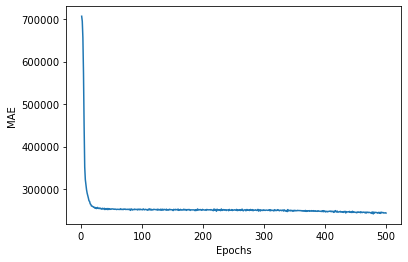

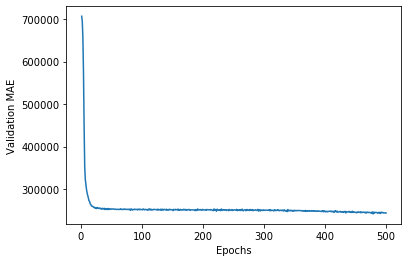

processing fold # 2
(786, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 154us/step - loss: 733668331183.5801 - mae: 706828.3750 - val_loss: 753302383024.5294 - val_mae: 718903.6250
Epoch 2/500
1181/1181 [==============================] - 0s 82us/step - loss: 716607002861.5750 - mae: 696345.3125 - val_loss: 720923775757.6794 - val_mae: 697963.3750
Epoch 3/500
1181/1181 [==============================] - 0s 78us/step - loss: 664494373718.9230 - mae: 662734.5625 - val_loss: 643092726218.5852 - val_mae: 644292.3750
Epoch 4/500
1181/1181 [==============================] - 0s 78us/step - loss: 559574732435.8340 - mae: 589845.0000 - val_loss: 514908632843.0738 - val_mae: 543828.2500
Epoch 5/500
1181/1181 [==============================] - 0s 77us/step - loss: 417071822787.3057 - mae: 474183.5938 - val_loss: 368871091734.1476 - val_mae: 421996.2812
Epoch 6/500
1181/1181 [==============================] - 0s 81us/step - loss: 29232

1181/1181 [==============================] - 0s 82us/step - loss: 148079524140.0034 - mae: 261485.5000 - val_loss: 167162045791.7557 - val_mae: 286585.1875
Epoch 50/500
1181/1181 [==============================] - 0s 82us/step - loss: 147463565776.7451 - mae: 259226.2344 - val_loss: 166802145988.7227 - val_mae: 286732.2188
Epoch 51/500
1181/1181 [==============================] - 0s 84us/step - loss: 148777719032.8467 - mae: 260538.4531 - val_loss: 166661745051.6845 - val_mae: 285727.5000
Epoch 52/500
1181/1181 [==============================] - 0s 85us/step - loss: 147586642839.0855 - mae: 259000.0000 - val_loss: 167584485636.5598 - val_mae: 289892.5312
Epoch 53/500
1181/1181 [==============================] - 0s 76us/step - loss: 148279614731.9221 - mae: 261209.3906 - val_loss: 166366421158.7583 - val_mae: 284820.6875
Epoch 54/500
1181/1181 [==============================] - 0s 77us/step - loss: 147960011697.0974 - mae: 259342.4688 - val_loss: 166940930496.1628 - val_mae: 286772.6562

1181/1181 [==============================] - 0s 84us/step - loss: 145289510329.3344 - mae: 258511.8750 - val_loss: 166952366632.3868 - val_mae: 288520.6250
Epoch 98/500
1181/1181 [==============================] - 0s 81us/step - loss: 145885528369.2057 - mae: 260852.2344 - val_loss: 166508975737.1603 - val_mae: 280884.6562
Epoch 99/500
1181/1181 [==============================] - 0s 80us/step - loss: 146119542317.5208 - mae: 257749.1094 - val_loss: 166331810125.5165 - val_mae: 285571.5625
Epoch 100/500
1181/1181 [==============================] - 0s 82us/step - loss: 146004630657.1922 - mae: 259642.2344 - val_loss: 166141498375.8168 - val_mae: 283994.3750
Epoch 101/500
1181/1181 [==============================] - 0s 80us/step - loss: 145320318734.9568 - mae: 258843.4531 - val_loss: 166003350801.5878 - val_mae: 283665.6562
Epoch 102/500
1181/1181 [==============================] - 0s 77us/step - loss: 144899037962.6215 - mae: 258616.2031 - val_loss: 165750788356.5598 - val_mae: 281534.9

1181/1181 [==============================] - 0s 78us/step - loss: 145892613127.8036 - mae: 259583.0781 - val_loss: 164956740089.4860 - val_mae: 281195.9062
Epoch 146/500
1181/1181 [==============================] - 0s 80us/step - loss: 145671104690.6147 - mae: 257999.1406 - val_loss: 165500957808.0407 - val_mae: 278648.7500
Epoch 147/500
1181/1181 [==============================] - 0s 79us/step - loss: 145602682831.4445 - mae: 257922.4062 - val_loss: 165187649932.0509 - val_mae: 281076.7188
Epoch 148/500
1181/1181 [==============================] - 0s 77us/step - loss: 145813887688.7248 - mae: 258208.2656 - val_loss: 165036361097.4453 - val_mae: 283711.2500
Epoch 149/500
1181/1181 [==============================] - 0s 80us/step - loss: 144885443838.0491 - mae: 257936.0625 - val_loss: 164889908419.4199 - val_mae: 283845.4062
Epoch 150/500
1181/1181 [==============================] - 0s 78us/step - loss: 145253613928.6977 - mae: 257438.7500 - val_loss: 166084180265.0382 - val_mae: 288334

1181/1181 [==============================] - 0s 75us/step - loss: 145575694665.4835 - mae: 257097.1250 - val_loss: 165426302923.8880 - val_mae: 282733.6875
Epoch 194/500
1181/1181 [==============================] - 0s 77us/step - loss: 145262958836.5114 - mae: 257456.9844 - val_loss: 165020716816.2850 - val_mae: 280583.9062
Epoch 195/500
1181/1181 [==============================] - 0s 77us/step - loss: 145359298837.4598 - mae: 258167.1094 - val_loss: 164805963077.6997 - val_mae: 280144.7812
Epoch 196/500
1181/1181 [==============================] - 0s 78us/step - loss: 144959818399.1058 - mae: 256866.0312 - val_loss: 165435813627.4402 - val_mae: 286295.9062
Epoch 197/500
1181/1181 [==============================] - 0s 76us/step - loss: 145073340429.8730 - mae: 258087.7812 - val_loss: 165581061456.1221 - val_mae: 284696.1875
Epoch 198/500
1181/1181 [==============================] - 0s 80us/step - loss: 145399827782.8823 - mae: 259489.1875 - val_loss: 165412141436.4173 - val_mae: 279231

1181/1181 [==============================] - 0s 77us/step - loss: 144936846831.0923 - mae: 257096.7812 - val_loss: 165081238207.5114 - val_mae: 285375.3750
Epoch 242/500
1181/1181 [==============================] - 0s 81us/step - loss: 145005655906.1948 - mae: 257552.0469 - val_loss: 165296662335.1858 - val_mae: 286108.9375
Epoch 243/500
1181/1181 [==============================] - 0s 79us/step - loss: 145472085481.8899 - mae: 258752.5156 - val_loss: 164548478824.8753 - val_mae: 282004.0312
Epoch 244/500
1181/1181 [==============================] - 0s 76us/step - loss: 144909541903.1736 - mae: 257211.1562 - val_loss: 164752136760.0203 - val_mae: 282505.8438
Epoch 245/500
1181/1181 [==============================] - 0s 77us/step - loss: 146366252429.9814 - mae: 257893.4219 - val_loss: 164180518364.8244 - val_mae: 281412.5625
Epoch 246/500
1181/1181 [==============================] - 0s 79us/step - loss: 145479518431.7019 - mae: 255828.2656 - val_loss: 164490343911.2468 - val_mae: 284879

1181/1181 [==============================] - 0s 79us/step - loss: 144003173578.0254 - mae: 259607.3906 - val_loss: 164296347345.7506 - val_mae: 277153.5000
Epoch 290/500
1181/1181 [==============================] - 0s 78us/step - loss: 144017524366.6317 - mae: 255337.0469 - val_loss: 164504359360.1628 - val_mae: 284052.8125
Epoch 291/500
1181/1181 [==============================] - 0s 76us/step - loss: 144843298110.2117 - mae: 257145.8281 - val_loss: 163756898142.4529 - val_mae: 281789.7188
Epoch 292/500
1181/1181 [==============================] - 0s 77us/step - loss: 144448247351.9255 - mae: 257382.2344 - val_loss: 163533045926.7583 - val_mae: 281164.5938
Epoch 293/500
1181/1181 [==============================] - 0s 77us/step - loss: 144824124546.9263 - mae: 257418.7031 - val_loss: 163237788653.7608 - val_mae: 280477.2812
Epoch 294/500
1181/1181 [==============================] - 0s 78us/step - loss: 144261012734.0491 - mae: 255896.6250 - val_loss: 163567276084.1120 - val_mae: 284486

1181/1181 [==============================] - 0s 77us/step - loss: 143838143913.7274 - mae: 255926.7656 - val_loss: 162861503579.1959 - val_mae: 282534.5625
Epoch 338/500
1181/1181 [==============================] - 0s 81us/step - loss: 143522404894.7807 - mae: 254892.9219 - val_loss: 164230813972.1934 - val_mae: 289081.7500
Epoch 339/500
1181/1181 [==============================] - 0s 79us/step - loss: 143997629799.8307 - mae: 256108.3281 - val_loss: 163937311392.2443 - val_mae: 288292.1250
Epoch 340/500
1181/1181 [==============================] - 0s 78us/step - loss: 144006673889.2193 - mae: 256889.3281 - val_loss: 163042730088.2239 - val_mae: 283984.0938
Epoch 341/500
1181/1181 [==============================] - 0s 80us/step - loss: 144859356001.3277 - mae: 257035.7344 - val_loss: 162573695210.5038 - val_mae: 281523.5000
Epoch 342/500
1181/1181 [==============================] - 0s 80us/step - loss: 143443213052.7485 - mae: 256386.7031 - val_loss: 162253011991.4504 - val_mae: 276168

1181/1181 [==============================] - 0s 77us/step - loss: 141291881641.0771 - mae: 255485.7500 - val_loss: 162307141559.0432 - val_mae: 283806.5938
Epoch 386/500
1181/1181 [==============================] - 0s 78us/step - loss: 143015570543.8510 - mae: 256281.0625 - val_loss: 161464492219.6031 - val_mae: 280278.5312
Epoch 387/500
1181/1181 [==============================] - 0s 80us/step - loss: 142393673552.8535 - mae: 255462.9062 - val_loss: 161253420920.5089 - val_mae: 279194.6562
Epoch 388/500
1181/1181 [==============================] - 0s 80us/step - loss: 141843372567.8442 - mae: 254415.6562 - val_loss: 161193820076.6209 - val_mae: 280000.0312
Epoch 389/500
1181/1181 [==============================] - 0s 83us/step - loss: 142235288037.5546 - mae: 254055.5938 - val_loss: 161560497540.2341 - val_mae: 283550.7500
Epoch 390/500
1181/1181 [==============================] - 0s 82us/step - loss: 142679068571.4208 - mae: 256268.1719 - val_loss: 160952471395.6641 - val_mae: 279153

1181/1181 [==============================] - 0s 77us/step - loss: 140397336411.2583 - mae: 255005.8594 - val_loss: 159885533329.9135 - val_mae: 279754.4375
Epoch 434/500
1181/1181 [==============================] - 0s 80us/step - loss: 140604799386.9873 - mae: 253797.6875 - val_loss: 160775257465.8117 - val_mae: 285165.2812
Epoch 435/500
1181/1181 [==============================] - 0s 78us/step - loss: 140361338044.1524 - mae: 255031.5469 - val_loss: 159229205339.8473 - val_mae: 278661.9062
Epoch 436/500
1181/1181 [==============================] - ETA: 0s - loss: 133974511124.4800 - mae: 247973.578 - 0s 78us/step - loss: 140872543135.7561 - mae: 253779.5625 - val_loss: 159904751178.2596 - val_mae: 283562.0938
Epoch 437/500
1181/1181 [==============================] - 0s 77us/step - loss: 140768625347.5224 - mae: 254489.8750 - val_loss: 160264994961.9135 - val_mae: 281872.1250
Epoch 438/500
1181/1181 [==============================] - 0s 81us/step - loss: 140352037731.0618 - mae: 25541

Epoch 481/500
1181/1181 [==============================] - 0s 78us/step - loss: 138614443431.9932 - mae: 253926.5625 - val_loss: 157616703816.3053 - val_mae: 271739.0000
Epoch 482/500
1181/1181 [==============================] - 0s 78us/step - loss: 138981159574.4352 - mae: 250808.1406 - val_loss: 158093865116.3359 - val_mae: 279315.9375
Epoch 483/500
1181/1181 [==============================] - 0s 78us/step - loss: 139633431107.1973 - mae: 254579.2969 - val_loss: 157781202344.7125 - val_mae: 277381.7188
Epoch 484/500
1181/1181 [==============================] - 0s 77us/step - loss: 138196325652.5927 - mae: 253052.3906 - val_loss: 158466464312.0203 - val_mae: 278388.9688
Epoch 485/500
1181/1181 [==============================] - 0s 80us/step - loss: 138967891218.8586 - mae: 253449.0000 - val_loss: 157928768217.5674 - val_mae: 273339.0625
Epoch 486/500
1181/1181 [==============================] - 0s 79us/step - loss: 140076048397.8730 - mae: 253317.5781 - val_loss: 158013207622.3511 - v

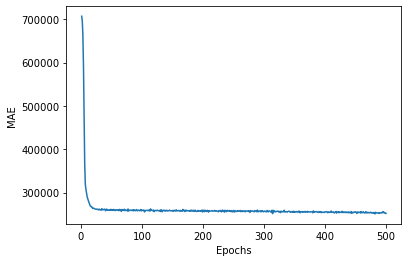

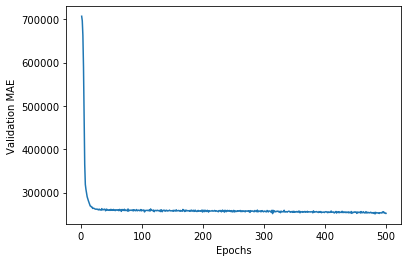

processing fold # 3
(1179, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/500
1181/1181 [==============================] - 0s 159us/step - loss: 767547308997.9069 - mae: 723659.2500 - val_loss: 650289930594.3612 - val_mae: 667403.2500
Epoch 2/500
1181/1181 [==============================] - 0s 77us/step - loss: 747128903570.7502 - mae: 711301.5625 - val_loss: 616106827588.3970 - val_mae: 644563.0000
Epoch 3/500
1181/1181 [==============================] - 0s 78us/step - loss: 684354293479.0720 - mae: 672184.8125 - val_loss: 534416292470.5547 - val_mae: 586118.8750
Epoch 4/500
1181/1181 [==============================] - 0s 79us/step - loss: 567900276435.9966 - mae: 589350.5625 - val_loss: 407827856199.0026 - val_mae: 480091.4688
Epoch 5/500
1181/1181 [==============================] - 0s 78us/step - loss: 418244300366.4691 - mae: 467048.3750 - val_loss: 278082745080.8346 - val_mae: 362580.8438
Epoch 6/500
1181/1181 [==============================] - 0s 80us/step - loss: 2959

1181/1181 [==============================] - 0s 78us/step - loss: 156986795100.7756 - mae: 271766.8750 - val_loss: 128147419375.7150 - val_mae: 252581.6406
Epoch 50/500
1181/1181 [==============================] - 0s 79us/step - loss: 156882048498.5605 - mae: 273740.9062 - val_loss: 128636922288.5293 - val_mae: 252338.7656
Epoch 51/500
1181/1181 [==============================] - 0s 82us/step - loss: 157127357557.0533 - mae: 272331.1875 - val_loss: 129972824246.3919 - val_mae: 255292.5781
Epoch 52/500
1181/1181 [==============================] - 0s 82us/step - loss: 156334130761.2667 - mae: 272709.4688 - val_loss: 131361863226.6260 - val_mae: 257432.2812
Epoch 53/500
1181/1181 [==============================] - 0s 81us/step - loss: 157113547183.7968 - mae: 274929.7812 - val_loss: 130818377097.4453 - val_mae: 253354.7344
Epoch 54/500
1181/1181 [==============================] - 0s 86us/step - loss: 157462258406.2049 - mae: 273109.0938 - val_loss: 131558616764.9059 - val_mae: 254421.7031

1181/1181 [==============================] - 0s 81us/step - loss: 154085093032.6435 - mae: 271125.8438 - val_loss: 221090010474.1781 - val_mae: 258460.5781
Epoch 98/500
1181/1181 [==============================] - 0s 78us/step - loss: 155980143356.7485 - mae: 271003.0938 - val_loss: 227866817064.3868 - val_mae: 260525.5156
Epoch 99/500
1181/1181 [==============================] - 0s 79us/step - loss: 154456894353.8831 - mae: 268799.5312 - val_loss: 240660897333.4148 - val_mae: 268692.4688
Epoch 100/500
1181/1181 [==============================] - 0s 78us/step - loss: 155085451045.5004 - mae: 272336.8750 - val_loss: 242816723480.7532 - val_mae: 266783.2188
Epoch 101/500
1181/1181 [==============================] - 0s 78us/step - loss: 154623273582.5504 - mae: 271313.7812 - val_loss: 248653253228.1324 - val_mae: 268708.8438
Epoch 102/500
1181/1181 [==============================] - 0s 79us/step - loss: 155076206709.9204 - mae: 272747.9062 - val_loss: 249855612370.4020 - val_mae: 265723.0

1181/1181 [==============================] - 0s 77us/step - loss: 153183717297.9644 - mae: 269207.3438 - val_loss: 557302495591.5725 - val_mae: 281595.1875
Epoch 146/500
1181/1181 [==============================] - 0s 76us/step - loss: 154996512235.6241 - mae: 271914.8438 - val_loss: 542024709836.5394 - val_mae: 275608.8750
Epoch 147/500
1181/1181 [==============================] - 0s 77us/step - loss: 154465313274.3641 - mae: 269204.2812 - val_loss: 565040655769.0789 - val_mae: 279360.9688
Epoch 148/500
1181/1181 [==============================] - 0s 79us/step - loss: 154619485812.6198 - mae: 270742.5625 - val_loss: 565661633549.0280 - val_mae: 277809.0312
Epoch 149/500
1181/1181 [==============================] - 0s 78us/step - loss: 154369579523.0347 - mae: 269804.5312 - val_loss: 572484245988.6412 - val_mae: 278166.0938
Epoch 150/500
1181/1181 [==============================] - 0s 76us/step - loss: 154199309843.5089 - mae: 268518.8125 - val_loss: 597831403348.0305 - val_mae: 283783

1181/1181 [==============================] - 0s 77us/step - loss: 153101756275.5360 - mae: 267964.0312 - val_loss: 1041138233938.0763 - val_mae: 296070.6250
Epoch 194/500
1181/1181 [==============================] - 0s 81us/step - loss: 152828938869.4869 - mae: 271221.0625 - val_loss: 1000928690968.1018 - val_mae: 289982.5938
Epoch 195/500
1181/1181 [==============================] - 0s 81us/step - loss: 150932018785.5444 - mae: 266793.8750 - val_loss: 1120934464754.3206 - val_mae: 306671.3750
Epoch 196/500
1181/1181 [==============================] - 0s 80us/step - loss: 153635860223.3497 - mae: 272081.6562 - val_loss: 1034955881620.5190 - val_mae: 291822.5000
Epoch 197/500
1181/1181 [==============================] - 0s 81us/step - loss: 152469511019.7325 - mae: 267291.6250 - val_loss: 1114023706165.4148 - val_mae: 302914.0000
Epoch 198/500
1181/1181 [==============================] - 0s 79us/step - loss: 152721192059.9898 - mae: 271143.2188 - val_loss: 1022077683977.7710 - val_mae: 

Epoch 241/500
1181/1181 [==============================] - 0s 81us/step - loss: 153321885220.8501 - mae: 269839.5938 - val_loss: 1113128262200.0203 - val_mae: 292031.8438
Epoch 242/500
1181/1181 [==============================] - 0s 78us/step - loss: 152632218678.6249 - mae: 267396.0938 - val_loss: 1169685753949.8015 - val_mae: 298709.6562
Epoch 243/500
1181/1181 [==============================] - 0s 77us/step - loss: 153277579208.5080 - mae: 269369.1562 - val_loss: 1151490576894.6973 - val_mae: 296598.3438
Epoch 244/500
1181/1181 [==============================] - 0s 76us/step - loss: 152909827974.6113 - mae: 268828.5625 - val_loss: 1176281533765.6997 - val_mae: 299752.0938
Epoch 245/500
1181/1181 [==============================] - 0s 79us/step - loss: 152665280064.5961 - mae: 268105.2188 - val_loss: 1183701565294.0864 - val_mae: 300707.4688
Epoch 246/500
1181/1181 [==============================] - 0s 79us/step - loss: 153022484115.8340 - mae: 268964.7812 - val_loss: 1182908089362.23

Epoch 289/500
1181/1181 [==============================] - 0s 80us/step - loss: 152710970823.2075 - mae: 267696.3750 - val_loss: 1138441900897.0586 - val_mae: 297520.7812
Epoch 290/500
1181/1181 [==============================] - 0s 78us/step - loss: 152171221619.7528 - mae: 268833.5312 - val_loss: 1122408735928.9976 - val_mae: 295296.6562
Epoch 291/500
1181/1181 [==============================] - 0s 77us/step - loss: 151695993607.1533 - mae: 266739.7500 - val_loss: 1165747293843.2163 - val_mae: 302227.7812
Epoch 292/500
1181/1181 [==============================] - 0s 80us/step - loss: 152608203882.6486 - mae: 268162.1250 - val_loss: 1139205615793.1807 - val_mae: 298462.3750
Epoch 293/500
1181/1181 [==============================] - 0s 78us/step - loss: 153003700567.3565 - mae: 269081.3750 - val_loss: 1119688617181.4758 - val_mae: 295958.8125
Epoch 294/500
1181/1181 [==============================] - 0s 77us/step - loss: 152024764807.9119 - mae: 268100.2812 - val_loss: 1114062425726.37

Epoch 337/500
1181/1181 [==============================] - 0s 79us/step - loss: 149052231510.0559 - mae: 267919.4688 - val_loss: 1112847151218.6462 - val_mae: 294596.2812
Epoch 338/500
1181/1181 [==============================] - 0s 77us/step - loss: 149354523093.9475 - mae: 265884.9688 - val_loss: 1171364133223.5725 - val_mae: 303640.9062
Epoch 339/500
1181/1181 [==============================] - 0s 76us/step - loss: 149379992764.1524 - mae: 267539.5312 - val_loss: 1169225186827.7251 - val_mae: 302686.2812
Epoch 340/500
1181/1181 [==============================] - 0s 78us/step - loss: 150028916196.6876 - mae: 268512.5938 - val_loss: 1126140861484.2952 - val_mae: 295976.9375
Epoch 341/500
1181/1181 [==============================] - 0s 77us/step - loss: 149463864763.0686 - mae: 267819.0938 - val_loss: 1111939525811.7864 - val_mae: 293638.0312
Epoch 342/500
1181/1181 [==============================] - 0s 78us/step - loss: 149514609125.5546 - mae: 265455.0625 - val_loss: 1167524897309.96

Epoch 385/500
1181/1181 [==============================] - 0s 79us/step - loss: 149008147257.4428 - mae: 266480.4062 - val_loss: 1074416125550.7379 - val_mae: 296544.2812
Epoch 386/500
1181/1181 [==============================] - 0s 78us/step - loss: 148010360672.4606 - mae: 266090.1875 - val_loss: 1073077872030.2900 - val_mae: 296163.4062
Epoch 387/500
1181/1181 [==============================] - 0s 81us/step - loss: 147058262862.2523 - mae: 264936.8750 - val_loss: 1096934665791.8372 - val_mae: 299608.0312
Epoch 388/500
1181/1181 [==============================] - 0s 85us/step - loss: 147171684972.8163 - mae: 266178.1250 - val_loss: 1021457906857.3640 - val_mae: 287945.9062
Epoch 389/500
1181/1181 [==============================] - 0s 82us/step - loss: 147754677725.7511 - mae: 264020.0938 - val_loss: 1045791197283.0127 - val_mae: 292070.0000
Epoch 390/500
1181/1181 [==============================] - 0s 84us/step - loss: 148848106736.1761 - mae: 264729.6562 - val_loss: 1071150696150.96

Epoch 433/500
1181/1181 [==============================] - 0s 80us/step - loss: 141709459553.1109 - mae: 262893.7188 - val_loss: 938181905629.4758 - val_mae: 286618.0625
Epoch 434/500
1181/1181 [==============================] - 0s 77us/step - loss: 142300903772.5589 - mae: 263253.3125 - val_loss: 949115755397.5369 - val_mae: 287830.6250
Epoch 435/500
1181/1181 [==============================] - 0s 83us/step - loss: 142218565064.9416 - mae: 262138.6094 - val_loss: 944614822336.1628 - val_mae: 287298.0312
Epoch 436/500
1181/1181 [==============================] - 0s 79us/step - loss: 141090569352.1287 - mae: 261221.7188 - val_loss: 957375399367.9796 - val_mae: 291062.1562
Epoch 437/500
1181/1181 [==============================] - 0s 78us/step - loss: 141320756589.0330 - mae: 261449.0469 - val_loss: 990178737342.2086 - val_mae: 299224.0312
Epoch 438/500
1181/1181 [==============================] - 0s 76us/step - loss: 141401880674.8450 - mae: 264150.7188 - val_loss: 943499265500.8245 - v

1181/1181 [==============================] - 0s 76us/step - loss: 131508427086.6859 - mae: 256437.0781 - val_loss: 757926986082.3612 - val_mae: 282818.1562
Epoch 482/500
1181/1181 [==============================] - 0s 78us/step - loss: 132829980947.7256 - mae: 257674.8438 - val_loss: 751364139044.4784 - val_mae: 279943.3750
Epoch 483/500
1181/1181 [==============================] - 0s 78us/step - loss: 131727369097.2125 - mae: 255746.7344 - val_loss: 737309884916.2748 - val_mae: 277637.0625
Epoch 484/500
1181/1181 [==============================] - 0s 79us/step - loss: 131126518911.4581 - mae: 255686.7500 - val_loss: 724165001132.6208 - val_mae: 276885.9062
Epoch 485/500
1181/1181 [==============================] - 0s 79us/step - loss: 130942632907.1092 - mae: 254706.2969 - val_loss: 734525072756.6005 - val_mae: 285983.9688
Epoch 486/500
1181/1181 [==============================] - 0s 78us/step - loss: 130875373306.1473 - mae: 257237.5625 - val_loss: 699603691702.3918 - val_mae: 277749

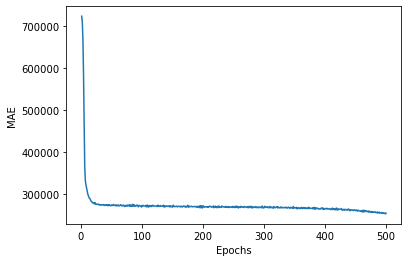

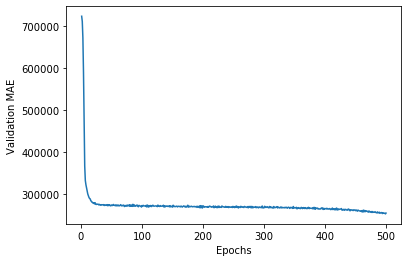

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
(0, 6)
Train on 787 samples, validate on 787 samples
Epoch 1/500
787/787 [==============================] - 0s 507us/step - loss: 692732285849.2096 - mae: 686460.7500 - val_loss: 712567093401.5349 - val_mae: 686117.0625
Epoch 2/500
787/787 [==============================] - 0s 388us/step - loss: 523399497970.0128 - mae: 557362.0625 - val_loss: 394857811166.4955 - val_mae: 442771.5312
Epoch 3/500
787/787 [==============================] - 0s 392us/step - loss: 250268536347.9746 - mae: 333081.3125 - val_loss: 227029672936.5794 - val_mae: 304808.2812
Epoch 4/500
787/787 [==============================] - 0s 385us/step - loss: 191040113648.3863 - mae: 303938.6250 - val_loss: 216609003897.3316 - val_mae: 289867.1250
Epoch 5/500
787/787 [==============================] - 0s 375us/step - loss: 172891637317.6112 - mae: 288003.7812 - val_loss: 211711153988.6353 - val_mae: 280006.0938
Epoch 6/500
787/787 [==============================] - 0s 379us/step - loss: 160337858851.45

787/787 [==============================] - 0s 376us/step - loss: 129279013733.1639 - mae: 250080.2812 - val_loss: 369252291814.3024 - val_mae: 278286.9688
Epoch 50/500
787/787 [==============================] - 0s 373us/step - loss: 128689935702.2008 - mae: 253250.6094 - val_loss: 344026216190.3736 - val_mae: 271431.9062
Epoch 51/500
787/787 [==============================] - 0s 373us/step - loss: 128972160628.4523 - mae: 250660.2500 - val_loss: 382580920710.3431 - val_mae: 281933.4062
Epoch 52/500
787/787 [==============================] - 0s 371us/step - loss: 128816824892.5032 - mae: 253116.2031 - val_loss: 355196756337.5248 - val_mae: 271972.9062
Epoch 53/500
787/787 [==============================] - 0s 369us/step - loss: 128608797608.8234 - mae: 248973.9219 - val_loss: 371152908517.0013 - val_mae: 274921.2188
Epoch 54/500
787/787 [==============================] - 0s 375us/step - loss: 129669725000.5387 - mae: 251228.5469 - val_loss: 370837592659.9238 - val_mae: 274062.5625
Epoch

Epoch 98/500
787/787 [==============================] - 0s 373us/step - loss: 128511303585.0165 - mae: 251032.6562 - val_loss: 369995714481.9314 - val_mae: 274567.0312
Epoch 99/500
787/787 [==============================] - 0s 375us/step - loss: 127040241768.0915 - mae: 248969.5938 - val_loss: 358824607093.4282 - val_mae: 271182.9062
Epoch 100/500
787/787 [==============================] - 0s 370us/step - loss: 128380440279.3393 - mae: 248910.6562 - val_loss: 375530248439.2173 - val_mae: 272866.8125
Epoch 101/500
787/787 [==============================] - 0s 375us/step - loss: 127619810665.7179 - mae: 249531.2656 - val_loss: 384777643321.5756 - val_mae: 276179.1250
Epoch 102/500
787/787 [==============================] - 0s 375us/step - loss: 128647555058.9886 - mae: 252133.9375 - val_loss: 386019575919.8984 - val_mae: 275077.6562
Epoch 103/500
787/787 [==============================] - 0s 378us/step - loss: 128341012267.9136 - mae: 249598.8438 - val_loss: 373319567841.4231 - val_mae: 

787/787 [==============================] - 0s 390us/step - loss: 127390829191.9695 - mae: 248813.7188 - val_loss: 371956582959.4918 - val_mae: 271238.0625
Epoch 147/500
787/787 [==============================] - 0s 407us/step - loss: 127474457447.7662 - mae: 249654.8125 - val_loss: 373040309624.0305 - val_mae: 273919.1250
Epoch 148/500
787/787 [==============================] - 0s 399us/step - loss: 127782297506.3177 - mae: 248920.8594 - val_loss: 394444125913.9416 - val_mae: 279485.5312
Epoch 149/500
787/787 [==============================] - 0s 384us/step - loss: 127932111074.3990 - mae: 250636.7656 - val_loss: 385996613343.1462 - val_mae: 274542.9375
Epoch 150/500
787/787 [==============================] - 0s 380us/step - loss: 127940282675.0699 - mae: 250313.6562 - val_loss: 378878523394.6023 - val_mae: 272023.0625
Epoch 151/500
787/787 [==============================] - 0s 374us/step - loss: 127517669732.5134 - mae: 249767.7031 - val_loss: 371745376836.3101 - val_mae: 271769.3750


787/787 [==============================] - 0s 394us/step - loss: 125701762015.4714 - mae: 246260.3125 - val_loss: 393799388101.4485 - val_mae: 274627.4688
Epoch 195/500
787/787 [==============================] - 0s 399us/step - loss: 124768794700.7675 - mae: 245357.4219 - val_loss: 410986140569.2097 - val_mae: 277068.5625
Epoch 196/500
787/787 [==============================] - 0s 388us/step - loss: 124076090083.0496 - mae: 245450.8438 - val_loss: 387712277690.0635 - val_mae: 275274.5625
Epoch 197/500
787/787 [==============================] - 0s 382us/step - loss: 125846826211.7001 - mae: 247493.5156 - val_loss: 401790707272.2134 - val_mae: 273924.5312
Epoch 198/500
787/787 [==============================] - 0s 379us/step - loss: 124752128450.1957 - mae: 247019.5469 - val_loss: 408875637503.6747 - val_mae: 274657.6250
Epoch 199/500
787/787 [==============================] - 0s 374us/step - loss: 124871026888.3761 - mae: 245636.2969 - val_loss: 424716255835.7307 - val_mae: 279200.9375


787/787 [==============================] - 0s 382us/step - loss: 121701288995.1309 - mae: 244842.3750 - val_loss: 430217577634.6429 - val_mae: 274021.5000
Epoch 243/500
787/787 [==============================] - 0s 378us/step - loss: 121703610521.5349 - mae: 241516.1094 - val_loss: 464754957877.9974 - val_mae: 282582.1562
Epoch 244/500
787/787 [==============================] - 0s 376us/step - loss: 120917965716.0051 - mae: 242036.0625 - val_loss: 479565195297.8298 - val_mae: 285303.6562
Epoch 245/500
787/787 [==============================] - 0s 371us/step - loss: 121286206173.8450 - mae: 244315.9531 - val_loss: 450294183194.3481 - val_mae: 277318.4375
Epoch 246/500
787/787 [==============================] - 0s 376us/step - loss: 120525945519.0038 - mae: 241755.0000 - val_loss: 435115379096.5591 - val_mae: 274946.3438
Epoch 247/500
787/787 [==============================] - 0s 373us/step - loss: 121577122632.5387 - mae: 241527.8125 - val_loss: 442511067929.6976 - val_mae: 276164.5000


787/787 [==============================] - 0s 408us/step - loss: 118267896614.7090 - mae: 241318.5000 - val_loss: 481632411002.6328 - val_mae: 278729.1562
Epoch 291/500
787/787 [==============================] - 0s 375us/step - loss: 117675510946.6429 - mae: 237940.7812 - val_loss: 521947828957.8450 - val_mae: 286131.4375
Epoch 292/500
787/787 [==============================] - 0s 379us/step - loss: 117562152609.9924 - mae: 240270.7969 - val_loss: 493103138912.2846 - val_mae: 279808.0312
Epoch 293/500
787/787 [==============================] - 0s 382us/step - loss: 117087797440.5692 - mae: 238449.9688 - val_loss: 498999250772.2490 - val_mae: 282169.0000
Epoch 294/500
787/787 [==============================] - 0s 385us/step - loss: 118137801454.7599 - mae: 241426.7031 - val_loss: 488429625614.6379 - val_mae: 278238.8125
Epoch 295/500
787/787 [==============================] - 0s 375us/step - loss: 118037954321.8907 - mae: 239086.4531 - val_loss: 492060845333.1436 - val_mae: 281680.5000


787/787 [==============================] - 0s 376us/step - loss: 115720073508.7573 - mae: 239215.7969 - val_loss: 509687657858.4396 - val_mae: 279639.6875
Epoch 339/500
787/787 [==============================] - 0s 376us/step - loss: 115975605246.6989 - mae: 236816.5312 - val_loss: 528443357535.3088 - val_mae: 284253.8125
Epoch 340/500
787/787 [==============================] - 0s 378us/step - loss: 115178088221.6010 - mae: 237607.2656 - val_loss: 537543382839.6238 - val_mae: 285080.7812
Epoch 341/500
787/787 [==============================] - 0s 379us/step - loss: 114954945776.7116 - mae: 238622.3906 - val_loss: 471095226591.7967 - val_mae: 276247.9688
Epoch 342/500
787/787 [==============================] - 0s 371us/step - loss: 114636379808.6912 - mae: 234752.3438 - val_loss: 523295608524.9301 - val_mae: 284750.1250
Epoch 343/500
787/787 [==============================] - 0s 374us/step - loss: 115451670563.7814 - mae: 236481.8438 - val_loss: 510151081224.1321 - val_mae: 285503.0938


787/787 [==============================] - 0s 378us/step - loss: 113431482633.4333 - mae: 233430.0000 - val_loss: 501680680038.7903 - val_mae: 282332.5312
Epoch 387/500
787/787 [==============================] - 0s 379us/step - loss: 113663005156.0254 - mae: 235661.7812 - val_loss: 490426625964.7268 - val_mae: 279925.8125
Epoch 388/500
787/787 [==============================] - 0s 379us/step - loss: 113820308179.4358 - mae: 234996.7812 - val_loss: 499083357089.0165 - val_mae: 281290.5938
Epoch 389/500
787/787 [==============================] - 0s 380us/step - loss: 113041314838.1194 - mae: 236297.1562 - val_loss: 509212648610.6429 - val_mae: 282032.7188
Epoch 390/500
787/787 [==============================] - 0s 376us/step - loss: 113159047566.1499 - mae: 236226.3750 - val_loss: 514026676869.3672 - val_mae: 280561.3750
Epoch 391/500
787/787 [==============================] - 0s 382us/step - loss: 113122294730.6531 - mae: 235659.8906 - val_loss: 558215293388.6049 - val_mae: 287664.0625


787/787 [==============================] - 0s 379us/step - loss: 111293997290.2059 - mae: 235169.2344 - val_loss: 527580806626.7243 - val_mae: 287052.9688
Epoch 435/500
787/787 [==============================] - 0s 373us/step - loss: 111607865906.0940 - mae: 235821.7969 - val_loss: 548991720035.5374 - val_mae: 290880.1250
Epoch 436/500
787/787 [==============================] - 0s 397us/step - loss: 112750858170.3888 - mae: 236206.1094 - val_loss: 497701484874.4905 - val_mae: 278581.0000
Epoch 437/500
787/787 [==============================] - 0s 389us/step - loss: 111676021148.4625 - mae: 235024.3125 - val_loss: 513974609141.9162 - val_mae: 283025.1875
Epoch 438/500
787/787 [==============================] - 0s 379us/step - loss: 111122516834.5616 - mae: 233308.1719 - val_loss: 529995516833.0165 - val_mae: 286376.7812
Epoch 439/500
787/787 [==============================] - 0s 376us/step - loss: 111672776456.7827 - mae: 234039.7500 - val_loss: 526798677956.1474 - val_mae: 289529.9688


787/787 [==============================] - 0s 384us/step - loss: 109994505961.5553 - mae: 233791.3750 - val_loss: 524664283406.6379 - val_mae: 283129.0000
Epoch 483/500
787/787 [==============================] - 0s 383us/step - loss: 109692201468.7471 - mae: 232273.2969 - val_loss: 533122244628.8183 - val_mae: 294166.2812
Epoch 484/500
787/787 [==============================] - 0s 382us/step - loss: 109037564512.9352 - mae: 234201.8594 - val_loss: 477240179846.0178 - val_mae: 277359.9688
Epoch 485/500
787/787 [==============================] - 0s 387us/step - loss: 109099971811.7001 - mae: 231125.3438 - val_loss: 479428574950.9529 - val_mae: 277736.2812
Epoch 486/500
787/787 [==============================] - 0s 383us/step - loss: 109845469118.9428 - mae: 233963.8594 - val_loss: 496913099046.0584 - val_mae: 282375.1875
Epoch 487/500
787/787 [==============================] - 0s 384us/step - loss: 108963423756.3609 - mae: 233102.9375 - val_loss: 522969500972.5641 - val_mae: 288954.7500


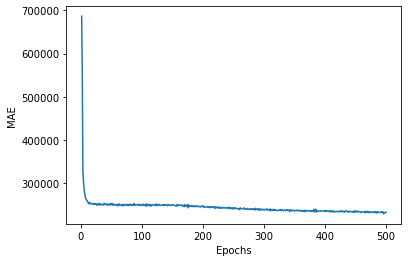

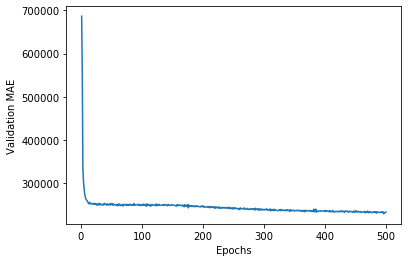

processing fold # 1
(787, 6)
Train on 787 samples, validate on 787 samples
Epoch 1/500
787/787 [==============================] - 0s 504us/step - loss: 757620142553.6163 - mae: 715190.0000 - val_loss: 647766135830.1194 - val_mae: 655753.9375
Epoch 2/500
787/787 [==============================] - 0s 378us/step - loss: 578838600936.9047 - mae: 591138.5625 - val_loss: 366530010990.2719 - val_mae: 421942.7188
Epoch 3/500
787/787 [==============================] - 0s 379us/step - loss: 280246103275.5070 - mae: 350419.9688 - val_loss: 214907294860.1982 - val_mae: 327935.3438
Epoch 4/500
787/787 [==============================] - 0s 378us/step - loss: 214114046425.6163 - mae: 305525.0625 - val_loss: 198139915111.7662 - val_mae: 315484.8750
Epoch 5/500
787/787 [==============================] - 0s 371us/step - loss: 201179925180.0152 - mae: 294556.1250 - val_loss: 184045377443.9441 - val_mae: 300064.7500
Epoch 6/500
787/787 [==============================] - 0s 382us/step - loss: 189058064269.

787/787 [==============================] - 0s 383us/step - loss: 194027303010.8869 - mae: 263394.2188 - val_loss: 159830805803.2630 - val_mae: 274836.4375
Epoch 50/500
787/787 [==============================] - 0s 375us/step - loss: 196793352884.2084 - mae: 266241.4688 - val_loss: 162032008248.2745 - val_mae: 275044.5000
Epoch 51/500
787/787 [==============================] - 0s 382us/step - loss: 197007650883.6595 - mae: 265839.5625 - val_loss: 158228880933.7332 - val_mae: 266806.2812
Epoch 52/500
787/787 [==============================] - 0s 379us/step - loss: 194214370141.3571 - mae: 264025.6875 - val_loss: 156805681935.2885 - val_mae: 267357.3125
Epoch 53/500
787/787 [==============================] - 0s 383us/step - loss: 190061094727.2376 - mae: 265748.4062 - val_loss: 157354054580.8589 - val_mae: 264264.3750
Epoch 54/500
787/787 [==============================] - 0s 383us/step - loss: 191164851349.6315 - mae: 263832.2188 - val_loss: 159421165993.4739 - val_mae: 268764.0000
Epoch

Epoch 98/500
787/787 [==============================] - 0s 378us/step - loss: 192121985895.7662 - mae: 263851.1875 - val_loss: 200891909595.8933 - val_mae: 274654.9062
Epoch 99/500
787/787 [==============================] - 0s 380us/step - loss: 195905295715.2122 - mae: 265166.1562 - val_loss: 198908600069.8551 - val_mae: 271220.4062
Epoch 100/500
787/787 [==============================] - 0s 382us/step - loss: 198511111739.2020 - mae: 263012.0938 - val_loss: 208730309365.5909 - val_mae: 280085.7188
Epoch 101/500
787/787 [==============================] - 0s 382us/step - loss: 198193379564.8081 - mae: 264997.5312 - val_loss: 207841366450.9073 - val_mae: 277152.5000
Epoch 102/500
787/787 [==============================] - 0s 374us/step - loss: 201319846848.2440 - mae: 266430.7188 - val_loss: 208547452147.6391 - val_mae: 274400.9062
Epoch 103/500
787/787 [==============================] - 0s 383us/step - loss: 195545951001.6976 - mae: 263977.8125 - val_loss: 206173248006.5057 - val_mae: 

787/787 [==============================] - 0s 370us/step - loss: 188545563417.6976 - mae: 262013.6406 - val_loss: 282364529827.7814 - val_mae: 277976.4062
Epoch 147/500
787/787 [==============================] - 0s 371us/step - loss: 196624363743.7967 - mae: 264439.2812 - val_loss: 291724900484.3914 - val_mae: 282030.6875
Epoch 148/500
787/787 [==============================] - 0s 373us/step - loss: 190478749076.6557 - mae: 264480.3750 - val_loss: 280670242662.4650 - val_mae: 273960.7812
Epoch 149/500
787/787 [==============================] - 0s 374us/step - loss: 188732815503.1258 - mae: 263385.6562 - val_loss: 280644208700.8285 - val_mae: 271763.4062
Epoch 150/500
787/787 [==============================] - 0s 371us/step - loss: 187956739908.6353 - mae: 259304.2500 - val_loss: 294867774796.7675 - val_mae: 283062.5000
Epoch 151/500
787/787 [==============================] - 0s 369us/step - loss: 194032746214.9530 - mae: 265382.1875 - val_loss: 296999498245.5298 - val_mae: 281832.8750


787/787 [==============================] - 0s 375us/step - loss: 190693013480.5794 - mae: 263962.0312 - val_loss: 390044546099.0699 - val_mae: 278124.5000
Epoch 195/500
787/787 [==============================] - 0s 441us/step - loss: 189921820344.1118 - mae: 261854.9062 - val_loss: 389557993390.3532 - val_mae: 279746.4062
Epoch 196/500
787/787 [==============================] - 0s 389us/step - loss: 186386462144.8945 - mae: 260132.3750 - val_loss: 388356044029.2350 - val_mae: 280452.2500
Epoch 197/500
787/787 [==============================] - 0s 393us/step - loss: 185868215120.3456 - mae: 261641.4375 - val_loss: 397978912315.2020 - val_mae: 284487.9062
Epoch 198/500
787/787 [==============================] - 0s 393us/step - loss: 193166259823.2478 - mae: 263528.2188 - val_loss: 408980915740.9504 - val_mae: 287384.0000
Epoch 199/500
787/787 [==============================] - 0s 380us/step - loss: 187917288381.6417 - mae: 261394.1094 - val_loss: 424743635711.6747 - val_mae: 295050.0000


787/787 [==============================] - 0s 383us/step - loss: 189518845793.2605 - mae: 260667.7656 - val_loss: 479831059981.3367 - val_mae: 285833.6250
Epoch 243/500
787/787 [==============================] - 0s 392us/step - loss: 187053545474.6023 - mae: 259920.9219 - val_loss: 486119994538.7751 - val_mae: 287692.0625
Epoch 244/500
787/787 [==============================] - 0s 389us/step - loss: 187750098331.1613 - mae: 259407.7500 - val_loss: 476818990091.3850 - val_mae: 285489.5312
Epoch 245/500
787/787 [==============================] - 0s 394us/step - loss: 185210558393.7383 - mae: 260258.6875 - val_loss: 460256628865.4638 - val_mae: 280068.3438
Epoch 246/500
787/787 [==============================] - 0s 385us/step - loss: 180799532104.8640 - mae: 259449.1719 - val_loss: 443838985954.7243 - val_mae: 275441.1562
Epoch 247/500
787/787 [==============================] - 0s 385us/step - loss: 183032510253.2148 - mae: 258381.2188 - val_loss: 459872120064.6506 - val_mae: 280593.5312


787/787 [==============================] - 0s 396us/step - loss: 169159142044.7878 - mae: 255254.2031 - val_loss: 570992114301.5603 - val_mae: 288533.0938
Epoch 291/500
787/787 [==============================] - 0s 371us/step - loss: 167547118932.8996 - mae: 256061.1562 - val_loss: 565540833277.7230 - val_mae: 287523.2812
Epoch 292/500
787/787 [==============================] - 0s 375us/step - loss: 168033573839.8577 - mae: 255834.7969 - val_loss: 559032760290.3989 - val_mae: 285001.4688
Epoch 293/500
787/787 [==============================] - 0s 371us/step - loss: 169241695087.5731 - mae: 255798.4688 - val_loss: 618772211103.0648 - val_mae: 298689.1250
Epoch 294/500
787/787 [==============================] - 0s 378us/step - loss: 165954460833.3418 - mae: 257453.8281 - val_loss: 551381644302.6378 - val_mae: 280108.3750
Epoch 295/500
787/787 [==============================] - 0s 374us/step - loss: 170486210799.4104 - mae: 256729.0625 - val_loss: 552808020906.7751 - val_mae: 280800.5000


787/787 [==============================] - 0s 376us/step - loss: 142083527738.5515 - mae: 249788.5469 - val_loss: 520243957086.6582 - val_mae: 281510.2500
Epoch 339/500
787/787 [==============================] - 0s 375us/step - loss: 140671094903.7052 - mae: 246386.3750 - val_loss: 528138473144.7624 - val_mae: 289313.6875
Epoch 340/500
787/787 [==============================] - 0s 374us/step - loss: 138831884438.9326 - mae: 249116.1562 - val_loss: 538853624245.8348 - val_mae: 293482.2500
Epoch 341/500
787/787 [==============================] - 0s 369us/step - loss: 141304317996.2389 - mae: 251026.5781 - val_loss: 525956915900.6658 - val_mae: 282967.8750
Epoch 342/500
787/787 [==============================] - 0s 378us/step - loss: 138785996526.7599 - mae: 248422.5000 - val_loss: 533122323344.7522 - val_mae: 287762.4062
Epoch 343/500
787/787 [==============================] - 0s 375us/step - loss: 137671256670.3329 - mae: 247942.0781 - val_loss: 507156307005.1537 - val_mae: 278914.8750


787/787 [==============================] - 0s 427us/step - loss: 118212967594.4498 - mae: 241272.5312 - val_loss: 396970990850.2770 - val_mae: 268506.5625
Epoch 387/500
787/787 [==============================] - 0s 418us/step - loss: 117891562614.4041 - mae: 240267.9062 - val_loss: 405095135772.6252 - val_mae: 280141.9062
Epoch 388/500
787/787 [==============================] - 0s 413us/step - loss: 116803240047.8983 - mae: 239824.2031 - val_loss: 380656235392.8132 - val_mae: 264844.8125
Epoch 389/500
787/787 [==============================] - 0s 408us/step - loss: 118187989051.8526 - mae: 240832.7344 - val_loss: 401126433457.6061 - val_mae: 277931.5000
Epoch 390/500
787/787 [==============================] - 0s 416us/step - loss: 116974714307.4968 - mae: 239714.6875 - val_loss: 394795611775.5120 - val_mae: 271032.9062
Epoch 391/500
787/787 [==============================] - 0s 417us/step - loss: 116857765250.4396 - mae: 239465.7344 - val_loss: 389088731185.4435 - val_mae: 271436.8750


787/787 [==============================] - 0s 385us/step - loss: 112866448421.7332 - mae: 233222.9062 - val_loss: 361184928723.7611 - val_mae: 277212.8750
Epoch 435/500
787/787 [==============================] - 0s 378us/step - loss: 112144945833.7992 - mae: 232124.8281 - val_loss: 374973118229.7941 - val_mae: 281506.3125
Epoch 436/500
787/787 [==============================] - 0s 392us/step - loss: 111534877483.9136 - mae: 232894.4688 - val_loss: 364641240867.4562 - val_mae: 275383.9062
Epoch 437/500
787/787 [==============================] - 0s 389us/step - loss: 112903087815.0750 - mae: 234127.3906 - val_loss: 354264087048.4575 - val_mae: 270863.4375
Epoch 438/500
787/787 [==============================] - 0s 380us/step - loss: 111571322533.8958 - mae: 234603.4688 - val_loss: 351537173317.6112 - val_mae: 260064.2656
Epoch 439/500
787/787 [==============================] - 0s 379us/step - loss: 112897041539.4155 - mae: 233153.7969 - val_loss: 353207257644.5641 - val_mae: 265015.9375


787/787 [==============================] - 0s 382us/step - loss: 109462905664.7319 - mae: 227985.0000 - val_loss: 353101477234.1754 - val_mae: 275238.5312
Epoch 483/500
787/787 [==============================] - 0s 378us/step - loss: 108333267878.2211 - mae: 228234.6875 - val_loss: 340663264579.4968 - val_mae: 258561.5312
Epoch 484/500
787/787 [==============================] - 0s 383us/step - loss: 107122027279.2884 - mae: 225452.7812 - val_loss: 339434653829.0419 - val_mae: 266387.5938
Epoch 485/500
787/787 [==============================] - 0s 378us/step - loss: 108625413688.5997 - mae: 226847.8594 - val_loss: 333768196447.9594 - val_mae: 270711.7812
Epoch 486/500
787/787 [==============================] - 0s 385us/step - loss: 108711916685.8246 - mae: 227117.5156 - val_loss: 332198001994.1652 - val_mae: 265528.3438
Epoch 487/500
787/787 [==============================] - 0s 370us/step - loss: 106210228023.6239 - mae: 224934.0938 - val_loss: 344750841163.7916 - val_mae: 276742.5625


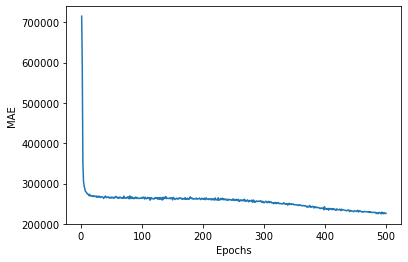

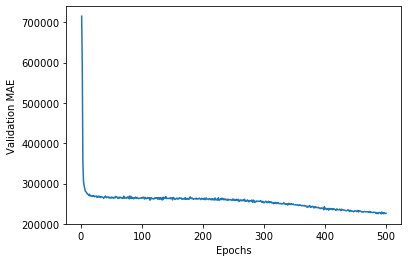

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
k=2
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=8, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

processing fold # 0
(0, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 723369949730.4172 - mae: 699440.3125 - val_loss: 724331432139.2367 - val_mae: 710015.2500
Epoch 2/100
1443/1443 [==============================] - 0s 132us/step - loss: 556934493269.8656 - mae: 582762.1250 - val_loss: 401919715218.5649 - val_mae: 480532.4062
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 281708667268.8787 - mae: 355128.5938 - val_loss: 170168293860.6412 - val_mae: 276896.6250
Epoch 4/100
1443/1443 [==============================] - 0s 136us/step - loss: 220743758082.3063 - mae: 312234.0312 - val_loss: 148737752837.8626 - val_mae: 263170.0938
Epoch 5/100
1443/1443 [==============================] - 0s 136us/step - loss: 200400638272.7540 - mae: 296746.8125 - val_loss: 138235876297.2824 - val_mae: 252510.0156
Epoch 6/100
1443/1443 [==============================] - 0s 133us/step - loss: 18

Epoch 49/100
1443/1443 [==============================] - 0s 138us/step - loss: 190315242107.8309 - mae: 264194.3125 - val_loss: 111321574579.7863 - val_mae: 229620.0312
Epoch 50/100
1443/1443 [==============================] - 0s 137us/step - loss: 189267683584.8870 - mae: 263048.7500 - val_loss: 112458729487.6336 - val_mae: 229619.9844
Epoch 51/100
1443/1443 [==============================] - 0s 138us/step - loss: 189167150415.8337 - mae: 261971.7344 - val_loss: 111235097263.8779 - val_mae: 230862.3750
Epoch 52/100
1443/1443 [==============================] - 0s 135us/step - loss: 187279442030.7027 - mae: 262676.8125 - val_loss: 111285888226.6870 - val_mae: 231077.6406
Epoch 53/100
1443/1443 [==============================] - 0s 135us/step - loss: 193591498353.1864 - mae: 264920.1875 - val_loss: 110535549053.0687 - val_mae: 230190.3281
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 188797974032.6764 - mae: 261745.1719 - val_loss: 109713382173.3130 - v

1443/1443 [==============================] - 0s 135us/step - loss: 185929208265.0034 - mae: 260923.5625 - val_loss: 109372140411.1145 - val_mae: 232224.0312
Epoch 98/100
1443/1443 [==============================] - 0s 134us/step - loss: 184685701430.8191 - mae: 262861.3125 - val_loss: 110896477504.4886 - val_mae: 231374.9219
Epoch 99/100
1443/1443 [==============================] - 0s 135us/step - loss: 188768287467.9529 - mae: 263338.4375 - val_loss: 110355690003.5420 - val_mae: 232775.8594
Epoch 100/100
131/131 [==============================] - 0s 53us/step


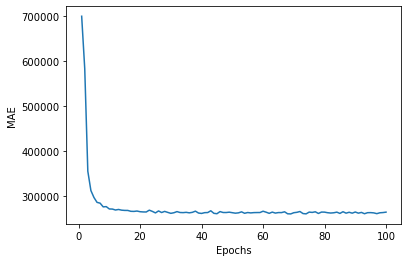

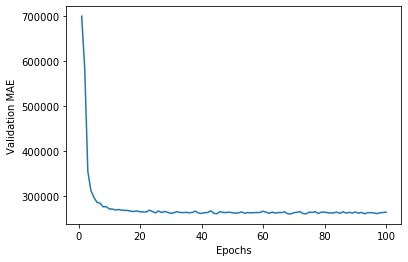

processing fold # 1
(131, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 717719778321.7408 - mae: 698819.6875 - val_loss: 768573816706.9313 - val_mae: 697849.0625
Epoch 2/100
1443/1443 [==============================] - 0s 136us/step - loss: 538591727210.0901 - mae: 568835.3125 - val_loss: 447247672671.7557 - val_mae: 458263.6562
Epoch 3/100
1443/1443 [==============================] - 0s 132us/step - loss: 275817044795.4318 - mae: 347214.0938 - val_loss: 248190710885.6183 - val_mae: 332648.5938
Epoch 4/100
1443/1443 [==============================] - 0s 132us/step - loss: 212927722649.9903 - mae: 308024.4375 - val_loss: 215393329558.4733 - val_mae: 311790.3438
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 194929714306.5724 - mae: 292122.2812 - val_loss: 193472467131.6031 - val_mae: 302131.2500
Epoch 6/100
1443/1443 [==============================] - 0s 135us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 134us/step - loss: 178942088791.6396 - mae: 259255.9219 - val_loss: 158502142952.5496 - val_mae: 270384.8125
Epoch 50/100
1443/1443 [==============================] - 0s 138us/step - loss: 182240553478.5641 - mae: 259938.3281 - val_loss: 157066660277.7404 - val_mae: 269433.1250
Epoch 51/100
1443/1443 [==============================] - 0s 137us/step - loss: 178430138991.0575 - mae: 259434.6875 - val_loss: 156073590674.5649 - val_mae: 269061.1562
Epoch 52/100
1443/1443 [==============================] - 0s 132us/step - loss: 181177455121.3860 - mae: 259721.5781 - val_loss: 158044250424.6718 - val_mae: 268369.6875
Epoch 53/100
1443/1443 [==============================] - 0s 135us/step - loss: 181310199915.8642 - mae: 259106.7969 - val_loss: 157247276368.1221 - val_mae: 268541.4062
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 181675662795.1324 - mae: 260415.7812 - val_loss: 156678094863.6336 - v

1443/1443 [==============================] - 0s 135us/step - loss: 177938496684.4407 - mae: 258694.0469 - val_loss: 165722267476.0305 - val_mae: 268013.9375
Epoch 98/100
1443/1443 [==============================] - 0s 135us/step - loss: 178372434307.4594 - mae: 255314.0312 - val_loss: 155747015906.6870 - val_mae: 268496.1562
Epoch 99/100
1443/1443 [==============================] - 0s 136us/step - loss: 179822142615.1518 - mae: 258723.7188 - val_loss: 158266468617.7710 - val_mae: 268338.8125
Epoch 100/100
131/131 [==============================] - 0s 38us/step


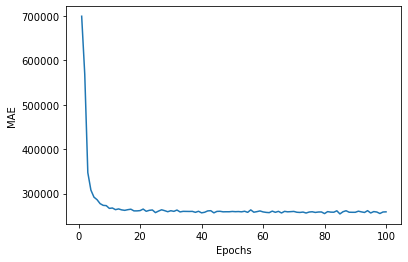

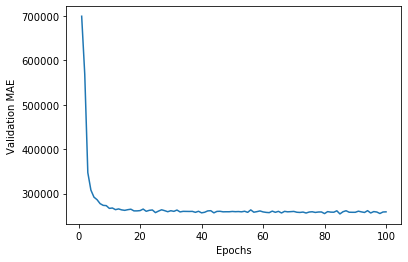

processing fold # 2
(262, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 218us/step - loss: 727699258869.7103 - mae: 703391.8750 - val_loss: 701280772533.7405 - val_mae: 671956.6875
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 569332672081.9625 - mae: 590494.9375 - val_loss: 412592413281.7099 - val_mae: 452102.0625
Epoch 3/100
1443/1443 [==============================] - 0s 137us/step - loss: 295526575080.5822 - mae: 363296.0000 - val_loss: 216414099190.2290 - val_mae: 318162.1562
Epoch 4/100
1443/1443 [==============================] - 0s 132us/step - loss: 213328325204.8011 - mae: 308699.6250 - val_loss: 194934740476.0916 - val_mae: 300418.0000
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 195980561072.3437 - mae: 294021.4375 - val_loss: 185739860077.4352 - val_mae: 289543.8125
Epoch 6/100
1443/1443 [==============================] - 0s 137us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 135us/step - loss: 174604356397.2391 - mae: 262140.9375 - val_loss: 156894109195.7252 - val_mae: 269953.7812
Epoch 50/100
1443/1443 [==============================] - 0s 134us/step - loss: 172223492240.7651 - mae: 260716.7969 - val_loss: 157572997807.8779 - val_mae: 268527.3750
Epoch 51/100
1443/1443 [==============================] - 0s 142us/step - loss: 171146444175.5232 - mae: 261728.2031 - val_loss: 157097992066.9313 - val_mae: 270122.5625
Epoch 52/100
1443/1443 [==============================] - 0s 139us/step - loss: 172194936120.9480 - mae: 261157.5938 - val_loss: 157033801618.5649 - val_mae: 266709.2812
Epoch 53/100
1443/1443 [==============================] - 0s 135us/step - loss: 174881131422.7803 - mae: 260766.7656 - val_loss: 157427188900.1527 - val_mae: 271014.9688
Epoch 54/100
1443/1443 [==============================] - 0s 140us/step - loss: 177075546397.2723 - mae: 262744.4375 - val_loss: 157234305821.3130 - v

1443/1443 [==============================] - 0s 136us/step - loss: 184236344544.9536 - mae: 262797.8125 - val_loss: 156963798602.2596 - val_mae: 272576.3125
Epoch 98/100
1443/1443 [==============================] - 0s 138us/step - loss: 191196572841.6022 - mae: 264212.2188 - val_loss: 156048037559.6947 - val_mae: 268614.8750
Epoch 99/100
1443/1443 [==============================] - 0s 136us/step - loss: 184499013762.5724 - mae: 258488.6562 - val_loss: 157698175945.2824 - val_mae: 274114.7500
Epoch 100/100
131/131 [==============================] - 0s 46us/step


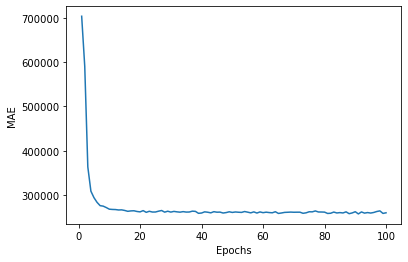

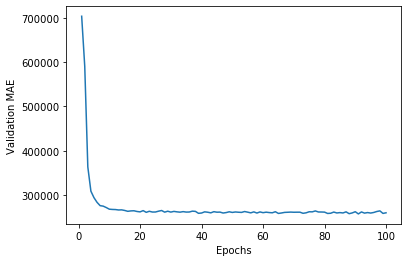

processing fold # 3
(393, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 731053989189.7214 - mae: 702448.6250 - val_loss: 620140493847.4504 - val_mae: 657359.8125
Epoch 2/100
1443/1443 [==============================] - 0s 136us/step - loss: 551272338221.9487 - mae: 573382.5000 - val_loss: 392552856974.6565 - val_mae: 439074.6562
Epoch 3/100
1443/1443 [==============================] - 0s 140us/step - loss: 256846139477.1559 - mae: 343691.1250 - val_loss: 492415286795.7253 - val_mae: 364396.6562
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 192370579433.2917 - mae: 303572.1250 - val_loss: 430314382437.6183 - val_mae: 332159.3438
Epoch 5/100
1443/1443 [==============================] - 0s 137us/step - loss: 174878550664.6043 - mae: 286996.4062 - val_loss: 471531470973.0687 - val_mae: 326454.4688
Epoch 6/100
1443/1443 [==============================] - 0s 139us/step - loss: 

1443/1443 [==============================] - 0s 134us/step - loss: 133573890185.6687 - mae: 254441.9062 - val_loss: 1155958252583.0840 - val_mae: 336967.4062
Epoch 49/100
1443/1443 [==============================] - 0s 134us/step - loss: 133500281587.0492 - mae: 253582.2969 - val_loss: 1285160511659.9695 - val_mae: 350569.2188
Epoch 50/100
1443/1443 [==============================] - 0s 135us/step - loss: 133233907318.8635 - mae: 255115.8125 - val_loss: 1219582260263.0840 - val_mae: 342945.5625
Epoch 51/100
1443/1443 [==============================] - 0s 135us/step - loss: 133556845456.5877 - mae: 254593.0938 - val_loss: 1275842696168.5496 - val_mae: 348340.8438
Epoch 52/100
1443/1443 [==============================] - 0s 137us/step - loss: 133208602616.9037 - mae: 253924.7500 - val_loss: 1361898787613.3130 - val_mae: 357293.9688
Epoch 53/100
1443/1443 [==============================] - 0s 132us/step - loss: 133827033841.6299 - mae: 254628.2969 - val_loss: 1329881175673.1604 - val_mae:

Epoch 96/100
1443/1443 [==============================] - 0s 132us/step - loss: 132729801994.1123 - mae: 253311.8281 - val_loss: 1421888719223.2061 - val_mae: 357735.3750
Epoch 97/100
1443/1443 [==============================] - 0s 133us/step - loss: 132953766019.9917 - mae: 255108.4375 - val_loss: 1290654809736.7939 - val_mae: 344096.8438
Epoch 98/100
1443/1443 [==============================] - 0s 134us/step - loss: 132669064521.2696 - mae: 253391.2812 - val_loss: 1300226611559.5725 - val_mae: 344943.8438
Epoch 99/100
1443/1443 [==============================] - 0s 133us/step - loss: 132441726550.2204 - mae: 253800.5312 - val_loss: 1174261312973.1909 - val_mae: 334568.1250
Epoch 100/100
131/131 [==============================] - 0s 38us/step


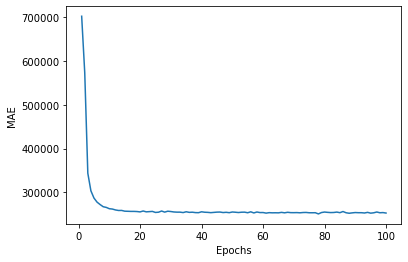

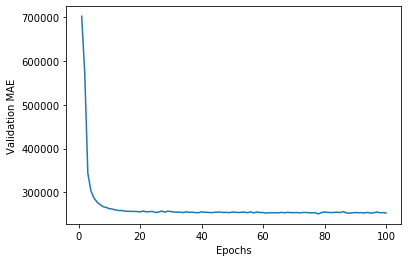

processing fold # 4
(524, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 198us/step - loss: 718712683635.6702 - mae: 698431.1250 - val_loss: 764938997853.8014 - val_mae: 712875.6250
Epoch 2/100
1443/1443 [==============================] - 0s 132us/step - loss: 557024941608.8038 - mae: 579057.1250 - val_loss: 450697608700.0916 - val_mae: 497428.4062
Epoch 3/100
1443/1443 [==============================] - 0s 132us/step - loss: 275961971939.7921 - mae: 354052.3125 - val_loss: 218800840360.0611 - val_mae: 328270.8438
Epoch 4/100
1443/1443 [==============================] - 0s 133us/step - loss: 217296525128.9148 - mae: 312307.6562 - val_loss: 191950891648.9771 - val_mae: 309139.5000
Epoch 5/100
1443/1443 [==============================] - 0s 134us/step - loss: 199568159670.9078 - mae: 296610.2500 - val_loss: 172594396152.1832 - val_mae: 294926.9375
Epoch 6/100
1443/1443 [==============================] - 0s 133us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 132us/step - loss: 185999545131.8198 - mae: 262954.6250 - val_loss: 115932731657.7710 - val_mae: 240748.7344
Epoch 50/100
1443/1443 [==============================] - 0s 132us/step - loss: 183364887947.2654 - mae: 261960.6875 - val_loss: 120849758223.6336 - val_mae: 242758.4375
Epoch 51/100
1443/1443 [==============================] - 0s 134us/step - loss: 183773134274.6168 - mae: 261451.3125 - val_loss: 118174455636.0305 - val_mae: 242490.2812
Epoch 52/100
1443/1443 [==============================] - 0s 130us/step - loss: 181144471491.6812 - mae: 261581.3438 - val_loss: 118340985238.4733 - val_mae: 244237.2031
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 182741398088.7374 - mae: 263538.7500 - val_loss: 121393343636.5191 - val_mae: 242138.3125
Epoch 54/100
1443/1443 [==============================] - 0s 130us/step - loss: 179905692133.3888 - mae: 258307.5000 - val_loss: 118675455624.7939 - v

1443/1443 [==============================] - 0s 133us/step - loss: 184469983254.7083 - mae: 259899.4688 - val_loss: 114743355470.1679 - val_mae: 240085.0000
Epoch 98/100
1443/1443 [==============================] - 0s 133us/step - loss: 188445189861.5662 - mae: 261969.5156 - val_loss: 113250660164.3969 - val_mae: 239631.2500
Epoch 99/100
1443/1443 [==============================] - 0s 134us/step - loss: 184648377629.2723 - mae: 261174.3750 - val_loss: 114794511164.5802 - val_mae: 239762.6719
Epoch 100/100
131/131 [==============================] - 0s 38us/step


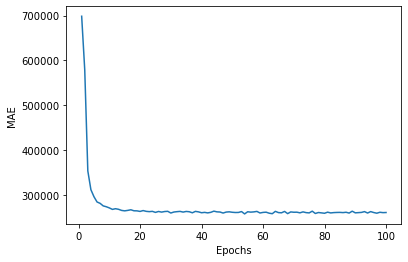

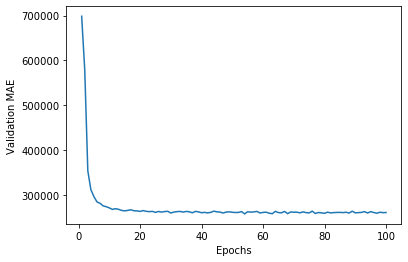

processing fold # 5
(655, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 198us/step - loss: 722505984466.9384 - mae: 700194.3750 - val_loss: 715054951416.1832 - val_mae: 682425.7500
Epoch 2/100
1443/1443 [==============================] - 0s 135us/step - loss: 549609773747.1823 - mae: 572418.0625 - val_loss: 376318946421.2519 - val_mae: 429750.9375
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 272355192238.7471 - mae: 351838.6250 - val_loss: 176382975468.4580 - val_mae: 271344.0938
Epoch 4/100
1443/1443 [==============================] - 0s 133us/step - loss: 214560218242.5724 - mae: 310440.9062 - val_loss: 159713238133.2519 - val_mae: 262072.9219
Epoch 5/100
1443/1443 [==============================] - 0s 131us/step - loss: 194280671965.7602 - mae: 296039.3750 - val_loss: 156796990378.0153 - val_mae: 263368.5000
Epoch 6/100
1443/1443 [==============================] - 0s 133us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 134us/step - loss: 182841453879.5288 - mae: 258337.7031 - val_loss: 168105545071.3893 - val_mae: 291063.9688
Epoch 50/100
1443/1443 [==============================] - 0s 135us/step - loss: 180662990057.4691 - mae: 257786.7656 - val_loss: 172607239050.7481 - val_mae: 305140.7812
Epoch 51/100
1443/1443 [==============================] - 0s 132us/step - loss: 184857101270.1317 - mae: 261289.9844 - val_loss: 166860437113.1603 - val_mae: 283823.3438
Epoch 52/100
1443/1443 [==============================] - 0s 137us/step - loss: 180380863305.6244 - mae: 256591.0156 - val_loss: 173215536385.9542 - val_mae: 306873.3438
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 182021217174.2647 - mae: 260426.7969 - val_loss: 167285761313.2214 - val_mae: 282050.9688
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 186328378531.9252 - mae: 258399.0469 - val_loss: 169034621803.4809 - v

1443/1443 [==============================] - 0s 139us/step - loss: 193045894299.3209 - mae: 257801.7500 - val_loss: 168335966708.2748 - val_mae: 292099.0625
Epoch 98/100
1443/1443 [==============================] - 0s 143us/step - loss: 187986222641.3195 - mae: 255570.2031 - val_loss: 171809319427.9084 - val_mae: 303363.9375
Epoch 99/100
1443/1443 [==============================] - 0s 140us/step - loss: 191204907767.3070 - mae: 258169.2656 - val_loss: 175084305619.0534 - val_mae: 310847.2500
Epoch 100/100
131/131 [==============================] - 0s 38us/step


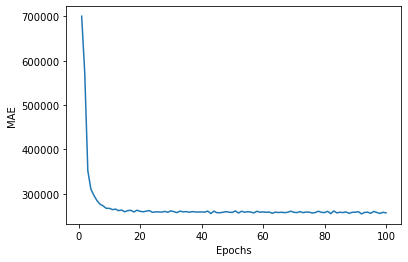

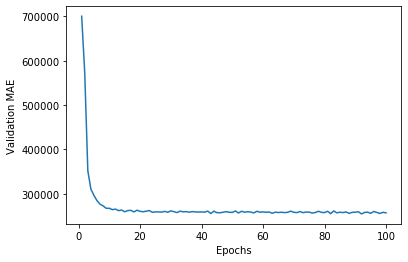

processing fold # 6
(786, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 203us/step - loss: 717948908504.9702 - mae: 699630.8125 - val_loss: 790556589704.7939 - val_mae: 709032.6250
Epoch 2/100
1443/1443 [==============================] - 0s 136us/step - loss: 567828659531.3986 - mae: 589631.3750 - val_loss: 503132926170.8703 - val_mae: 495456.9688
Epoch 3/100
1443/1443 [==============================] - 0s 140us/step - loss: 285943705827.0825 - mae: 358794.9688 - val_loss: 280073733846.9619 - val_mae: 354847.5000
Epoch 4/100
1443/1443 [==============================] - 0s 135us/step - loss: 207688687496.7817 - mae: 304256.1875 - val_loss: 251327078337.4657 - val_mae: 336203.8125
Epoch 5/100
1443/1443 [==============================] - 0s 139us/step - loss: 188600746710.6639 - mae: 291410.3750 - val_loss: 239152774292.5191 - val_mae: 323230.9375
Epoch 6/100
1443/1443 [==============================] - 0s 141us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 139us/step - loss: 177812398312.7595 - mae: 257886.0000 - val_loss: 196575212739.4198 - val_mae: 289785.2188
Epoch 50/100
1443/1443 [==============================] - 0s 137us/step - loss: 175892369019.1213 - mae: 255451.6250 - val_loss: 197040607888.6107 - val_mae: 291093.6875
Epoch 51/100
1443/1443 [==============================] - 0s 139us/step - loss: 180618192522.7332 - mae: 257074.2656 - val_loss: 195938599287.2061 - val_mae: 293005.4062
Epoch 52/100
1443/1443 [==============================] - 0s 136us/step - loss: 175278288087.0187 - mae: 256348.1562 - val_loss: 196166417431.4503 - val_mae: 292895.0000
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 174823807122.1844 - mae: 257040.2812 - val_loss: 196524500132.1527 - val_mae: 290141.0625
Epoch 54/100
1443/1443 [==============================] - 0s 137us/step - loss: 172669011432.2273 - mae: 256081.8125 - val_loss: 194736379888.3664 - v

1443/1443 [==============================] - 0s 137us/step - loss: 173870858603.3319 - mae: 256423.1250 - val_loss: 194004466086.1068 - val_mae: 291434.3438
Epoch 98/100
1443/1443 [==============================] - 0s 135us/step - loss: 176780061945.0811 - mae: 256368.6250 - val_loss: 193687291606.9618 - val_mae: 293530.2188
Epoch 99/100
1443/1443 [==============================] - 0s 133us/step - loss: 174514034238.8025 - mae: 255776.2031 - val_loss: 193907767467.9695 - val_mae: 298336.0938
Epoch 100/100
131/131 [==============================] - 0s 46us/step


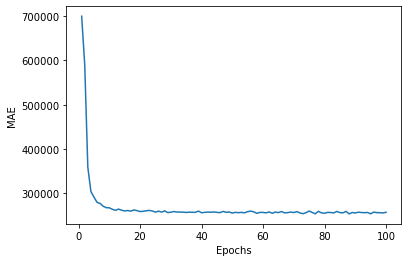

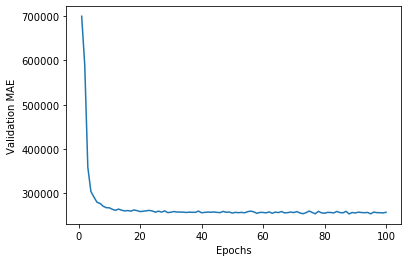

processing fold # 7
(917, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 205us/step - loss: 729945171276.8177 - mae: 701720.5000 - val_loss: 635335629784.9160 - val_mae: 662145.6250
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 561272050688.7096 - mae: 578003.1875 - val_loss: 356617127826.5649 - val_mae: 427542.0000
Epoch 3/100
1443/1443 [==============================] - 0s 134us/step - loss: 283912393115.5870 - mae: 355260.7188 - val_loss: 219810237494.7176 - val_mae: 334118.2812
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 217160178206.8690 - mae: 308669.9688 - val_loss: 202504304874.5038 - val_mae: 323543.0000
Epoch 5/100
1443/1443 [==============================] - 0s 134us/step - loss: 199016603443.6258 - mae: 294167.2500 - val_loss: 185424892873.2824 - val_mae: 308054.1562
Epoch 6/100
1443/1443 [==============================] - 0s 134us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 135us/step - loss: 179942508176.4102 - mae: 260140.4844 - val_loss: 133561717392.6107 - val_mae: 264916.6875
Epoch 50/100
1443/1443 [==============================] - 0s 134us/step - loss: 185868339309.2834 - mae: 262380.4375 - val_loss: 133180941444.8855 - val_mae: 265805.8125
Epoch 51/100
1443/1443 [==============================] - 0s 142us/step - loss: 180313873802.5558 - mae: 259102.0938 - val_loss: 136127766402.9313 - val_mae: 273815.7812
Epoch 52/100
1443/1443 [==============================] - 0s 141us/step - loss: 187456951193.1033 - mae: 263167.1875 - val_loss: 132436324977.3435 - val_mae: 264606.8125
Epoch 53/100
1443/1443 [==============================] - 0s 138us/step - loss: 184454977681.8295 - mae: 259012.0312 - val_loss: 132322919056.6107 - val_mae: 263126.1250
Epoch 54/100
1443/1443 [==============================] - 0s 136us/step - loss: 185444447153.2308 - mae: 261486.7188 - val_loss: 130385396212.2748 - v

1443/1443 [==============================] - 0s 140us/step - loss: 192420633982.4920 - mae: 259366.3906 - val_loss: 136003680803.1756 - val_mae: 263889.9688
Epoch 98/100
1443/1443 [==============================] - 0s 137us/step - loss: 193560259430.0097 - mae: 258741.3125 - val_loss: 134053070207.0229 - val_mae: 264541.9375
Epoch 99/100
1443/1443 [==============================] - 0s 136us/step - loss: 194349952054.6417 - mae: 260572.4219 - val_loss: 133917055210.5038 - val_mae: 265795.8125
Epoch 100/100
131/131 [==============================] - 0s 38us/step


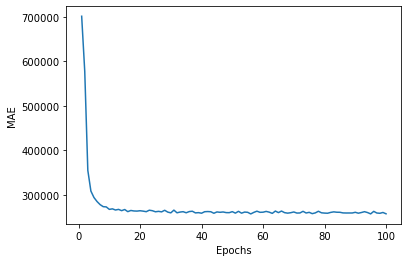

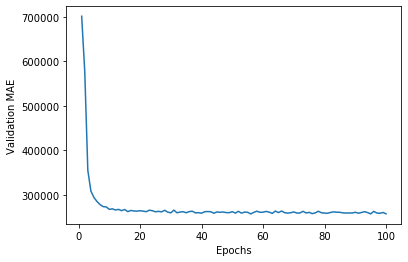

processing fold # 8
(1048, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 726549681981.5605 - mae: 700566.5000 - val_loss: 678197316912.8550 - val_mae: 677935.8750
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 552547058935.6619 - mae: 574771.8750 - val_loss: 392328085253.8626 - val_mae: 447664.5000
Epoch 3/100
1443/1443 [==============================] - 0s 143us/step - loss: 287812459732.1802 - mae: 354042.9688 - val_loss: 239735824196.3969 - val_mae: 360191.3750
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 216993332186.3895 - mae: 307560.2812 - val_loss: 216691736450.9313 - val_mae: 341714.6875
Epoch 5/100
1443/1443 [==============================] - 0s 133us/step - loss: 200218971177.8683 - mae: 294433.5000 - val_loss: 196223352269.1908 - val_mae: 323327.3438
Epoch 6/100
1443/1443 [==============================] - 0s 136us/step - loss:

Epoch 49/100
1443/1443 [==============================] - 0s 139us/step - loss: 181491642373.6771 - mae: 260548.1250 - val_loss: 141119231718.5954 - val_mae: 276316.5625
Epoch 50/100
1443/1443 [==============================] - 0s 136us/step - loss: 179562441591.0409 - mae: 258494.5312 - val_loss: 142160447300.3969 - val_mae: 279483.7812
Epoch 51/100
1443/1443 [==============================] - 0s 135us/step - loss: 184556888898.5281 - mae: 260589.9219 - val_loss: 142272945284.8855 - val_mae: 281047.0312
Epoch 52/100
1443/1443 [==============================] - 0s 136us/step - loss: 183379417268.2467 - mae: 259417.5000 - val_loss: 142027099347.0534 - val_mae: 279530.2188
Epoch 53/100
1443/1443 [==============================] - 0s 135us/step - loss: 179950270808.8815 - mae: 258427.5625 - val_loss: 143543016956.0916 - val_mae: 282870.8750
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 180970529988.5683 - mae: 262268.2812 - val_loss: 143324795177.0382 - v

1443/1443 [==============================] - 0s 139us/step - loss: 194210294586.7221 - mae: 260604.3594 - val_loss: 143113044171.2366 - val_mae: 279220.8750
Epoch 98/100
1443/1443 [==============================] - 0s 135us/step - loss: 188572985634.9494 - mae: 258867.4688 - val_loss: 141412589396.0305 - val_mae: 272134.6562
Epoch 99/100
1443/1443 [==============================] - 0s 139us/step - loss: 186425679081.4691 - mae: 257206.9531 - val_loss: 141265289606.8397 - val_mae: 272860.5938
Epoch 100/100
131/131 [==============================] - 0s 46us/step


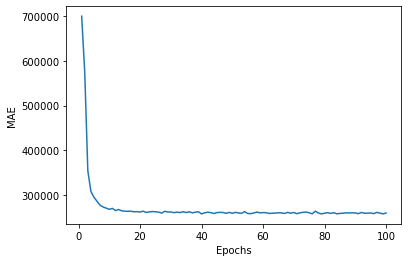

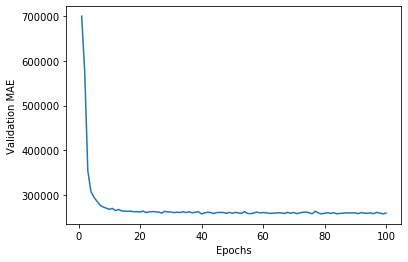

processing fold # 9
(1179, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 732426988429.7491 - mae: 704436.9375 - val_loss: 603311525919.2672 - val_mae: 634488.1250
Epoch 2/100
1443/1443 [==============================] - 0s 134us/step - loss: 551020208843.3097 - mae: 573536.8125 - val_loss: 341163935947.2366 - val_mae: 409633.0625
Epoch 3/100
1443/1443 [==============================] - 0s 137us/step - loss: 268868550133.7103 - mae: 351873.1875 - val_loss: 197359359734.2290 - val_mae: 296716.8125
Epoch 4/100
1443/1443 [==============================] - 0s 141us/step - loss: 214826722307.5482 - mae: 308085.7188 - val_loss: 179611125337.8931 - val_mae: 280338.9688
Epoch 5/100
1443/1443 [==============================] - 0s 141us/step - loss: 197250864452.3022 - mae: 292594.6562 - val_loss: 164019558134.2290 - val_mae: 272511.8125
Epoch 6/100
1443/1443 [==============================] - 0s 146us/step - loss:

Epoch 49/100
1443/1443 [==============================] - 0s 135us/step - loss: 179354460426.8219 - mae: 263983.5312 - val_loss: 136248867488.2443 - val_mae: 261376.0625
Epoch 50/100
1443/1443 [==============================] - 0s 135us/step - loss: 181616347487.9778 - mae: 261466.5938 - val_loss: 136830214269.0687 - val_mae: 265183.5000
Epoch 51/100
1443/1443 [==============================] - 0s 138us/step - loss: 178281062093.4387 - mae: 262292.6562 - val_loss: 139728521481.7710 - val_mae: 269050.4062
Epoch 52/100
1443/1443 [==============================] - 0s 133us/step - loss: 181668816244.2024 - mae: 264008.2188 - val_loss: 140187790390.7176 - val_mae: 263113.6875
Epoch 53/100
1443/1443 [==============================] - 0s 138us/step - loss: 178044924954.2564 - mae: 259713.4844 - val_loss: 140715239502.1679 - val_mae: 264348.1562
Epoch 54/100
1443/1443 [==============================] - 0s 137us/step - loss: 181948102257.1864 - mae: 263769.3125 - val_loss: 142815270521.1603 - v

1443/1443 [==============================] - 0s 137us/step - loss: 178969483261.1615 - mae: 259237.4531 - val_loss: 249682944187.6031 - val_mae: 285339.1250
Epoch 98/100
1443/1443 [==============================] - 0s 136us/step - loss: 182195047111.0520 - mae: 261066.3594 - val_loss: 263685201669.8626 - val_mae: 291535.2500
Epoch 99/100
1443/1443 [==============================] - 0s 136us/step - loss: 178739927951.1684 - mae: 258507.1094 - val_loss: 268166129617.0992 - val_mae: 292437.2500
Epoch 100/100
131/131 [==============================] - 0s 38us/step


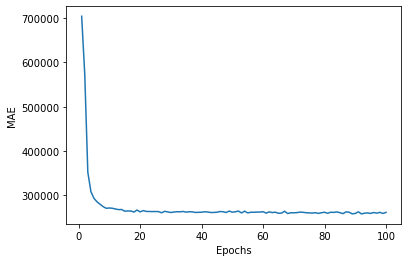

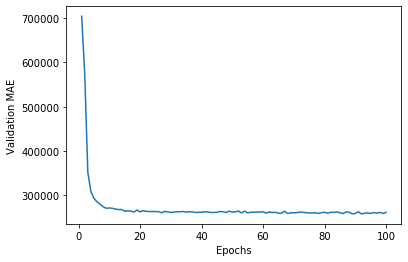

processing fold # 10
(1310, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 205us/step - loss: 729819526394.5004 - mae: 704544.8750 - val_loss: 634752265833.5267 - val_mae: 639244.7500
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 565358805207.7283 - mae: 585162.5625 - val_loss: 349778456044.4580 - val_mae: 404792.9375
Epoch 3/100
1443/1443 [==============================] - 0s 137us/step - loss: 287883605656.9258 - mae: 360143.3125 - val_loss: 199365299629.9237 - val_mae: 306301.0625
Epoch 4/100
1443/1443 [==============================] - 0s 131us/step - loss: 214865490007.9945 - mae: 312984.0312 - val_loss: 172558114503.3282 - val_mae: 282941.9062
Epoch 5/100
1443/1443 [==============================] - 0s 137us/step - loss: 196321296781.3943 - mae: 297719.0938 - val_loss: 156416506653.3130 - val_mae: 272764.7500
Epoch 6/100
1443/1443 [==============================] - 0s 138us/step - loss

Epoch 49/100
1443/1443 [==============================] - 0s 141us/step - loss: 184271261301.4442 - mae: 265042.6875 - val_loss: 108495341521.0992 - val_mae: 218066.3438
Epoch 50/100
1443/1443 [==============================] - 0s 142us/step - loss: 186683822355.3375 - mae: 266129.2812 - val_loss: 108478267892.2748 - val_mae: 219188.0469
Epoch 51/100
1443/1443 [==============================] - 0s 140us/step - loss: 182129087466.0014 - mae: 263970.5625 - val_loss: 110745487313.0992 - val_mae: 229465.5156
Epoch 52/100
1443/1443 [==============================] - 0s 134us/step - loss: 184121717380.3465 - mae: 264980.0625 - val_loss: 108797713368.9160 - val_mae: 222580.4688
Epoch 53/100
1443/1443 [==============================] - 0s 133us/step - loss: 182817678684.7845 - mae: 263825.5000 - val_loss: 109649127064.4275 - val_mae: 227748.1875
Epoch 54/100
1443/1443 [==============================] - 0s 142us/step - loss: 184265901076.5793 - mae: 266345.9375 - val_loss: 107799485275.8473 - v

1443/1443 [==============================] - 0s 133us/step - loss: 182432562620.9397 - mae: 264756.9062 - val_loss: 107936498039.2061 - val_mae: 211861.9688
Epoch 98/100
1443/1443 [==============================] - 0s 137us/step - loss: 179795111109.9875 - mae: 262048.7500 - val_loss: 108260128064.4886 - val_mae: 220378.9688
Epoch 99/100
1443/1443 [==============================] - 0s 137us/step - loss: 179609648155.6757 - mae: 263917.9062 - val_loss: 111295846134.2290 - val_mae: 233486.0312
Epoch 100/100
131/131 [==============================] - 0s 46us/step


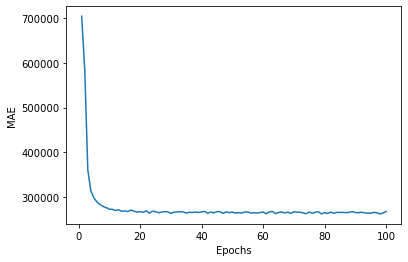

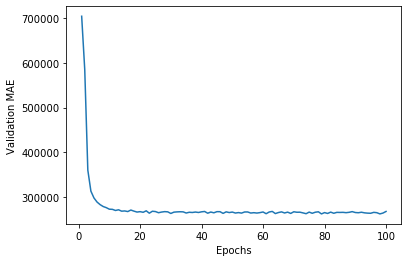

processing fold # 11
(1441, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 735855264890.7665 - mae: 705628.3125 - val_loss: 564069636705.7100 - val_mae: 623818.1875
Epoch 2/100
1443/1443 [==============================] - 0s 135us/step - loss: 562487517570.0402 - mae: 581422.6875 - val_loss: 307726710830.9008 - val_mae: 400278.8750
Epoch 3/100
1443/1443 [==============================] - 0s 134us/step - loss: 279505250396.2523 - mae: 359727.2500 - val_loss: 161830217743.6336 - val_mae: 289815.4375
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 217266086303.1351 - mae: 308772.5938 - val_loss: 144313318923.7252 - val_mae: 276611.8125
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 198704825512.1830 - mae: 294809.8438 - val_loss: 131512762368.0000 - val_mae: 265907.0938
Epoch 6/100
1443/1443 [==============================] - 0s 136us/step - loss

Epoch 49/100
1443/1443 [==============================] - 0s 137us/step - loss: 177972754697.4026 - mae: 262813.9688 - val_loss: 100604905425.0992 - val_mae: 225071.8438
Epoch 50/100
1443/1443 [==============================] - 0s 136us/step - loss: 185908751983.7672 - mae: 265384.4062 - val_loss: 100709184582.3512 - val_mae: 224349.2188
Epoch 51/100
1443/1443 [==============================] - 0s 139us/step - loss: 183931640953.3472 - mae: 263881.2500 - val_loss: 100834462399.5114 - val_mae: 223440.4844
Epoch 52/100
1443/1443 [==============================] - 0s 139us/step - loss: 182428460092.3188 - mae: 263274.7500 - val_loss: 100559049860.8855 - val_mae: 225889.9844
Epoch 53/100
1443/1443 [==============================] - 0s 137us/step - loss: 182639715782.8746 - mae: 264012.8125 - val_loss: 100529370807.6947 - val_mae: 225768.6406
Epoch 54/100
1443/1443 [==============================] - 0s 138us/step - loss: 185319113768.4491 - mae: 267188.5000 - val_loss: 102012956640.7328 - v

1443/1443 [==============================] - 0s 135us/step - loss: 182700662303.7561 - mae: 262639.4062 - val_loss: 100157968540.3359 - val_mae: 223968.5312
Epoch 98/100
1443/1443 [==============================] - 0s 134us/step - loss: 189677347412.0915 - mae: 266535.6875 - val_loss: 99966411815.0840 - val_mae: 225298.8438
Epoch 99/100
1443/1443 [==============================] - 0s 133us/step - loss: 183943871217.6299 - mae: 263147.5938 - val_loss: 100115547237.6183 - val_mae: 224923.0312
Epoch 100/100
131/131 [==============================] - 0s 38us/step


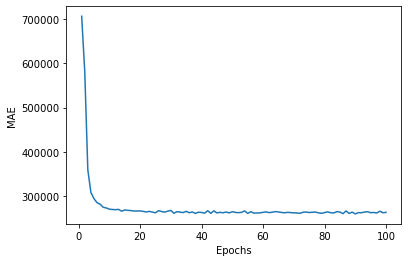

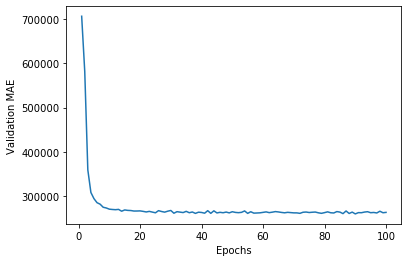

C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
k=12
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [17]:
# new model with larger layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(1024, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

processing fold # 0
(0, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 239us/step - loss: 662637231628.6328 - mae: 657775.1875 - val_loss: 448209753986.6122 - val_mae: 521818.0000
Epoch 2/200
1378/1378 [==============================] - 0s 174us/step - loss: 294027982732.0754 - mae: 367124.9062 - val_loss: 161747896779.7551 - val_mae: 275244.9375
Epoch 3/200
1378/1378 [==============================] - 0s 169us/step - loss: 215098105011.8317 - mae: 308432.4688 - val_loss: 145745699568.3265 - val_mae: 258455.5781
Epoch 4/200
1378/1378 [==============================] - 0s 166us/step - loss: 191186559011.6691 - mae: 289677.6250 - val_loss: 122495824958.6939 - val_mae: 245878.3906
Epoch 5/200
1378/1378 [==============================] - 0s 167us/step - loss: 180384723948.6792 - mae: 280343.3750 - val_loss: 116431885792.6531 - val_mae: 241632.1406
Epoch 6/200
1378/1378 [==============================] - 0s 171us/step - loss: 17

Epoch 49/200
1378/1378 [==============================] - 0s 165us/step - loss: 185091314753.3933 - mae: 263963.8750 - val_loss: 109430000577.3061 - val_mae: 229771.6250
Epoch 50/200
1378/1378 [==============================] - 0s 163us/step - loss: 185139550853.0160 - mae: 263837.2500 - val_loss: 106483731727.6735 - val_mae: 232676.4531
Epoch 51/200
1378/1378 [==============================] - 0s 165us/step - loss: 185855647208.9637 - mae: 267081.9062 - val_loss: 108945336696.1633 - val_mae: 230269.0469
Epoch 52/200
1378/1378 [==============================] - 0s 164us/step - loss: 183305516720.1161 - mae: 262960.5938 - val_loss: 105911716216.1633 - val_mae: 232194.3750
Epoch 53/200
1378/1378 [==============================] - 0s 167us/step - loss: 183319285563.8200 - mae: 265111.6562 - val_loss: 107253716866.6122 - val_mae: 231341.4219
Epoch 54/200
1378/1378 [==============================] - 0s 166us/step - loss: 180184103069.5385 - mae: 263843.4062 - val_loss: 106401710497.9592 - v

Epoch 97/200
1378/1378 [==============================] - 0s 164us/step - loss: 189152931432.7780 - mae: 262284.9688 - val_loss: 103373259378.9388 - val_mae: 224270.1250
Epoch 98/200
1378/1378 [==============================] - 0s 163us/step - loss: 189269266393.3585 - mae: 259968.9531 - val_loss: 101470576807.1837 - val_mae: 225795.6875
Epoch 99/200
1378/1378 [==============================] - 0s 166us/step - loss: 203691592223.9536 - mae: 265253.7500 - val_loss: 101229952940.4082 - val_mae: 224825.4844
Epoch 100/200
1378/1378 [==============================] - 0s 164us/step - loss: 190402301636.9231 - mae: 259562.4062 - val_loss: 101638875303.1837 - val_mae: 230971.6562
Epoch 101/200
1378/1378 [==============================] - 0s 164us/step - loss: 195907508446.9318 - mae: 263319.9375 - val_loss: 102519717971.5918 - val_mae: 225671.9531
Epoch 102/200
1378/1378 [==============================] - 0s 165us/step - loss: 192557665168.5341 - mae: 259859.8125 - val_loss: 102218707111.1837 

Epoch 145/200
1378/1378 [==============================] - 0s 172us/step - loss: 179835468513.1611 - mae: 257707.7812 - val_loss: 102727739893.5510 - val_mae: 223640.0781
Epoch 146/200
1378/1378 [==============================] - 0s 179us/step - loss: 177909822933.6429 - mae: 261128.0625 - val_loss: 112120492658.9388 - val_mae: 224768.3281
Epoch 147/200
1378/1378 [==============================] - 0s 181us/step - loss: 178419201052.2380 - mae: 254444.1875 - val_loss: 100072342339.9184 - val_mae: 229942.6094
Epoch 148/200
1378/1378 [==============================] - 0s 170us/step - loss: 181652245410.3687 - mae: 259368.4062 - val_loss: 101426010697.1429 - val_mae: 233744.3281
Epoch 149/200
1378/1378 [==============================] - 0s 168us/step - loss: 178871567439.5123 - mae: 258543.4688 - val_loss: 103735666980.5714 - val_mae: 222220.4844
Epoch 150/200
1378/1378 [==============================] - 0s 171us/step - loss: 182885676274.2525 - mae: 257676.8906 - val_loss: 100981763009.30

Epoch 193/200
1378/1378 [==============================] - 0s 166us/step - loss: 179303599551.3498 - mae: 255898.6406 - val_loss: 101194120045.7143 - val_mae: 235894.4062
Epoch 194/200
1378/1378 [==============================] - 0s 169us/step - loss: 175471464785.3701 - mae: 256822.6719 - val_loss: 100333354464.6531 - val_mae: 222866.8438
Epoch 195/200
1378/1378 [==============================] - 0s 166us/step - loss: 177384325976.0581 - mae: 255776.6719 - val_loss: 105173878282.4490 - val_mae: 221561.2656
Epoch 196/200
1378/1378 [==============================] - 0s 169us/step - loss: 178209801059.9478 - mae: 255489.8125 - val_loss: 104245128212.8980 - val_mae: 221283.4531
Epoch 197/200
1378/1378 [==============================] - 0s 164us/step - loss: 175058261888.1858 - mae: 253637.8594 - val_loss: 101172772947.5918 - val_mae: 236453.8906
Epoch 198/200
1378/1378 [==============================] - 0s 166us/step - loss: 178078077350.0842 - mae: 257246.2344 - val_loss: 105799330418.93

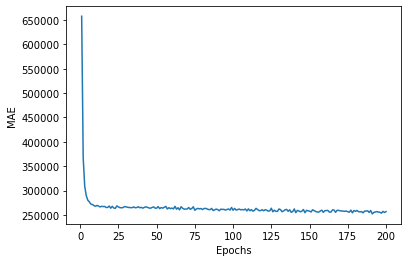

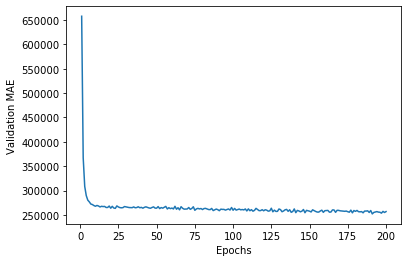

processing fold # 1
(196, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 233us/step - loss: 656643866980.6908 - mae: 658482.1875 - val_loss: 570962079158.8572 - val_mae: 553746.5000
Epoch 2/200
1378/1378 [==============================] - 0s 165us/step - loss: 303792320589.2830 - mae: 369974.0000 - val_loss: 247299555662.3673 - val_mae: 336224.5000
Epoch 3/200
1378/1378 [==============================] - 0s 164us/step - loss: 201464065435.6807 - mae: 297875.3125 - val_loss: 216793839323.4286 - val_mae: 309827.3750
Epoch 4/200
1378/1378 [==============================] - 0s 167us/step - loss: 179368548378.7518 - mae: 280939.5312 - val_loss: 198609399891.5918 - val_mae: 301384.5625
Epoch 5/200
1378/1378 [==============================] - 0s 163us/step - loss: 169574341122.2293 - mae: 272122.0938 - val_loss: 188771008344.8163 - val_mae: 297156.2812
Epoch 6/200
1378/1378 [==============================] - 0s 164us/step - loss: 

Epoch 49/200
1378/1378 [==============================] - 0s 166us/step - loss: 176190013214.0958 - mae: 255959.9219 - val_loss: 174754299904.0000 - val_mae: 283267.9688
Epoch 50/200
1378/1378 [==============================] - 0s 166us/step - loss: 175800378302.6067 - mae: 257454.3750 - val_loss: 175317599211.1021 - val_mae: 284345.9688
Epoch 51/200
1378/1378 [==============================] - 0s 163us/step - loss: 180256661994.1248 - mae: 259224.8906 - val_loss: 179088080227.2653 - val_mae: 278312.7812
Epoch 52/200
1378/1378 [==============================] - 0s 166us/step - loss: 177838139918.1190 - mae: 255501.6094 - val_loss: 177280428491.7551 - val_mae: 279724.2188
Epoch 53/200
1378/1378 [==============================] - 0s 166us/step - loss: 178302023671.0827 - mae: 258243.8750 - val_loss: 180875595358.0408 - val_mae: 279365.7188
Epoch 54/200
1378/1378 [==============================] - 0s 168us/step - loss: 177156993487.6981 - mae: 256690.3750 - val_loss: 178003027926.2041 - v

1378/1378 [==============================] - 0s 166us/step - loss: 175755058730.3571 - mae: 257279.8438 - val_loss: 177558699028.8979 - val_mae: 280767.2188
Epoch 98/200
1378/1378 [==============================] - 0s 165us/step - loss: 178009294921.5675 - mae: 257879.6406 - val_loss: 178925711276.4082 - val_mae: 279669.8438
Epoch 99/200
1378/1378 [==============================] - 0s 163us/step - loss: 181482337979.2627 - mae: 257534.4844 - val_loss: 177005432581.2245 - val_mae: 279205.1875
Epoch 100/200
1378/1378 [==============================] - 0s 167us/step - loss: 178782851470.3048 - mae: 255173.8750 - val_loss: 173604458245.2245 - val_mae: 284899.1562
Epoch 101/200
1378/1378 [==============================] - 0s 166us/step - loss: 175011188563.5994 - mae: 256840.5938 - val_loss: 174076055301.2245 - val_mae: 289436.3750
Epoch 102/200
1378/1378 [==============================] - 0s 163us/step - loss: 179355015703.0363 - mae: 257372.0469 - val_loss: 176133397190.5306 - val_mae: 27

1378/1378 [==============================] - 0s 165us/step - loss: 171944914807.2685 - mae: 253739.9844 - val_loss: 177835392856.8163 - val_mae: 277690.6875
Epoch 146/200
1378/1378 [==============================] - 0s 167us/step - loss: 175394538209.1611 - mae: 254577.0156 - val_loss: 175473836366.3673 - val_mae: 278090.5938
Epoch 147/200
1378/1378 [==============================] - 0s 164us/step - loss: 168820836444.1451 - mae: 251155.4062 - val_loss: 172138533114.7755 - val_mae: 281718.2188
Epoch 148/200
1378/1378 [==============================] - 0s 167us/step - loss: 185604461019.5878 - mae: 256553.6875 - val_loss: 178056530045.3878 - val_mae: 277221.1562
Epoch 149/200
1378/1378 [==============================] - 0s 166us/step - loss: 176628601343.2569 - mae: 253819.1250 - val_loss: 181599030042.1224 - val_mae: 277122.1250
Epoch 150/200
1378/1378 [==============================] - 0s 167us/step - loss: 179720071055.0479 - mae: 251394.2031 - val_loss: 172692522966.2041 - val_mae: 

Epoch 193/200
1378/1378 [==============================] - 0s 163us/step - loss: 173907741168.3948 - mae: 251169.8750 - val_loss: 172857205906.2857 - val_mae: 278852.5000
Epoch 194/200
1378/1378 [==============================] - 0s 164us/step - loss: 173778037268.0639 - mae: 250519.3906 - val_loss: 171534981328.9796 - val_mae: 279790.5000
Epoch 195/200
1378/1378 [==============================] - 0s 165us/step - loss: 173057652192.0464 - mae: 250697.5000 - val_loss: 189152600732.7347 - val_mae: 278065.1875
Epoch 196/200
1378/1378 [==============================] - 0s 164us/step - loss: 173085607766.5718 - mae: 252169.4688 - val_loss: 186352527151.0204 - val_mae: 277751.7812
Epoch 197/200
1378/1378 [==============================] - 0s 163us/step - loss: 176745783949.9332 - mae: 247683.9531 - val_loss: 174775025664.0000 - val_mae: 278144.6875
Epoch 198/200
1378/1378 [==============================] - 0s 163us/step - loss: 170116364635.7736 - mae: 247483.5156 - val_loss: 170832048880.32

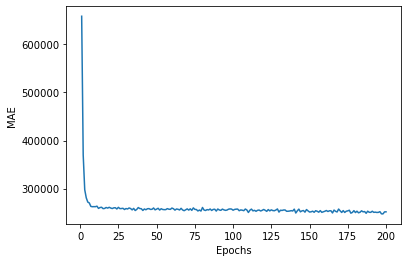

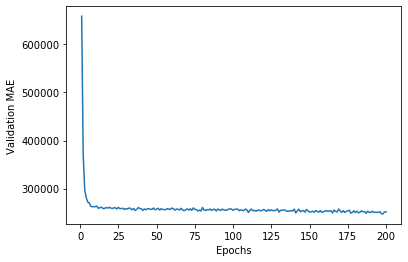

processing fold # 2
(392, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 240us/step - loss: 667244356356.8302 - mae: 658332.3750 - val_loss: 488096460883.5919 - val_mae: 541007.2500
Epoch 2/200
1378/1378 [==============================] - 0s 163us/step - loss: 269599084300.2612 - mae: 360759.5000 - val_loss: 379207813746.9388 - val_mae: 344858.9062
Epoch 3/200
1378/1378 [==============================] - 0s 166us/step - loss: 182329096694.3396 - mae: 292379.0625 - val_loss: 358903289061.8776 - val_mae: 318331.6250
Epoch 4/200
1378/1378 [==============================] - 0s 164us/step - loss: 160505753469.2133 - mae: 276905.8438 - val_loss: 388356895472.3265 - val_mae: 307464.4688
Epoch 5/200
1378/1378 [==============================] - 0s 165us/step - loss: 149042487886.0261 - mae: 267006.1875 - val_loss: 501838249315.2653 - val_mae: 322804.4062
Epoch 6/200
1378/1378 [==============================] - 0s 165us/step - loss: 

Epoch 49/200
1378/1378 [==============================] - 0s 164us/step - loss: 134053099656.7315 - mae: 255131.0312 - val_loss: 823457306498.6123 - val_mae: 309593.7500
Epoch 50/200
1378/1378 [==============================] - 0s 159us/step - loss: 134236782344.5457 - mae: 253476.1562 - val_loss: 886985874954.4490 - val_mae: 317751.7500
Epoch 51/200
1378/1378 [==============================] - 0s 163us/step - loss: 131933614103.7794 - mae: 251829.7188 - val_loss: 998156494973.3877 - val_mae: 332323.2188
Epoch 52/200
1378/1378 [==============================] - 0s 163us/step - loss: 133093020973.7010 - mae: 254670.1875 - val_loss: 844177341126.5306 - val_mae: 309707.5625
Epoch 53/200
1378/1378 [==============================] - 0s 169us/step - loss: 133266985322.6357 - mae: 254194.8125 - val_loss: 896092058017.9592 - val_mae: 317493.3438
Epoch 54/200
1378/1378 [==============================] - 0s 165us/step - loss: 133267129615.9768 - mae: 253817.7812 - val_loss: 811343998390.8572 - v

1378/1378 [==============================] - 0s 161us/step - loss: 129498425840.3948 - mae: 250295.1562 - val_loss: 1015291468988.0817 - val_mae: 315362.6875
Epoch 98/200
1378/1378 [==============================] - 0s 163us/step - loss: 128838139113.3353 - mae: 248594.5938 - val_loss: 998303163872.6531 - val_mae: 312607.8750
Epoch 99/200
1378/1378 [==============================] - 0s 161us/step - loss: 128175538953.0102 - mae: 247922.8125 - val_loss: 978824923428.5714 - val_mae: 311104.3750
Epoch 100/200
1378/1378 [==============================] - 0s 161us/step - loss: 128152939075.6227 - mae: 247087.1562 - val_loss: 1007668135559.8368 - val_mae: 313935.6875
Epoch 101/200
1378/1378 [==============================] - 0s 165us/step - loss: 127858726825.7997 - mae: 246334.4375 - val_loss: 1040212326107.4286 - val_mae: 317798.3750
Epoch 102/200
1378/1378 [==============================] - 0s 162us/step - loss: 128443433483.1466 - mae: 248293.8125 - val_loss: 1060582060115.5918 - val_mae

Epoch 145/200
1378/1378 [==============================] - 0s 160us/step - loss: 125197367545.9158 - mae: 245786.0625 - val_loss: 1167594404884.8979 - val_mae: 316759.0625
Epoch 146/200
1378/1378 [==============================] - 0s 166us/step - loss: 124673956354.2293 - mae: 245958.1562 - val_loss: 1379435469677.7144 - val_mae: 331638.6250
Epoch 147/200
1378/1378 [==============================] - 0s 165us/step - loss: 124666837381.3875 - mae: 246312.5000 - val_loss: 1220639139965.3877 - val_mae: 319095.8125
Epoch 148/200
1378/1378 [==============================] - 0s 164us/step - loss: 124043740871.8955 - mae: 245031.7500 - val_loss: 1430014766853.2246 - val_mae: 340800.2188
Epoch 149/200
1378/1378 [==============================] - 0s 161us/step - loss: 124285851944.4993 - mae: 246355.4531 - val_loss: 1201102374870.2041 - val_mae: 317947.7188
Epoch 150/200
1378/1378 [==============================] - 0s 158us/step - loss: 124999189205.2714 - mae: 245411.4375 - val_loss: 1263019884

1378/1378 [==============================] - 0s 165us/step - loss: 120067732298.6822 - mae: 241574.9844 - val_loss: 1099097877441.3062 - val_mae: 310991.5625
Epoch 193/200
1378/1378 [==============================] - 0s 170us/step - loss: 119820645130.7750 - mae: 242231.2188 - val_loss: 1021498194964.8979 - val_mae: 307412.2812
Epoch 194/200
1378/1378 [==============================] - 0s 166us/step - loss: 119230969193.1495 - mae: 240899.7812 - val_loss: 927125697264.3265 - val_mae: 304967.5000
Epoch 195/200
1378/1378 [==============================] - 0s 165us/step - loss: 118784454798.6763 - mae: 239831.1250 - val_loss: 1154121866595.2654 - val_mae: 320689.9062
Epoch 196/200
1378/1378 [==============================] - 0s 166us/step - loss: 119380108194.3687 - mae: 241974.4375 - val_loss: 1087091338846.0408 - val_mae: 314501.6875
Epoch 197/200
1378/1378 [==============================] - 0s 166us/step - loss: 119232814794.8679 - mae: 241729.8750 - val_loss: 1125710392090.1226 - val_

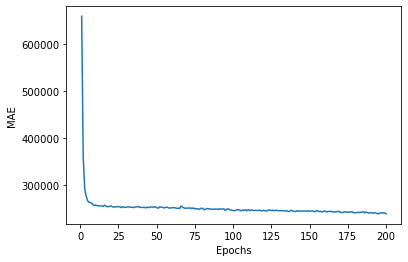

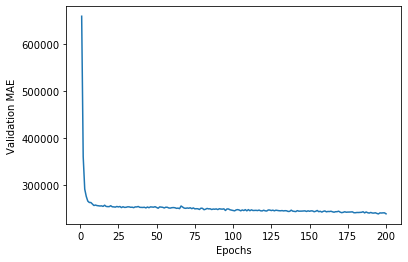

processing fold # 3
(588, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 237us/step - loss: 660462173447.0596 - mae: 657896.8750 - val_loss: 486295066164.2449 - val_mae: 518217.0625
Epoch 2/200
1378/1378 [==============================] - 0s 166us/step - loss: 296004423412.4818 - mae: 362959.1875 - val_loss: 184130408364.4082 - val_mae: 287461.8438
Epoch 3/200
1378/1378 [==============================] - 0s 167us/step - loss: 215405392103.8491 - mae: 304996.0312 - val_loss: 153924419082.4490 - val_mae: 269534.2500
Epoch 4/200
1378/1378 [==============================] - 0s 169us/step - loss: 193265631713.5327 - mae: 285146.2812 - val_loss: 143227170230.8571 - val_mae: 264745.4375
Epoch 5/200
1378/1378 [==============================] - 0s 166us/step - loss: 184423441489.7416 - mae: 275297.7500 - val_loss: 142170189406.0408 - val_mae: 261902.8125
Epoch 6/200
1378/1378 [==============================] - 0s 168us/step - loss: 

1378/1378 [==============================] - 0s 165us/step - loss: 193099368849.2772 - mae: 261254.1250 - val_loss: 142246347755.1021 - val_mae: 267518.2500
Epoch 49/200
1378/1378 [==============================] - 0s 166us/step - loss: 201966974360.7083 - mae: 263464.3750 - val_loss: 142528584892.0816 - val_mae: 268348.5312
Epoch 50/200
1378/1378 [==============================] - 0s 166us/step - loss: 189431588409.2191 - mae: 261027.9219 - val_loss: 142301879149.7143 - val_mae: 261771.7188
Epoch 51/200
1378/1378 [==============================] - 0s 169us/step - loss: 193040719336.9637 - mae: 260658.7812 - val_loss: 141985641534.6939 - val_mae: 261030.0469
Epoch 52/200
1378/1378 [==============================] - 0s 166us/step - loss: 189277739760.0232 - mae: 259194.9531 - val_loss: 145945810985.7959 - val_mae: 279668.0312
Epoch 53/200
1378/1378 [==============================] - 0s 167us/step - loss: 188764297064.4064 - mae: 260822.6406 - val_loss: 142322515633.6327 - val_mae: 25988

1378/1378 [==============================] - 0s 171us/step - loss: 184275828092.5631 - mae: 255788.9375 - val_loss: 140861672719.6735 - val_mae: 267202.0312
Epoch 97/200
1378/1378 [==============================] - 0s 169us/step - loss: 180357254359.5007 - mae: 258257.7656 - val_loss: 140527654786.6122 - val_mae: 258875.1094
Epoch 98/200
1378/1378 [==============================] - 0s 165us/step - loss: 182095995985.7416 - mae: 258773.2656 - val_loss: 144024187297.9592 - val_mae: 254357.1094
Epoch 99/200
1378/1378 [==============================] - 0s 169us/step - loss: 187030976919.2220 - mae: 257882.3281 - val_loss: 140513984010.4490 - val_mae: 258457.4219
Epoch 100/200
1378/1378 [==============================] - 0s 170us/step - loss: 178642351530.5428 - mae: 255281.5156 - val_loss: 140325865764.5714 - val_mae: 265362.1875
Epoch 101/200
1378/1378 [==============================] - 0s 170us/step - loss: 178551318953.0566 - mae: 259527.0156 - val_loss: 143541439759.6735 - val_mae: 253

1378/1378 [==============================] - 0s 165us/step - loss: 178815822131.4601 - mae: 255843.1562 - val_loss: 138137261285.8776 - val_mae: 261906.2812
Epoch 145/200
1378/1378 [==============================] - 0s 168us/step - loss: 175418967505.1843 - mae: 254602.9531 - val_loss: 138185012286.6939 - val_mae: 261354.3438
Epoch 146/200
1378/1378 [==============================] - 0s 168us/step - loss: 175379814040.3367 - mae: 254354.6875 - val_loss: 138391868645.8776 - val_mae: 263495.9688
Epoch 147/200
1378/1378 [==============================] - 0s 166us/step - loss: 185806100976.3948 - mae: 258067.7656 - val_loss: 137768699862.2041 - val_mae: 259798.8750
Epoch 148/200
1378/1378 [==============================] - 0s 164us/step - loss: 174678238051.9478 - mae: 253126.7812 - val_loss: 147999612760.8163 - val_mae: 286905.3125
Epoch 149/200
1378/1378 [==============================] - 0s 165us/step - loss: 173711668252.2380 - mae: 256858.7500 - val_loss: 144243772018.9388 - val_mae: 

Epoch 192/200
1378/1378 [==============================] - 0s 172us/step - loss: 174909519744.1858 - mae: 251870.5781 - val_loss: 139089027740.7347 - val_mae: 256403.7500
Epoch 193/200
1378/1378 [==============================] - 0s 168us/step - loss: 177875668352.9289 - mae: 252772.3906 - val_loss: 139299199519.3469 - val_mae: 265091.8438
Epoch 194/200
1378/1378 [==============================] - 0s 166us/step - loss: 177867102279.3382 - mae: 253736.2188 - val_loss: 138492503520.6531 - val_mae: 259098.3125
Epoch 195/200
1378/1378 [==============================] - 0s 168us/step - loss: 173406929728.2787 - mae: 252778.2812 - val_loss: 138362861944.1633 - val_mae: 259180.5781
Epoch 196/200
1378/1378 [==============================] - 0s 166us/step - loss: 181081716239.6052 - mae: 255588.6406 - val_loss: 138646700199.1837 - val_mae: 257809.4531
Epoch 197/200
1378/1378 [==============================] - 0s 166us/step - loss: 182481231693.6546 - mae: 253987.5000 - val_loss: 138742534227.59

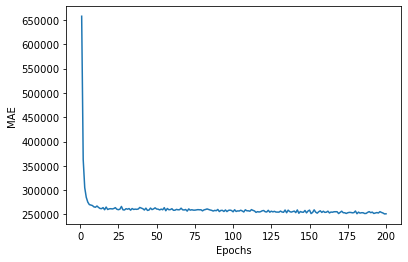

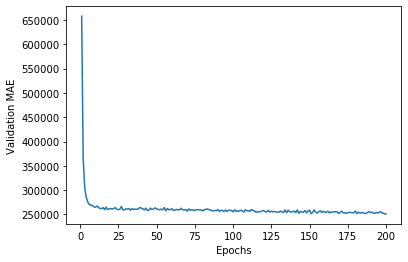

processing fold # 4
(784, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 238us/step - loss: 657371823176.8243 - mae: 657043.9375 - val_loss: 575614474448.9796 - val_mae: 565118.9375
Epoch 2/200
1378/1378 [==============================] - 0s 166us/step - loss: 292461052997.8519 - mae: 362992.5625 - val_loss: 277191583702.2041 - val_mae: 356193.6250
Epoch 3/200
1378/1378 [==============================] - 0s 168us/step - loss: 205926278998.5718 - mae: 297920.6250 - val_loss: 246432138260.8979 - val_mae: 333178.5312
Epoch 4/200
1378/1378 [==============================] - 0s 177us/step - loss: 182560454650.4267 - mae: 279673.2188 - val_loss: 220674806637.7143 - val_mae: 316724.0625
Epoch 5/200
1378/1378 [==============================] - 0s 174us/step - loss: 173710429940.4819 - mae: 272837.9062 - val_loss: 217928850745.4694 - val_mae: 310132.9688
Epoch 6/200
1378/1378 [==============================] - 0s 170us/step - loss: 

Epoch 49/200
1378/1378 [==============================] - 0s 171us/step - loss: 173512665165.2830 - mae: 254499.1562 - val_loss: 190835999555.9184 - val_mae: 287735.7812
Epoch 50/200
1378/1378 [==============================] - 0s 168us/step - loss: 171440427715.4369 - mae: 255240.5469 - val_loss: 186912099766.8571 - val_mae: 287613.2188
Epoch 51/200
1378/1378 [==============================] - 0s 167us/step - loss: 172707306830.3977 - mae: 255433.2188 - val_loss: 185026613916.7347 - val_mae: 289209.4375
Epoch 52/200
1378/1378 [==============================] - 0s 169us/step - loss: 166727601171.3208 - mae: 255386.1250 - val_loss: 183455078859.7551 - val_mae: 288053.9062
Epoch 53/200
1378/1378 [==============================] - 0s 171us/step - loss: 167880054414.6763 - mae: 258787.2344 - val_loss: 202233046496.6531 - val_mae: 292584.0625
Epoch 54/200
1378/1378 [==============================] - 0s 168us/step - loss: 173283482958.3977 - mae: 252823.6406 - val_loss: 184393701668.5714 - v

1378/1378 [==============================] - 0s 177us/step - loss: 174694444182.1074 - mae: 253011.0938 - val_loss: 183721110799.6735 - val_mae: 279313.0938
Epoch 98/200
1378/1378 [==============================] - 0s 177us/step - loss: 171687555844.8302 - mae: 251656.1719 - val_loss: 181546981417.7959 - val_mae: 279957.9688
Epoch 99/200
1378/1378 [==============================] - 0s 168us/step - loss: 172541848987.6807 - mae: 251240.7031 - val_loss: 178540307936.6531 - val_mae: 288786.5625
Epoch 100/200
1378/1378 [==============================] - 0s 166us/step - loss: 169586439029.7823 - mae: 253155.0469 - val_loss: 179504016990.0408 - val_mae: 282098.3750
Epoch 101/200
1378/1378 [==============================] - 0s 167us/step - loss: 168736138913.2540 - mae: 252125.7031 - val_loss: 183273520984.8163 - val_mae: 279198.9062
Epoch 102/200
1378/1378 [==============================] - 0s 170us/step - loss: 168437998507.2859 - mae: 252215.3594 - val_loss: 177186037258.4490 - val_mae: 29

1378/1378 [==============================] - 0s 166us/step - loss: 173693249330.9028 - mae: 250306.8594 - val_loss: 177817863774.0408 - val_mae: 275652.0625
Epoch 146/200
1378/1378 [==============================] - 0s 166us/step - loss: 174524872326.5022 - mae: 251270.2500 - val_loss: 180755901795.2653 - val_mae: 274737.5938
Epoch 147/200
1378/1378 [==============================] - 0s 167us/step - loss: 168860076504.6154 - mae: 249609.1250 - val_loss: 177899914093.7143 - val_mae: 275376.0000
Epoch 148/200
1378/1378 [==============================] - 0s 168us/step - loss: 175165196730.8911 - mae: 250437.2500 - val_loss: 172983944254.6939 - val_mae: 283411.9062
Epoch 149/200
1378/1378 [==============================] - 0s 166us/step - loss: 172995028014.0726 - mae: 254307.7812 - val_loss: 182366352781.0612 - val_mae: 274443.2188
Epoch 150/200
1378/1378 [==============================] - 0s 168us/step - loss: 169427594657.6255 - mae: 248792.2031 - val_loss: 178847750102.2041 - val_mae: 

Epoch 193/200
1378/1378 [==============================] - 0s 168us/step - loss: 167105895270.9202 - mae: 248270.7500 - val_loss: 175894978894.3673 - val_mae: 306035.6875
Epoch 194/200
1378/1378 [==============================] - 0s 166us/step - loss: 169273241938.8563 - mae: 252897.3750 - val_loss: 171853272544.6531 - val_mae: 275910.3750
Epoch 195/200
1378/1378 [==============================] - 0s 166us/step - loss: 164509534835.1814 - mae: 248042.1719 - val_loss: 170341716135.1837 - val_mae: 292891.1250
Epoch 196/200
1378/1378 [==============================] - 0s 165us/step - loss: 169048454603.9361 - mae: 250522.5469 - val_loss: 174997376856.8163 - val_mae: 271595.0312
Epoch 197/200
1378/1378 [==============================] - 0s 166us/step - loss: 168398106962.8563 - mae: 249657.1562 - val_loss: 178521614043.4286 - val_mae: 270730.0312
Epoch 198/200
1378/1378 [==============================] - 0s 167us/step - loss: 165173746885.6662 - mae: 245103.6562 - val_loss: 175419389492.24

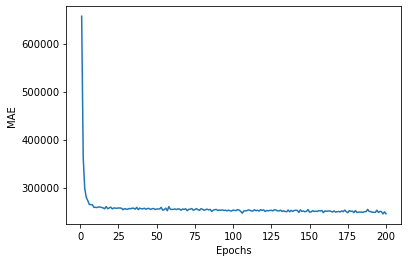

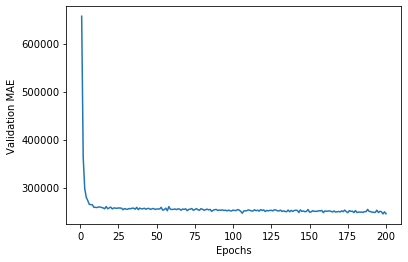

processing fold # 5
(980, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 235us/step - loss: 677714109908.1567 - mae: 663874.4375 - val_loss: 426240002006.2041 - val_mae: 493392.8438
Epoch 2/200
1378/1378 [==============================] - 0s 166us/step - loss: 306963848086.4789 - mae: 363994.7500 - val_loss: 200701096353.9592 - val_mae: 331789.4062
Epoch 3/200
1378/1378 [==============================] - 0s 167us/step - loss: 213157117393.1843 - mae: 300861.0312 - val_loss: 172666746921.7959 - val_mae: 302663.4062
Epoch 4/200
1378/1378 [==============================] - 0s 165us/step - loss: 194411441058.3687 - mae: 287782.1875 - val_loss: 157644024936.4898 - val_mae: 294823.7188
Epoch 5/200
1378/1378 [==============================] - 0s 166us/step - loss: 178855481956.3193 - mae: 277285.7812 - val_loss: 149704780904.4898 - val_mae: 289577.6875
Epoch 6/200
1378/1378 [==============================] - 0s 165us/step - loss: 

Epoch 49/200
1378/1378 [==============================] - 0s 166us/step - loss: 181387226675.2743 - mae: 259672.4219 - val_loss: 141227540145.6327 - val_mae: 295411.7188
Epoch 50/200
1378/1378 [==============================] - 0s 166us/step - loss: 181085376809.2424 - mae: 262474.8125 - val_loss: 125850735845.8775 - val_mae: 257354.2812
Epoch 51/200
1378/1378 [==============================] - 0s 164us/step - loss: 194907529180.3309 - mae: 260754.8125 - val_loss: 131108875034.1225 - val_mae: 276811.6875
Epoch 52/200
1378/1378 [==============================] - 0s 162us/step - loss: 182151184859.5878 - mae: 260158.7188 - val_loss: 127688788929.3061 - val_mae: 266178.7188
Epoch 53/200
1378/1378 [==============================] - 0s 167us/step - loss: 185202627237.7126 - mae: 262478.3750 - val_loss: 125883394173.3878 - val_mae: 261961.4219
Epoch 54/200
1378/1378 [==============================] - 0s 164us/step - loss: 187341092028.7489 - mae: 261564.3125 - val_loss: 125979178715.4286 - v

1378/1378 [==============================] - 0s 167us/step - loss: 187611857293.5617 - mae: 260006.7188 - val_loss: 122104021159.1837 - val_mae: 259279.6250
Epoch 98/200
1378/1378 [==============================] - 0s 168us/step - loss: 181798681482.5893 - mae: 254692.5312 - val_loss: 121496818917.8775 - val_mae: 258846.0469
Epoch 99/200
1378/1378 [==============================] - 0s 166us/step - loss: 184915598444.4935 - mae: 259577.1562 - val_loss: 120681003551.3469 - val_mae: 254806.3750
Epoch 100/200
1378/1378 [==============================] - 0s 166us/step - loss: 181622648157.2598 - mae: 257367.1094 - val_loss: 120618467829.5510 - val_mae: 256048.2188
Epoch 101/200
1378/1378 [==============================] - 0s 168us/step - loss: 183394511570.2990 - mae: 257641.3750 - val_loss: 121148197323.7551 - val_mae: 257600.4531
Epoch 102/200
1378/1378 [==============================] - 0s 175us/step - loss: 186645745444.0406 - mae: 256419.5000 - val_loss: 124013182307.2653 - val_mae: 26

1378/1378 [==============================] - 0s 174us/step - loss: 178680961859.2511 - mae: 255003.8438 - val_loss: 121334670147.9184 - val_mae: 264691.9375
Epoch 146/200
1378/1378 [==============================] - 0s 173us/step - loss: 180567389494.6183 - mae: 254838.5312 - val_loss: 118685989908.8980 - val_mae: 258480.4531
Epoch 147/200
1378/1378 [==============================] - 0s 172us/step - loss: 177972340982.7112 - mae: 252196.8281 - val_loss: 144433347939.2653 - val_mae: 303369.4375
Epoch 148/200
1378/1378 [==============================] - 0s 173us/step - loss: 176239056170.7286 - mae: 257520.9531 - val_loss: 118185272633.4694 - val_mae: 248370.0625
Epoch 149/200
1378/1378 [==============================] - 0s 169us/step - loss: 177872708457.8926 - mae: 252799.5625 - val_loss: 119284016943.0204 - val_mae: 259733.1406
Epoch 150/200
1378/1378 [==============================] - 0s 177us/step - loss: 178417788639.6749 - mae: 253671.0312 - val_loss: 130820311332.5714 - val_mae: 

Epoch 193/200
1378/1378 [==============================] - 0s 168us/step - loss: 173484883421.0740 - mae: 248530.2344 - val_loss: 118671339603.5918 - val_mae: 260309.9375
Epoch 194/200
1378/1378 [==============================] - 0s 169us/step - loss: 175765293888.2787 - mae: 250427.5938 - val_loss: 117489078522.7755 - val_mae: 254917.9531
Epoch 195/200
1378/1378 [==============================] - 0s 166us/step - loss: 172389694299.0305 - mae: 250672.0938 - val_loss: 117507979640.1633 - val_mae: 246369.0781
Epoch 196/200
1378/1378 [==============================] - 0s 168us/step - loss: 176012324841.7068 - mae: 248915.8281 - val_loss: 115908192381.3878 - val_mae: 252182.2500
Epoch 197/200
1378/1378 [==============================] - 0s 169us/step - loss: 170985602233.7765 - mae: 248142.5625 - val_loss: 117601695284.2449 - val_mae: 251879.8750
Epoch 198/200
1378/1378 [==============================] - 0s 167us/step - loss: 179972924878.2119 - mae: 249079.0625 - val_loss: 120781420418.61

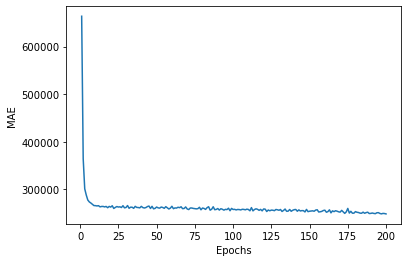

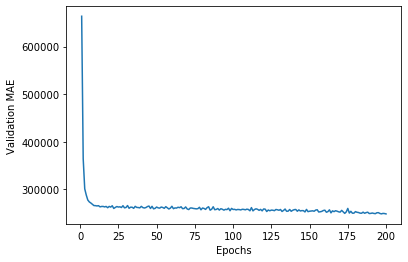

processing fold # 6
(1176, 6)
Train on 1378 samples, validate on 196 samples
Epoch 1/200
1378/1378 [==============================] - 0s 233us/step - loss: 678922228205.4224 - mae: 667858.9375 - val_loss: 456671026029.7143 - val_mae: 505808.4375
Epoch 2/200
1378/1378 [==============================] - 0s 171us/step - loss: 303512946756.3658 - mae: 375949.9688 - val_loss: 218132159341.7143 - val_mae: 321701.4688
Epoch 3/200
1378/1378 [==============================] - 0s 163us/step - loss: 213491143387.2162 - mae: 306250.2812 - val_loss: 196883956715.1021 - val_mae: 314684.7500
Epoch 4/200
1378/1378 [==============================] - 0s 160us/step - loss: 194626606280.6386 - mae: 292893.2500 - val_loss: 160802391186.2857 - val_mae: 277054.2500
Epoch 5/200
1378/1378 [==============================] - 0s 161us/step - loss: 181187502864.7199 - mae: 280324.7500 - val_loss: 148592314326.2041 - val_mae: 267680.3438
Epoch 6/200
1378/1378 [==============================] - 0s 161us/step - loss:

1378/1378 [==============================] - 0s 164us/step - loss: 174054867681.1611 - mae: 261834.1719 - val_loss: 136021631644.7347 - val_mae: 251612.1562
Epoch 49/200
1378/1378 [==============================] - 0s 164us/step - loss: 174965399498.4964 - mae: 262585.4688 - val_loss: 137877910590.6939 - val_mae: 252091.2656
Epoch 50/200
1378/1378 [==============================] - 0s 165us/step - loss: 176810478587.1698 - mae: 263383.9375 - val_loss: 144891456950.8571 - val_mae: 263112.7812
Epoch 51/200
1378/1378 [==============================] - 0s 162us/step - loss: 172524523836.5631 - mae: 262728.9375 - val_loss: 145677526831.0204 - val_mae: 259718.6250
Epoch 52/200
1378/1378 [==============================] - 0s 163us/step - loss: 175811358583.2685 - mae: 264284.7812 - val_loss: 143896058399.3469 - val_mae: 254084.8438
Epoch 53/200
1378/1378 [==============================] - 0s 168us/step - loss: 173893484199.1989 - mae: 261719.7031 - val_loss: 147185778688.0000 - val_mae: 25760

1378/1378 [==============================] - 0s 164us/step - loss: 176016178462.8389 - mae: 260343.9375 - val_loss: 282161561098.4490 - val_mae: 266023.5625
Epoch 97/200
1378/1378 [==============================] - 0s 166us/step - loss: 178255677035.7504 - mae: 259557.1562 - val_loss: 296013697943.5102 - val_mae: 272558.2500
Epoch 98/200
1378/1378 [==============================] - 0s 166us/step - loss: 179453478837.6894 - mae: 259628.0938 - val_loss: 299608566554.1224 - val_mae: 271958.0938
Epoch 99/200
1378/1378 [==============================] - 0s 162us/step - loss: 173070918268.0987 - mae: 259229.1719 - val_loss: 311730779365.8776 - val_mae: 276119.5312
Epoch 100/200
1378/1378 [==============================] - 0s 167us/step - loss: 177983766742.0145 - mae: 262544.0312 - val_loss: 301844895952.9796 - val_mae: 266008.5625
Epoch 101/200
1378/1378 [==============================] - 0s 169us/step - loss: 173624508701.3527 - mae: 257997.8594 - val_loss: 352386118551.5102 - val_mae: 291

1378/1378 [==============================] - 0s 161us/step - loss: 178276116150.0610 - mae: 258310.8438 - val_loss: 829550324171.7551 - val_mae: 307919.0625
Epoch 145/200
1378/1378 [==============================] - 0s 166us/step - loss: 179674021382.6880 - mae: 257727.7969 - val_loss: 833351336270.3673 - val_mae: 302475.4062
Epoch 146/200
1378/1378 [==============================] - 0s 169us/step - loss: 172547817312.9753 - mae: 253657.5938 - val_loss: 856529511235.9183 - val_mae: 307662.7812
Epoch 147/200
1378/1378 [==============================] - 0s 165us/step - loss: 169867194944.6502 - mae: 255780.4844 - val_loss: 811440793558.2041 - val_mae: 296193.0312
Epoch 148/200
1378/1378 [==============================] - 0s 164us/step - loss: 172477975143.2917 - mae: 256902.3594 - val_loss: 832303773069.0613 - val_mae: 296911.2188
Epoch 149/200
1378/1378 [==============================] - 0s 166us/step - loss: 168084719208.7780 - mae: 253418.3125 - val_loss: 878908998969.4694 - val_mae: 

KeyboardInterrupt: 

In [20]:
k=8
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    

processing fold # 0
(0, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/100
1181/1181 [==============================] - 0s 159us/step - loss: 723362432682.3777 - mae: 704403.5000 - val_loss: 784491649633.7100 - val_mae: 726177.4375
Epoch 2/100
1181/1181 [==============================] - 0s 81us/step - loss: 706812105283.1973 - mae: 693604.6250 - val_loss: 750913842793.5266 - val_mae: 705716.7500
Epoch 3/100
1181/1181 [==============================] - 0s 81us/step - loss: 655799318772.5115 - mae: 659078.6250 - val_loss: 671078800595.0535 - val_mae: 654259.9375
Epoch 4/100
1181/1181 [==============================] - 0s 81us/step - loss: 555198829289.6731 - mae: 585885.3750 - val_loss: 534011699971.2570 - val_mae: 555414.2500
Epoch 5/100
1181/1181 [==============================] - 0s 80us/step - loss: 421405562951.0991 - mae: 472491.7812 - val_loss: 376477960353.5471 - val_mae: 430129.1875
Epoch 6/100
1181/1181 [==============================] - 0s 80us/step - loss: 2964635

1181/1181 [==============================] - 0s 77us/step - loss: 152678979766.0830 - mae: 267706.0000 - val_loss: 147745204552.3053 - val_mae: 261859.2969
Epoch 50/100
1181/1181 [==============================] - 0s 78us/step - loss: 151658337154.2760 - mae: 265955.1875 - val_loss: 147505862661.2112 - val_mae: 262622.7500
Epoch 51/100
1181/1181 [==============================] - 0s 78us/step - loss: 151109881151.9458 - mae: 266340.7812 - val_loss: 148232068390.4326 - val_mae: 261629.3281
Epoch 52/100
1181/1181 [==============================] - 0s 81us/step - loss: 150987050324.7553 - mae: 265354.4375 - val_loss: 148759320185.1603 - val_mae: 263021.5312
Epoch 53/100
1181/1181 [==============================] - 0s 81us/step - loss: 151706258953.1042 - mae: 265687.1250 - val_loss: 148423482829.1908 - val_mae: 262171.0625
Epoch 54/100
1181/1181 [==============================] - 0s 81us/step - loss: 152066183941.4191 - mae: 266216.4688 - val_loss: 147201902003.1349 - val_mae: 262367.1250

1181/1181 [==============================] - 0s 80us/step - loss: 151172069523.4005 - mae: 267426.1250 - val_loss: 149027145285.0483 - val_mae: 260404.8594
Epoch 98/100
1181/1181 [==============================] - 0s 76us/step - loss: 150885034051.6308 - mae: 262875.8750 - val_loss: 146534593773.1094 - val_mae: 262901.8750
Epoch 99/100
1181/1181 [==============================] - 0s 77us/step - loss: 150966001979.6105 - mae: 264203.3438 - val_loss: 146601748912.5293 - val_mae: 262090.0781
Epoch 100/100
393/393 [==============================] - 0s 36us/step


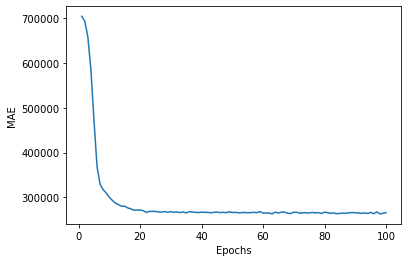

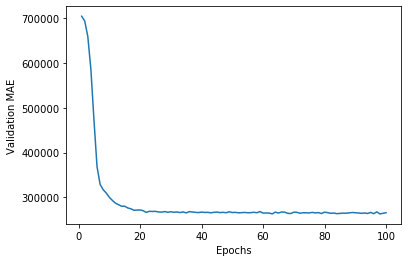

processing fold # 1
(393, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/100
1181/1181 [==============================] - 0s 158us/step - loss: 733232930254.1439 - mae: 706713.0625 - val_loss: 754570739503.5521 - val_mae: 719020.0000
Epoch 2/100
1181/1181 [==============================] - 0s 81us/step - loss: 716152319975.7223 - mae: 695681.2500 - val_loss: 720319662158.1680 - val_mae: 697549.6250
Epoch 3/100
1181/1181 [==============================] - 0s 76us/step - loss: 660722880494.6588 - mae: 659224.3125 - val_loss: 637902670402.4427 - val_mae: 644246.6875
Epoch 4/100
1181/1181 [==============================] - 0s 79us/step - loss: 556849542510.7671 - mae: 582171.2500 - val_loss: 505588808644.0712 - val_mae: 545668.0000
Epoch 5/100
1181/1181 [==============================] - 0s 77us/step - loss: 411972698944.3793 - mae: 462671.8750 - val_loss: 361458614188.6208 - val_mae: 417111.3750
Epoch 6/100
1181/1181 [==============================] - 0s 77us/step - loss: 28293

1181/1181 [==============================] - 0s 83us/step - loss: 131670404915.3734 - mae: 252897.9844 - val_loss: 493679357274.5446 - val_mae: 288782.1562
Epoch 50/100
1181/1181 [==============================] - 0s 81us/step - loss: 131578927653.7172 - mae: 251507.0000 - val_loss: 533429498512.6107 - val_mae: 298231.8438
Epoch 51/100
1181/1181 [==============================] - 0s 81us/step - loss: 132011060918.5165 - mae: 254874.9062 - val_loss: 517062037034.9924 - val_mae: 293012.5938
Epoch 52/100
1181/1181 [==============================] - 0s 81us/step - loss: 131422765402.8247 - mae: 254106.9062 - val_loss: 502627255376.7736 - val_mae: 289821.2500
Epoch 53/100
1181/1181 [==============================] - 0s 77us/step - loss: 131627287943.0449 - mae: 253411.9531 - val_loss: 515764532106.7481 - val_mae: 290540.4375
Epoch 54/100
1181/1181 [==============================] - 0s 77us/step - loss: 131674954659.2244 - mae: 253082.7969 - val_loss: 526783334394.7888 - val_mae: 292637.2812

1181/1181 [==============================] - 0s 81us/step - loss: 131190729215.5665 - mae: 253669.6562 - val_loss: 527757476590.4122 - val_mae: 289306.1250
Epoch 98/100
1181/1181 [==============================] - 0s 86us/step - loss: 130986536144.9619 - mae: 252053.5156 - val_loss: 541739091504.2036 - val_mae: 291486.1562
Epoch 99/100
1181/1181 [==============================] - 0s 80us/step - loss: 131088130152.0474 - mae: 250772.9688 - val_loss: 561524122850.6870 - val_mae: 296891.3125
Epoch 100/100
393/393 [==============================] - 0s 33us/step


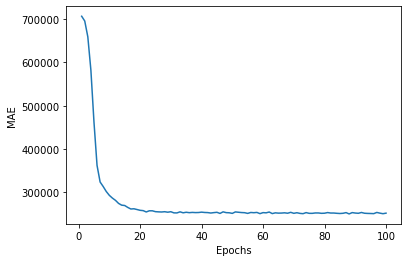

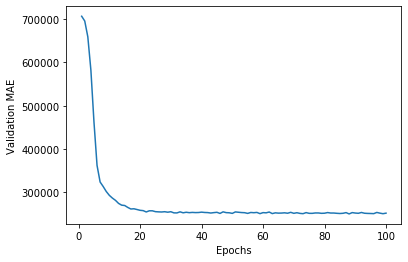

processing fold # 2
(786, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/100
1181/1181 [==============================] - 0s 158us/step - loss: 733796587133.2904 - mae: 706855.8125 - val_loss: 753688761101.6794 - val_mae: 719154.7500
Epoch 2/100
1181/1181 [==============================] - 0s 80us/step - loss: 716254482442.4048 - mae: 696155.3125 - val_loss: 720449104429.5980 - val_mae: 697747.0000
Epoch 3/100
1181/1181 [==============================] - 0s 75us/step - loss: 661660605014.2726 - mae: 661512.3750 - val_loss: 641691448056.8346 - val_mae: 643553.0625
Epoch 4/100
1181/1181 [==============================] - 0s 79us/step - loss: 556707002487.6545 - mae: 589365.1250 - val_loss: 511247680488.5496 - val_mae: 541286.6875
Epoch 5/100
1181/1181 [==============================] - 0s 79us/step - loss: 414983300910.1710 - mae: 473548.2500 - val_loss: 369152109455.9594 - val_mae: 423317.3438
Epoch 6/100
1181/1181 [==============================] - 0s 78us/step - loss: 29335

1181/1181 [==============================] - 0s 79us/step - loss: 150853127370.0254 - mae: 260359.1562 - val_loss: 166821506873.9745 - val_mae: 286754.0312
Epoch 50/100
1181/1181 [==============================] - 0s 79us/step - loss: 149206043503.2007 - mae: 258665.9688 - val_loss: 165463760541.6387 - val_mae: 284980.3438
Epoch 51/100
1181/1181 [==============================] - 0s 76us/step - loss: 149409201156.3353 - mae: 259824.4219 - val_loss: 166569983374.6565 - val_mae: 285466.6562
Epoch 52/100
1181/1181 [==============================] - 0s 81us/step - loss: 148824291697.3683 - mae: 258916.1719 - val_loss: 165774950441.6896 - val_mae: 283203.6875
Epoch 53/100
1181/1181 [==============================] - 0s 77us/step - loss: 148198050504.7248 - mae: 259545.3906 - val_loss: 166707354730.8295 - val_mae: 281203.1875
Epoch 54/100
1181/1181 [==============================] - 0s 79us/step - loss: 148674965715.5631 - mae: 259206.8750 - val_loss: 166209510715.2773 - val_mae: 283784.0312

1181/1181 [==============================] - 0s 81us/step - loss: 147600903300.6605 - mae: 257091.4375 - val_loss: 165210848341.9847 - val_mae: 286197.0000
Epoch 98/100
1181/1181 [==============================] - 0s 81us/step - loss: 147349385705.0229 - mae: 259626.5938 - val_loss: 164791194444.2137 - val_mae: 280366.8125
Epoch 99/100
1181/1181 [==============================] - 0s 78us/step - loss: 146900983620.7146 - mae: 256423.3125 - val_loss: 165501961004.9466 - val_mae: 288063.5000
Epoch 100/100
393/393 [==============================] - 0s 33us/step


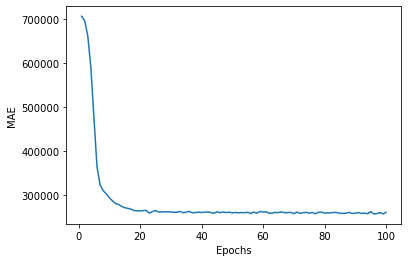

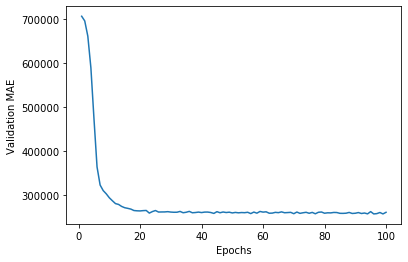

processing fold # 3
(1179, 6)
Train on 1181 samples, validate on 393 samples
Epoch 1/100
1181/1181 [==============================] - 0s 155us/step - loss: 767850597453.1685 - mae: 723819.0625 - val_loss: 651193687542.8804 - val_mae: 667897.0000
Epoch 2/100
1181/1181 [==============================] - 0s 78us/step - loss: 750185822355.4005 - mae: 712767.6875 - val_loss: 621415122855.4097 - val_mae: 647552.8750
Epoch 3/100
1181/1181 [==============================] - 0s 76us/step - loss: 695630469302.0830 - mae: 677701.2500 - val_loss: 548608045900.2137 - val_mae: 594893.5625
Epoch 4/100
1181/1181 [==============================] - 0s 80us/step - loss: 588932745207.3293 - mae: 602390.4375 - val_loss: 431666599044.8855 - val_mae: 497868.3438
Epoch 5/100
1181/1181 [==============================] - 0s 81us/step - loss: 440917290276.1998 - mae: 485608.7500 - val_loss: 294069539139.0942 - val_mae: 372071.2500
Epoch 6/100
1181/1181 [==============================] - 0s 77us/step - loss: 3143

1181/1181 [==============================] - 0s 82us/step - loss: 157922115459.1431 - mae: 273337.5000 - val_loss: 128748439234.1171 - val_mae: 251498.7656
Epoch 50/100
1181/1181 [==============================] - 0s 83us/step - loss: 157132745812.1050 - mae: 273191.7812 - val_loss: 129310075833.6488 - val_mae: 246960.5312
Epoch 51/100
1181/1181 [==============================] - 0s 85us/step - loss: 158115674800.4471 - mae: 271114.3438 - val_loss: 129798928326.6768 - val_mae: 250397.7969
Epoch 52/100
1181/1181 [==============================] - 0s 81us/step - loss: 158141618101.4327 - mae: 272131.7812 - val_loss: 131056275633.1807 - val_mae: 252848.3281
Epoch 53/100
1181/1181 [==============================] - 0s 76us/step - loss: 157065788385.6528 - mae: 272570.4062 - val_loss: 132336669141.0076 - val_mae: 254901.0938
Epoch 54/100
1181/1181 [==============================] - 0s 76us/step - loss: 157858842129.7748 - mae: 273788.4688 - val_loss: 132204827489.0585 - val_mae: 249912.3594

1181/1181 [==============================] - 0s 77us/step - loss: 154329757749.7578 - mae: 271832.5625 - val_loss: 238193319498.2596 - val_mae: 265149.8750
Epoch 98/100
1181/1181 [==============================] - 0s 79us/step - loss: 154501196828.6130 - mae: 271547.6562 - val_loss: 237493896710.5140 - val_mae: 261301.1719
Epoch 99/100
1181/1181 [==============================] - 0s 76us/step - loss: 154572433385.4564 - mae: 270895.1250 - val_loss: 243655191731.7863 - val_mae: 263283.5312
Epoch 100/100
393/393 [==============================] - 0s 31us/step


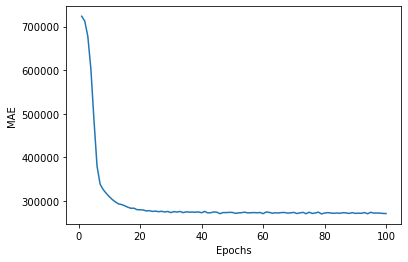

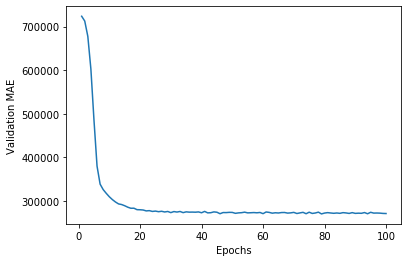

In [24]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    

processing fold # 0
(0, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 203us/step - loss: 721644983671.3956 - mae: 697665.6250 - val_loss: 716764758891.4810 - val_mae: 704008.9375
Epoch 2/100
1443/1443 [==============================] - 0s 139us/step - loss: 539995251902.8912 - mae: 565275.3125 - val_loss: 377079303472.8550 - val_mae: 454775.4062
Epoch 3/100
1443/1443 [==============================] - 0s 137us/step - loss: 276882735819.3098 - mae: 353132.8125 - val_loss: 174345577511.0840 - val_mae: 282403.3438
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 221295236675.7699 - mae: 314555.4062 - val_loss: 150051062885.6183 - val_mae: 263098.4375
Epoch 5/100
1443/1443 [==============================] - 0s 136us/step - loss: 200486877301.7990 - mae: 298596.4062 - val_loss: 135712397609.0382 - val_mae: 251600.1875
Epoch 6/100
1443/1443 [==============================] - 0s 134us/step - loss: 18

Epoch 49/100
1443/1443 [==============================] - 0s 132us/step - loss: 186017950790.2536 - mae: 264809.2812 - val_loss: 111681513550.1679 - val_mae: 231382.2188
Epoch 50/100
1443/1443 [==============================] - 0s 133us/step - loss: 187013481905.9404 - mae: 264658.7812 - val_loss: 111814336386.9313 - val_mae: 229774.5312
Epoch 51/100
1443/1443 [==============================] - 0s 134us/step - loss: 182590225625.8572 - mae: 261280.7812 - val_loss: 110527516077.9237 - val_mae: 236229.8906
Epoch 52/100
1443/1443 [==============================] - 0s 135us/step - loss: 186374296701.6050 - mae: 265154.6562 - val_loss: 111233600629.2519 - val_mae: 233495.8281
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 185151441465.1254 - mae: 263202.1562 - val_loss: 110804697963.4809 - val_mae: 236648.8438
Epoch 54/100
1443/1443 [==============================] - 0s 133us/step - loss: 187287720126.1815 - mae: 265108.3438 - val_loss: 112605343650.1985 - v

1443/1443 [==============================] - 0s 135us/step - loss: 188955409200.0776 - mae: 263478.0938 - val_loss: 110951378412.4580 - val_mae: 230181.8750
Epoch 98/100
1443/1443 [==============================] - 0s 134us/step - loss: 186544887238.8746 - mae: 261479.9219 - val_loss: 110592741907.5420 - val_mae: 230804.7031
Epoch 99/100
1443/1443 [==============================] - 0s 137us/step - loss: 188004956912.2107 - mae: 261444.0625 - val_loss: 110227326053.6183 - val_mae: 235624.2812
Epoch 100/100
131/131 [==============================] - 0s 46us/step


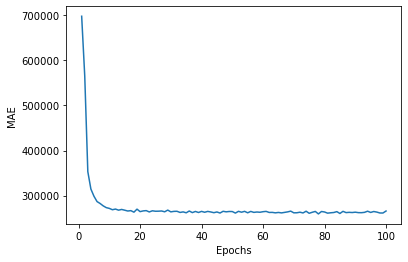

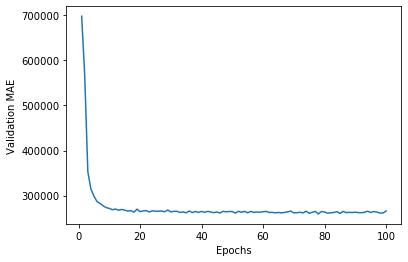

processing fold # 1
(131, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 200us/step - loss: 718012971716.2134 - mae: 699444.3125 - val_loss: 773013163688.0610 - val_mae: 700509.3125
Epoch 2/100
1443/1443 [==============================] - 0s 138us/step - loss: 548243177823.9778 - mae: 576636.5625 - val_loss: 466295344745.5267 - val_mae: 472119.8438
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 275292809404.7623 - mae: 352441.0312 - val_loss: 254797429877.2519 - val_mae: 335273.3438
Epoch 4/100
1443/1443 [==============================] - 0s 136us/step - loss: 215733382099.2931 - mae: 310021.7188 - val_loss: 221339578180.3969 - val_mae: 314476.5000
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 195362076148.2911 - mae: 293734.2188 - val_loss: 196410133840.1222 - val_mae: 302301.4062
Epoch 6/100
1443/1443 [==============================] - 0s 133us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 136us/step - loss: 178534712363.2876 - mae: 259249.5156 - val_loss: 155185135100.0916 - val_mae: 269240.8438
Epoch 50/100
1443/1443 [==============================] - 0s 138us/step - loss: 176680696470.7970 - mae: 261204.8438 - val_loss: 162718637845.4962 - val_mae: 268204.2188
Epoch 51/100
1443/1443 [==============================] - 0s 136us/step - loss: 176040960841.9792 - mae: 257000.5156 - val_loss: 156779357113.6489 - val_mae: 269458.9062
Epoch 52/100
1443/1443 [==============================] - 0s 141us/step - loss: 180838420435.2931 - mae: 259784.5625 - val_loss: 156883216337.0992 - val_mae: 268496.2500
Epoch 53/100
1443/1443 [==============================] - 0s 139us/step - loss: 178918364766.0263 - mae: 260028.5781 - val_loss: 162546770357.7404 - val_mae: 266836.0938
Epoch 54/100
1443/1443 [==============================] - 0s 141us/step - loss: 177652944924.1635 - mae: 255931.0156 - val_loss: 156537531493.6183 - v

1443/1443 [==============================] - 0s 138us/step - loss: 178910376592.4102 - mae: 258089.3750 - val_loss: 161685967895.4504 - val_mae: 268764.4688
Epoch 98/100
1443/1443 [==============================] - 0s 139us/step - loss: 176092519193.3694 - mae: 257822.8438 - val_loss: 162843343066.8702 - val_mae: 267842.0625
Epoch 99/100
1443/1443 [==============================] - 0s 135us/step - loss: 176095281254.1871 - mae: 256700.3906 - val_loss: 155643598941.8015 - val_mae: 269695.9062
Epoch 100/100
131/131 [==============================] - 0s 38us/step


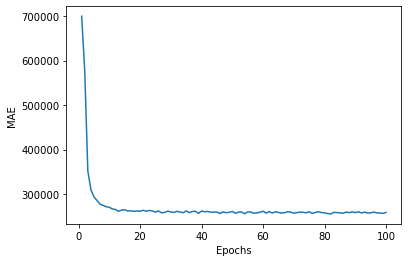

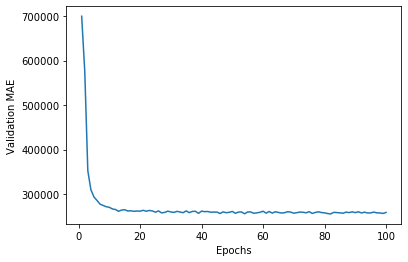

processing fold # 2
(262, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 205us/step - loss: 725862320759.5731 - mae: 702397.3125 - val_loss: 694858958926.1680 - val_mae: 668642.9375
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 551352717996.0859 - mae: 580400.5000 - val_loss: 384592012452.1526 - val_mae: 433721.7812
Epoch 3/100
1443/1443 [==============================] - 0s 136us/step - loss: 274514652062.7803 - mae: 352920.5312 - val_loss: 212219240385.4657 - val_mae: 315884.8125
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 213827178794.0457 - mae: 309264.8125 - val_loss: 196599080350.2901 - val_mae: 300269.7812
Epoch 5/100
1443/1443 [==============================] - 0s 137us/step - loss: 196873834987.0658 - mae: 294855.0000 - val_loss: 185775989799.0840 - val_mae: 290060.6875
Epoch 6/100
1443/1443 [==============================] - 0s 137us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 137us/step - loss: 187553397404.4740 - mae: 262877.0000 - val_loss: 155392446620.3359 - val_mae: 264692.3125
Epoch 50/100
1443/1443 [==============================] - 0s 137us/step - loss: 185439504731.7200 - mae: 259786.1562 - val_loss: 155650904470.4733 - val_mae: 265245.9062
Epoch 51/100
1443/1443 [==============================] - 0s 137us/step - loss: 182373081337.7907 - mae: 259529.0312 - val_loss: 155674118534.8397 - val_mae: 268171.6250
Epoch 52/100
1443/1443 [==============================] - 0s 135us/step - loss: 183655761325.3278 - mae: 260317.5312 - val_loss: 156008607587.6641 - val_mae: 267399.3750
Epoch 53/100
1443/1443 [==============================] - 0s 139us/step - loss: 182826783020.8843 - mae: 260693.8281 - val_loss: 156182458211.6641 - val_mae: 265177.0312
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 180214184808.8482 - mae: 259488.9531 - val_loss: 156562278665.7710 - v

1443/1443 [==============================] - 0s 136us/step - loss: 179063730215.7394 - mae: 259497.7500 - val_loss: 156820600191.0229 - val_mae: 270889.7500
Epoch 98/100
1443/1443 [==============================] - 0s 135us/step - loss: 184962621354.8441 - mae: 262302.3750 - val_loss: 156100269689.1603 - val_mae: 270601.1250
Epoch 99/100
1443/1443 [==============================] - 0s 137us/step - loss: 179890250383.7006 - mae: 260312.7969 - val_loss: 157597517339.3588 - val_mae: 274317.9688
Epoch 100/100
131/131 [==============================] - 0s 38us/step


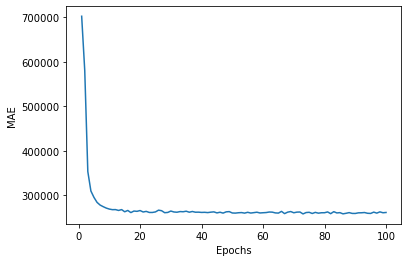

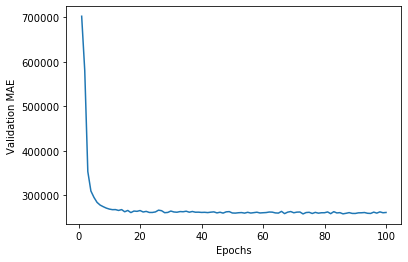

processing fold # 3
(393, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 206us/step - loss: 731730932821.8656 - mae: 702575.0000 - val_loss: 619182156416.9771 - val_mae: 656978.4375
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 547433549520.2772 - mae: 571869.3750 - val_loss: 392566164284.5801 - val_mae: 435174.9375
Epoch 3/100
1443/1443 [==============================] - 0s 138us/step - loss: 252174555089.1642 - mae: 342694.0000 - val_loss: 484434019992.4275 - val_mae: 365648.6250
Epoch 4/100
1443/1443 [==============================] - 0s 140us/step - loss: 194601734521.5246 - mae: 303796.5312 - val_loss: 497232638358.4733 - val_mae: 350427.2188
Epoch 5/100
1443/1443 [==============================] - 0s 144us/step - loss: 174667811370.9328 - mae: 288020.6875 - val_loss: 501259613567.0229 - val_mae: 336352.6562
Epoch 6/100
1443/1443 [==============================] - 0s 139us/step - loss: 

1443/1443 [==============================] - 0s 141us/step - loss: 133413216114.0735 - mae: 253654.2500 - val_loss: 1302789360663.4504 - val_mae: 350841.4688
Epoch 49/100
1443/1443 [==============================] - 0s 139us/step - loss: 132956559571.4706 - mae: 253535.1094 - val_loss: 1238680685372.5801 - val_mae: 343899.6562
Epoch 50/100
1443/1443 [==============================] - 0s 137us/step - loss: 133101435775.5565 - mae: 253788.9219 - val_loss: 1222573702917.8625 - val_mae: 342186.0000
Epoch 51/100
1443/1443 [==============================] - 0s 136us/step - loss: 133572974965.2668 - mae: 255127.4844 - val_loss: 1184287268957.8015 - val_mae: 338585.1562
Epoch 52/100
1443/1443 [==============================] - 0s 135us/step - loss: 133464088956.3631 - mae: 253780.2500 - val_loss: 1160588814945.7100 - val_mae: 336709.7500
Epoch 53/100
1443/1443 [==============================] - 0s 138us/step - loss: 133194228966.6306 - mae: 251933.8438 - val_loss: 1430042681265.8320 - val_mae:

Epoch 96/100
1443/1443 [==============================] - 0s 138us/step - loss: 132376843838.0929 - mae: 252183.1250 - val_loss: 1240434257294.6565 - val_mae: 340109.9375
Epoch 97/100
1443/1443 [==============================] - 0s 136us/step - loss: 132082561373.1393 - mae: 253170.3906 - val_loss: 1325368240800.2444 - val_mae: 346407.5625
Epoch 98/100
1443/1443 [==============================] - 0s 137us/step - loss: 131856268879.1241 - mae: 253282.0781 - val_loss: 1251861031584.2444 - val_mae: 339127.2188
Epoch 99/100
1443/1443 [==============================] - 0s 137us/step - loss: 131958052769.6188 - mae: 252404.2188 - val_loss: 1269501662841.1604 - val_mae: 340125.7188
Epoch 100/100
131/131 [==============================] - 0s 46us/step


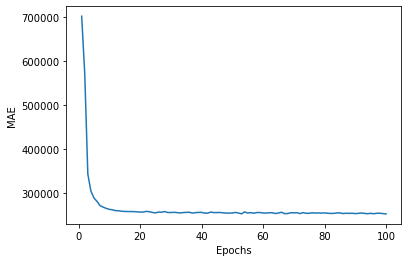

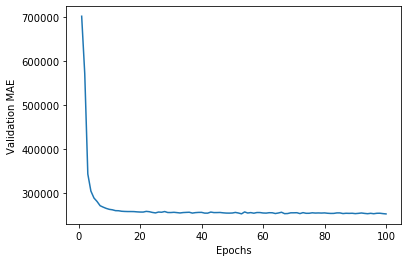

processing fold # 4
(524, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 202us/step - loss: 716024199876.2134 - mae: 696863.0000 - val_loss: 760059605210.8702 - val_mae: 708929.3125
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 553193624009.0034 - mae: 572666.3750 - val_loss: 443540541885.5573 - val_mae: 489830.9062
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 283989859842.4837 - mae: 356550.9375 - val_loss: 221855540732.0916 - val_mae: 329026.3438
Epoch 4/100
1443/1443 [==============================] - 0s 134us/step - loss: 217415526216.2051 - mae: 311694.0625 - val_loss: 189864484801.4657 - val_mae: 308701.2188
Epoch 5/100
1443/1443 [==============================] - 0s 136us/step - loss: 198426222655.8670 - mae: 296298.2188 - val_loss: 171907142976.4886 - val_mae: 293663.5938
Epoch 6/100
1443/1443 [==============================] - 0s 135us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 145us/step - loss: 183955127088.0776 - mae: 264110.7812 - val_loss: 115874200192.9771 - val_mae: 240357.7344
Epoch 50/100
1443/1443 [==============================] - 0s 142us/step - loss: 184774452681.7131 - mae: 262385.6875 - val_loss: 115385734996.0305 - val_mae: 240686.0156
Epoch 51/100
1443/1443 [==============================] - 0s 138us/step - loss: 183612448320.9314 - mae: 262611.7188 - val_loss: 117691754542.9008 - val_mae: 242056.6562
Epoch 52/100
1443/1443 [==============================] - 0s 138us/step - loss: 182160773074.5835 - mae: 261627.0625 - val_loss: 115262120811.4809 - val_mae: 240903.0000
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 189009721586.6944 - mae: 263949.4688 - val_loss: 115805625429.9847 - val_mae: 240255.8750
Epoch 54/100
1443/1443 [==============================] - 0s 139us/step - loss: 185869821056.4435 - mae: 263772.9062 - val_loss: 116593254306.1985 - v

1443/1443 [==============================] - 0s 139us/step - loss: 183465524606.4920 - mae: 263341.0312 - val_loss: 116982178198.4733 - val_mae: 240979.5000
Epoch 98/100
1443/1443 [==============================] - 0s 139us/step - loss: 177887140412.6071 - mae: 259403.7969 - val_loss: 113576988484.3969 - val_mae: 241114.1562
Epoch 99/100
1443/1443 [==============================] - 0s 134us/step - loss: 181196736521.9349 - mae: 262071.8438 - val_loss: 117447753915.6031 - val_mae: 240551.9688
Epoch 100/100
131/131 [==============================] - 0s 38us/step


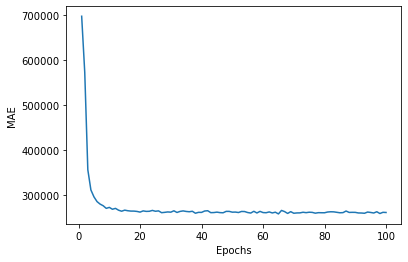

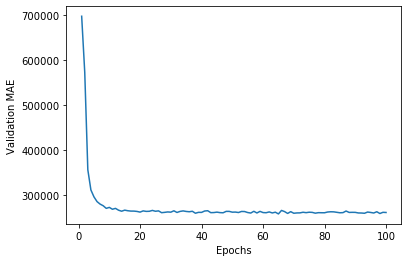

processing fold # 5
(655, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 202us/step - loss: 721206970386.4504 - mae: 700126.9375 - val_loss: 711664081255.5725 - val_mae: 681442.9375
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 554468165363.7588 - mae: 574963.3125 - val_loss: 391947466923.9695 - val_mae: 446498.4688
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 283131212704.1996 - mae: 358973.4688 - val_loss: 182008496253.0687 - val_mae: 274692.6562
Epoch 4/100
1443/1443 [==============================] - 0s 135us/step - loss: 217476605069.2169 - mae: 311802.3750 - val_loss: 159990619221.9847 - val_mae: 266280.7812
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 200494032832.1330 - mae: 297799.7500 - val_loss: 154880476918.2290 - val_mae: 264938.5625
Epoch 6/100
1443/1443 [==============================] - 0s 134us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 133us/step - loss: 185134447281.7630 - mae: 258893.9219 - val_loss: 168098388014.9008 - val_mae: 291914.0000
Epoch 50/100
1443/1443 [==============================] - 0s 137us/step - loss: 185511322525.3611 - mae: 259013.2500 - val_loss: 167395143898.8702 - val_mae: 288001.1250
Epoch 51/100
1443/1443 [==============================] - 0s 138us/step - loss: 178857089712.3437 - mae: 256016.2500 - val_loss: 167919949120.4886 - val_mae: 290807.5312
Epoch 52/100
1443/1443 [==============================] - 0s 133us/step - loss: 188343310492.4740 - mae: 260934.2812 - val_loss: 166940377838.4122 - val_mae: 287455.2812
Epoch 53/100
1443/1443 [==============================] - 0s 136us/step - loss: 185147944287.2682 - mae: 257228.4844 - val_loss: 168200234648.4275 - val_mae: 291744.1562
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 182461639629.6161 - mae: 258126.3750 - val_loss: 168576413352.0611 - v

1443/1443 [==============================] - 0s 137us/step - loss: 186401648909.6604 - mae: 257595.1875 - val_loss: 167121371073.4656 - val_mae: 285247.0000
Epoch 98/100
1443/1443 [==============================] - 0s 137us/step - loss: 188694117803.1989 - mae: 259985.0469 - val_loss: 167208265305.8931 - val_mae: 285140.8750
Epoch 99/100
1443/1443 [==============================] - 0s 135us/step - loss: 191932742096.0998 - mae: 257235.5625 - val_loss: 169101323568.8549 - val_mae: 293824.9375
Epoch 100/100
131/131 [==============================] - 0s 46us/step


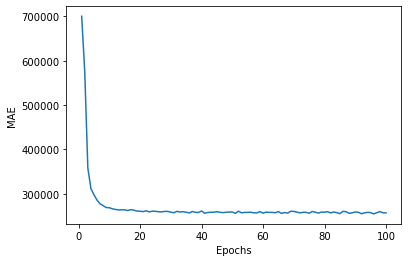

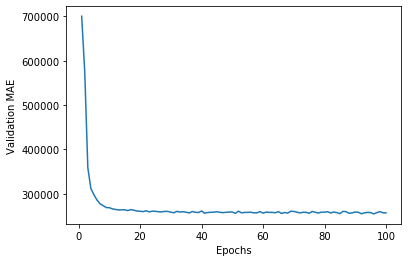

processing fold # 6
(786, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 201us/step - loss: 715800772449.0422 - mae: 698164.9375 - val_loss: 781951772937.7710 - val_mae: 703696.7500
Epoch 2/100
1443/1443 [==============================] - 0s 135us/step - loss: 551310838522.1455 - mae: 575266.6250 - val_loss: 473724561173.4962 - val_mae: 473282.8438
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 268754637200.2328 - mae: 353687.0000 - val_loss: 274881696275.5420 - val_mae: 352635.5000
Epoch 4/100
1443/1443 [==============================] - 0s 138us/step - loss: 203562178740.2467 - mae: 303663.6562 - val_loss: 249821707162.3817 - val_mae: 334957.3438
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 187176461996.7956 - mae: 289443.9375 - val_loss: 236164819209.7710 - val_mae: 323012.9688
Epoch 6/100
1443/1443 [==============================] - 0s 135us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 141us/step - loss: 173432661104.8316 - mae: 256658.6719 - val_loss: 196149638464.4886 - val_mae: 290482.7812
Epoch 50/100
1443/1443 [==============================] - 0s 153us/step - loss: 179350783212.3077 - mae: 259323.9219 - val_loss: 195077157583.1451 - val_mae: 290867.0938
Epoch 51/100
1443/1443 [==============================] - 0s 171us/step - loss: 179209137525.9764 - mae: 258683.7188 - val_loss: 195378995637.7404 - val_mae: 294837.4688
Epoch 52/100
1443/1443 [==============================] - 0s 141us/step - loss: 174123035976.2051 - mae: 256394.4219 - val_loss: 194497472652.7023 - val_mae: 300055.2500
Epoch 53/100
1443/1443 [==============================] - 0s 137us/step - loss: 177944056389.8988 - mae: 258820.9688 - val_loss: 195035867151.6336 - val_mae: 289024.4688
Epoch 54/100
1443/1443 [==============================] - 0s 138us/step - loss: 176252157827.1046 - mae: 257317.2812 - val_loss: 195658625743.1451 - v

1443/1443 [==============================] - 0s 147us/step - loss: 174689764135.0298 - mae: 256332.0469 - val_loss: 194805924090.1374 - val_mae: 293817.8750
Epoch 98/100
1443/1443 [==============================] - 0s 145us/step - loss: 181277698304.8870 - mae: 258402.0000 - val_loss: 194863921449.0382 - val_mae: 293078.5625
Epoch 99/100
1443/1443 [==============================] - 0s 146us/step - loss: 174693922286.6140 - mae: 254899.7969 - val_loss: 194703352495.8778 - val_mae: 296200.0312
Epoch 100/100
131/131 [==============================] - 0s 38us/step


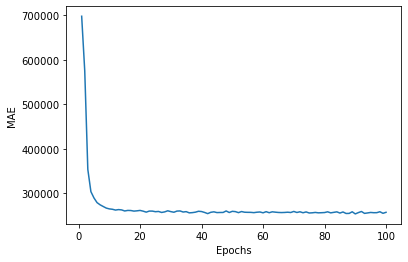

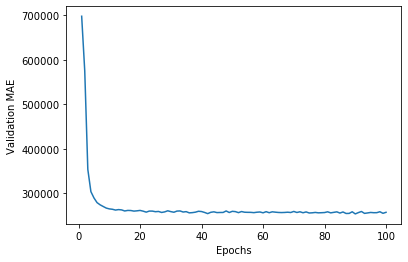

processing fold # 7
(917, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 201us/step - loss: 730087634414.6140 - mae: 702527.3750 - val_loss: 638971573443.4198 - val_mae: 665636.6875
Epoch 2/100
1443/1443 [==============================] - 0s 137us/step - loss: 562165566605.2169 - mae: 583647.6875 - val_loss: 363855214201.1603 - val_mae: 437009.6875
Epoch 3/100
1443/1443 [==============================] - 0s 138us/step - loss: 286302438008.9924 - mae: 361293.5625 - val_loss: 215166550985.2824 - val_mae: 330847.7188
Epoch 4/100
1443/1443 [==============================] - 0s 139us/step - loss: 216159653489.1864 - mae: 307109.6875 - val_loss: 195341775254.4733 - val_mae: 318311.5625
Epoch 5/100
1443/1443 [==============================] - 0s 136us/step - loss: 198832324825.1476 - mae: 293576.9375 - val_loss: 177177725131.2366 - val_mae: 301301.3750
Epoch 6/100
1443/1443 [==============================] - 0s 136us/step - loss: 

Epoch 49/100
1443/1443 [==============================] - 0s 136us/step - loss: 188948671606.5087 - mae: 258886.7188 - val_loss: 131574750575.3893 - val_mae: 265817.0312
Epoch 50/100
1443/1443 [==============================] - 0s 146us/step - loss: 195167200503.6618 - mae: 261897.0312 - val_loss: 132319268613.8626 - val_mae: 264500.5938
Epoch 51/100
1443/1443 [==============================] - 0s 142us/step - loss: 190121717887.7339 - mae: 257654.7969 - val_loss: 134723827196.0916 - val_mae: 272025.6250
Epoch 52/100
1443/1443 [==============================] - 0s 137us/step - loss: 201585262909.9155 - mae: 262947.2500 - val_loss: 132168186278.1069 - val_mae: 267173.3438
Epoch 53/100
1443/1443 [==============================] - 0s 140us/step - loss: 195006840729.8129 - mae: 259838.8750 - val_loss: 132700196301.1908 - val_mae: 266222.2812
Epoch 54/100
1443/1443 [==============================] - 0s 135us/step - loss: 190313493694.8912 - mae: 258979.9219 - val_loss: 131819296908.7023 - v

1443/1443 [==============================] - 0s 138us/step - loss: 191197959452.5627 - mae: 260680.4062 - val_loss: 131233148021.2519 - val_mae: 265406.4688
Epoch 98/100
1443/1443 [==============================] - 0s 152us/step - loss: 186063402155.0215 - mae: 258189.7031 - val_loss: 133470995745.2214 - val_mae: 271745.1562
Epoch 99/100
1443/1443 [==============================] - 0s 142us/step - loss: 190192068143.9002 - mae: 262575.5625 - val_loss: 130513023288.6718 - val_mae: 263676.6875
Epoch 100/100
131/131 [==============================] - 0s 46us/step


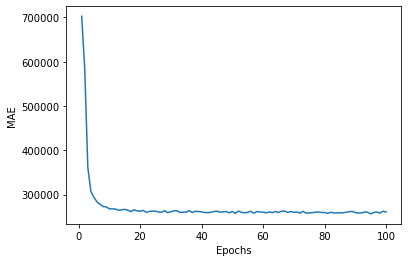

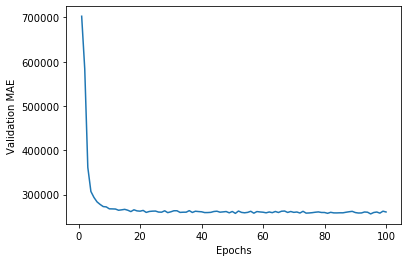

processing fold # 8
(1048, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 203us/step - loss: 725261144475.5869 - mae: 700348.0625 - val_loss: 675766893091.1755 - val_mae: 677308.1250
Epoch 2/100
1443/1443 [==============================] - 0s 143us/step - loss: 552236968766.2703 - mae: 574824.6875 - val_loss: 387782511858.3206 - val_mae: 445084.0000
Epoch 3/100
1443/1443 [==============================] - 0s 145us/step - loss: 278782242092.1746 - mae: 348208.0000 - val_loss: 242261239448.4275 - val_mae: 357165.5938
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 213361858484.7789 - mae: 306084.1562 - val_loss: 217637374655.5114 - val_mae: 340936.0312
Epoch 5/100
1443/1443 [==============================] - 0s 138us/step - loss: 195949559217.5856 - mae: 293768.6250 - val_loss: 194977661365.7404 - val_mae: 320319.7812
Epoch 6/100
1443/1443 [==============================] - 0s 137us/step - loss:

Epoch 49/100
1443/1443 [==============================] - 0s 132us/step - loss: 178554706591.3125 - mae: 258375.5000 - val_loss: 142229671341.9237 - val_mae: 275708.5000
Epoch 50/100
1443/1443 [==============================] - 0s 133us/step - loss: 179987396759.8614 - mae: 259196.9844 - val_loss: 145832876626.0763 - val_mae: 288592.0000
Epoch 51/100
1443/1443 [==============================] - 0s 142us/step - loss: 183939731510.6417 - mae: 263623.1562 - val_loss: 142385685308.5801 - val_mae: 274796.8438
Epoch 52/100
1443/1443 [==============================] - 0s 145us/step - loss: 184342772065.3971 - mae: 259722.2188 - val_loss: 143419135405.9237 - val_mae: 279246.6250
Epoch 53/100
1443/1443 [==============================] - 0s 140us/step - loss: 179983739599.7450 - mae: 259088.1719 - val_loss: 142867397843.0534 - val_mae: 279362.4375
Epoch 54/100
1443/1443 [==============================] - 0s 133us/step - loss: 181730466935.9279 - mae: 260826.8750 - val_loss: 142282211781.3741 - v

1443/1443 [==============================] - 0s 135us/step - loss: 187140702520.9480 - mae: 261168.1250 - val_loss: 139670741539.1756 - val_mae: 267195.9062
Epoch 98/100
1443/1443 [==============================] - 0s 132us/step - loss: 188183916643.3486 - mae: 255471.8594 - val_loss: 139700012774.5954 - val_mae: 275173.7812
Epoch 99/100
1443/1443 [==============================] - 0s 135us/step - loss: 186440846480.0554 - mae: 257788.8281 - val_loss: 139445558248.5496 - val_mae: 271691.2812
Epoch 100/100
131/131 [==============================] - 0s 38us/step


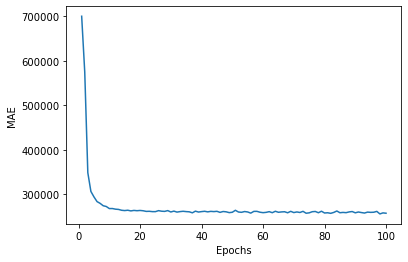

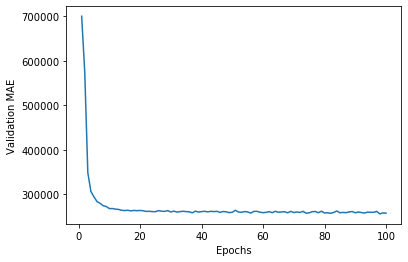

processing fold # 9
(1179, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 204us/step - loss: 731983482133.4664 - mae: 704627.3750 - val_loss: 606598594560.0000 - val_mae: 636569.8750
Epoch 2/100
1443/1443 [==============================] - 0s 135us/step - loss: 558738933051.7866 - mae: 582308.7500 - val_loss: 347843716260.1526 - val_mae: 413991.4688
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 281748133818.4560 - mae: 356293.4375 - val_loss: 202475414191.8778 - val_mae: 298254.7812
Epoch 4/100
1443/1443 [==============================] - 0s 137us/step - loss: 215010565067.3098 - mae: 309324.6562 - val_loss: 181559276489.2824 - val_mae: 286649.1875
Epoch 5/100
1443/1443 [==============================] - 0s 133us/step - loss: 197169074352.3437 - mae: 296155.7500 - val_loss: 166895488805.1298 - val_mae: 277291.1250
Epoch 6/100
1443/1443 [==============================] - 0s 137us/step - loss:

Epoch 49/100
1443/1443 [==============================] - 0s 138us/step - loss: 171664385839.3680 - mae: 258906.6719 - val_loss: 131341011522.4427 - val_mae: 258078.0469
Epoch 50/100
1443/1443 [==============================] - 0s 135us/step - loss: 175369718892.5738 - mae: 261921.5469 - val_loss: 131906491024.6107 - val_mae: 257832.6094
Epoch 51/100
1443/1443 [==============================] - 0s 133us/step - loss: 176471375236.1691 - mae: 261350.0469 - val_loss: 132820434881.4657 - val_mae: 261298.0156
Epoch 52/100
1443/1443 [==============================] - 0s 140us/step - loss: 173683444814.7692 - mae: 260565.9062 - val_loss: 134512526187.4809 - val_mae: 261388.1562
Epoch 53/100
1443/1443 [==============================] - 0s 135us/step - loss: 172345031772.9619 - mae: 260556.9219 - val_loss: 133797181737.0382 - val_mae: 262378.2812
Epoch 54/100
1443/1443 [==============================] - 0s 136us/step - loss: 175278445886.6251 - mae: 260950.3750 - val_loss: 133651300477.0687 - v

1443/1443 [==============================] - 0s 135us/step - loss: 183911355748.9453 - mae: 260850.9844 - val_loss: 226782133584.1222 - val_mae: 280954.7812
Epoch 98/100
1443/1443 [==============================] - 0s 137us/step - loss: 179671747180.2190 - mae: 257925.6094 - val_loss: 228827359810.4427 - val_mae: 281600.8438
Epoch 99/100
1443/1443 [==============================] - 0s 134us/step - loss: 183883292816.7651 - mae: 261061.5625 - val_loss: 231150508454.1068 - val_mae: 280377.0625
Epoch 100/100
131/131 [==============================] - 0s 38us/step


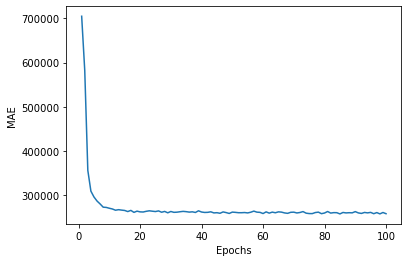

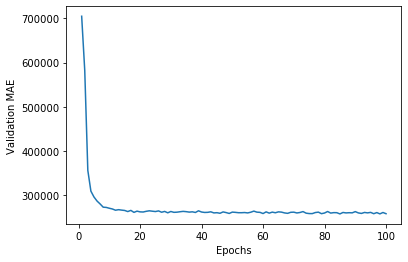

processing fold # 10
(1310, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 198us/step - loss: 729937466516.3132 - mae: 704468.8125 - val_loss: 631184166818.1985 - val_mae: 637612.0625
Epoch 2/100
1443/1443 [==============================] - 0s 133us/step - loss: 558383798693.5219 - mae: 579741.1875 - val_loss: 342605200657.5878 - val_mae: 400336.6562
Epoch 3/100
1443/1443 [==============================] - 0s 135us/step - loss: 280715446618.3007 - mae: 355739.9062 - val_loss: 194053007500.7023 - val_mae: 299538.3125
Epoch 4/100
1443/1443 [==============================] - 0s 135us/step - loss: 217422362861.0173 - mae: 312288.9688 - val_loss: 171334803518.5344 - val_mae: 277337.4062
Epoch 5/100
1443/1443 [==============================] - 0s 140us/step - loss: 199205789889.0201 - mae: 296654.8750 - val_loss: 155479904162.1985 - val_mae: 267512.2500
Epoch 6/100
1443/1443 [==============================] - 0s 135us/step - loss

Epoch 49/100
1443/1443 [==============================] - 0s 139us/step - loss: 185014287066.9217 - mae: 265095.3750 - val_loss: 109537776397.6794 - val_mae: 225794.1406
Epoch 50/100
1443/1443 [==============================] - 0s 136us/step - loss: 181450251305.1587 - mae: 264691.5000 - val_loss: 109850946927.3893 - val_mae: 226095.5000
Epoch 51/100
1443/1443 [==============================] - 0s 135us/step - loss: 185558846786.8829 - mae: 267270.6250 - val_loss: 109381037798.5954 - val_mae: 222634.3281
Epoch 52/100
1443/1443 [==============================] - 0s 136us/step - loss: 184406232321.5967 - mae: 265775.3125 - val_loss: 109442040808.5496 - val_mae: 223368.7500
Epoch 53/100
1443/1443 [==============================] - 0s 139us/step - loss: 180894667464.4712 - mae: 265593.2500 - val_loss: 108983764069.6183 - val_mae: 218279.2812
Epoch 54/100
1443/1443 [==============================] - 0s 136us/step - loss: 182045213560.4601 - mae: 265122.5938 - val_loss: 109073565899.2366 - v

1443/1443 [==============================] - 0s 137us/step - loss: 184604035040.7762 - mae: 264922.9062 - val_loss: 107256751643.3588 - val_mae: 217905.7188
Epoch 98/100
1443/1443 [==============================] - 0s 136us/step - loss: 186086321162.6445 - mae: 265067.2500 - val_loss: 107265638274.9313 - val_mae: 218803.5938
Epoch 99/100
1443/1443 [==============================] - 0s 135us/step - loss: 181584319624.9591 - mae: 262538.8438 - val_loss: 110735010057.7710 - val_mae: 232295.7344
Epoch 100/100
131/131 [==============================] - 0s 38us/step


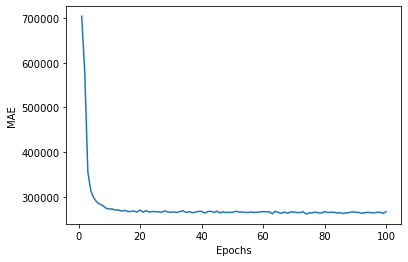

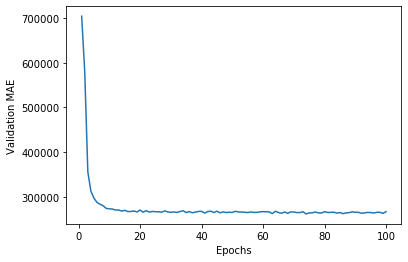

processing fold # 11
(1441, 6)
Train on 1443 samples, validate on 131 samples
Epoch 1/100
1443/1443 [==============================] - 0s 201us/step - loss: 737735816096.1996 - mae: 706602.2500 - val_loss: 569704411980.2137 - val_mae: 627554.2500
Epoch 2/100
1443/1443 [==============================] - 0s 132us/step - loss: 572310197166.3922 - mae: 588812.6250 - val_loss: 321775607620.3970 - val_mae: 412440.4062
Epoch 3/100
1443/1443 [==============================] - 0s 131us/step - loss: 296338064471.2849 - mae: 362576.0312 - val_loss: 167315353068.4580 - val_mae: 290340.3438
Epoch 4/100
1443/1443 [==============================] - 0s 134us/step - loss: 220508675721.3139 - mae: 311436.2812 - val_loss: 147687211508.2748 - val_mae: 277930.1562
Epoch 5/100
1443/1443 [==============================] - 0s 135us/step - loss: 200920538568.2938 - mae: 297108.3125 - val_loss: 133201189848.9160 - val_mae: 266585.0625
Epoch 6/100
1443/1443 [==============================] - 0s 132us/step - loss

Epoch 49/100
1443/1443 [==============================] - 0s 132us/step - loss: 183474365284.5905 - mae: 261057.4688 - val_loss: 101042725927.0840 - val_mae: 231647.8125
Epoch 50/100
1443/1443 [==============================] - 0s 133us/step - loss: 183963242686.1815 - mae: 264817.5312 - val_loss: 100177521781.2519 - val_mae: 226269.7656
Epoch 51/100
1443/1443 [==============================] - 0s 130us/step - loss: 183154348977.2308 - mae: 263024.8438 - val_loss: 101889022061.4351 - val_mae: 221780.9219
Epoch 52/100
1443/1443 [==============================] - 0s 134us/step - loss: 179442215787.6868 - mae: 260905.8438 - val_loss: 101938105398.7176 - val_mae: 237841.2969
Epoch 53/100
1443/1443 [==============================] - 0s 129us/step - loss: 188267413312.3992 - mae: 267111.6250 - val_loss: 100008824988.3359 - val_mae: 226676.6094
Epoch 54/100
1443/1443 [==============================] - 0s 132us/step - loss: 184777168576.6653 - mae: 264934.6562 - val_loss: 100491284136.0611 - v

1443/1443 [==============================] - 0s 132us/step - loss: 182128938568.7374 - mae: 261737.1094 - val_loss: 100846917991.5725 - val_mae: 220389.6875
Epoch 98/100
1443/1443 [==============================] - 0s 132us/step - loss: 182906390818.9494 - mae: 263597.9375 - val_loss: 100576428282.1374 - val_mae: 221110.0625
Epoch 99/100
1443/1443 [==============================] - 0s 131us/step - loss: 179876137750.5309 - mae: 261655.0781 - val_loss: 99787443754.9924 - val_mae: 224981.6250
Epoch 100/100
131/131 [==============================] - 0s 46us/step


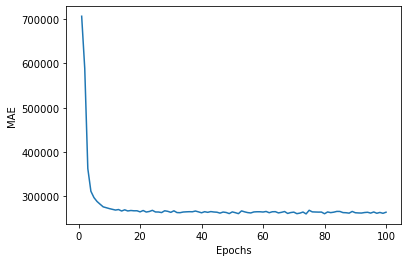

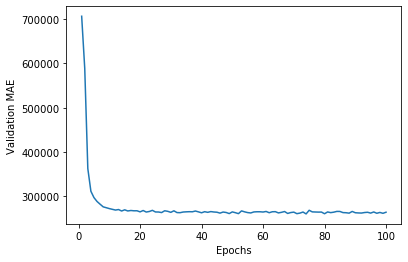

C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ethan\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
k=12
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    print(train_data[:i * num_val_samples].shape)
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
    
    mae_history = history.history['mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()
    
    val_mae_history = history.history['val_mae']
    plt.plot(range(1,len(mae_history)+1),mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()
    mae_histories.append(val_mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    

## Prediction

In [28]:
val_mse, val_mae = model.evaluate(test_data, test_targets, verbose=1)
print(val_mae)

2790/2790 [==============================] - 0s 31us/step
252650.375


In [30]:
val_mse, val_mae = model.evaluate(test_data, test_targets, verbose=1)
print(val_mae)

2790/2790 [==============================] - 0s 32us/step
252650.375
